# GARCH Stock Forecasting

## Read Data

In [1]:
import pandas_datareader.data as web
from datetime import datetime, timedelta
import pandas as pd
import matplotlib.pyplot as plt
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import numpy as np
import warnings
import math
import scipy.optimize as opt
import random
from functools import partial
import scipy
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.stattools import jarque_bera
from random import gauss
warnings.filterwarnings("ignore")

## SPY Volatility

In [2]:
start = datetime(2000, 1, 1)
end = datetime(2022, 11, 10)

In [3]:
spy = web.DataReader('SPY', 'yahoo', start=start, end=end)

In [4]:
returns = 100 * spy.Close.pct_change().dropna()

Text(0.5, 1.0, 'SPY Returns')

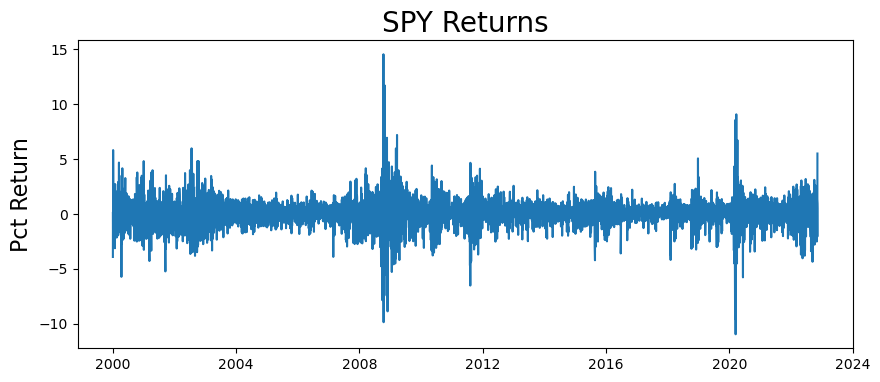

In [5]:
plt.figure(figsize=(10,4))
plt.plot(returns)
plt.ylabel('Pct Return', fontsize=16)
plt.title('SPY Returns', fontsize=20)

## PACF

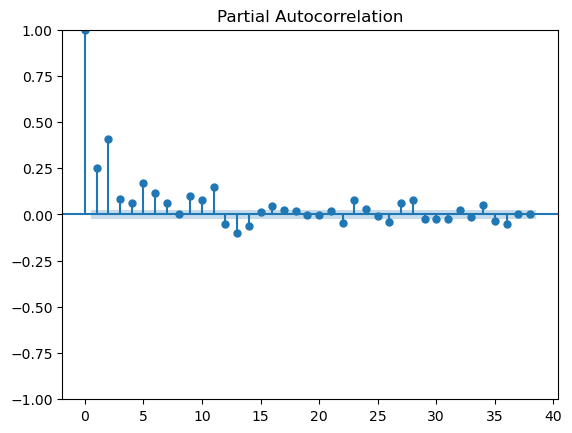

In [6]:
plot_pacf(returns**2)
plt.show()

## Fit GARCH(2,3)

In [7]:
model = arch_model(returns, p=2, q=3)

In [8]:
model_fit = model.fit()

Iteration:      1,   Func. Count:      9,   Neg. LLF: 47303.72040190529
Iteration:      2,   Func. Count:     23,   Neg. LLF: 4860332715.177006
Iteration:      3,   Func. Count:     34,   Neg. LLF: 10692.106164949011
Iteration:      4,   Func. Count:     44,   Neg. LLF: 10629.631587691809
Iteration:      5,   Func. Count:     54,   Neg. LLF: 8118.293617055622
Iteration:      6,   Func. Count:     64,   Neg. LLF: 8003.9047380563825
Iteration:      7,   Func. Count:     73,   Neg. LLF: 7992.35644584808
Iteration:      8,   Func. Count:     81,   Neg. LLF: 7997.805163492112
Iteration:      9,   Func. Count:     91,   Neg. LLF: 8000.394024391433
Iteration:     10,   Func. Count:    100,   Neg. LLF: 7991.3782151787545
Iteration:     11,   Func. Count:    108,   Neg. LLF: 7991.219272881028
Iteration:     12,   Func. Count:    116,   Neg. LLF: 7991.215079254184
Iteration:     13,   Func. Count:    124,   Neg. LLF: 7991.209949409269
Iteration:     14,   Func. Count:    132,   Neg. LLF: 7991.20

In [9]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -7991.21
Distribution:                  Normal   AIC:                           15996.4
Method:            Maximum Likelihood   BIC:                           16043.0
                                        No. Observations:                 5752
Date:                Fri, Dec 16 2022   Df Residuals:                     5751
Time:                        21:09:44   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0653  1.067e-02      6.119  9.439e-10 [4.436e-02,8.617e-02]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0436  9.298e-03      4.688  2.761e-06 [2.536e-02,6.181e-02]
alpha[1]       0.0869  2.114e-02      4.111  3.944e-05   [4.547e-02,  0.128]
alpha[2]       0.1384  2.250e-02      6.149  7.808e-10   [9.426e-02,  0.182]
beta[1]        0.1991      0.209      0.951      0.342     [ -0.211,  0.610]
beta[2]        0.5466      0.233      2.350  1.878e-02   [9.069e-02,  1.002]
beta[3]    2.3111e-33      0.129  1.798e-32      1.000     [ -0.252,  0.252]
============================================================================

Covariance estimator: robust
"""

## Try GARCH(3,0) = ARCH(3)

In [10]:
model = arch_model(returns, p=3, q=0)

In [11]:
model_fit = model.fit()

Iteration:      1,   Func. Count:      7,   Neg. LLF: 38149.67068668545
Iteration:      2,   Func. Count:     17,   Neg. LLF: 13937.169052235524
Iteration:      3,   Func. Count:     26,   Neg. LLF: 61067.40288828219
Iteration:      4,   Func. Count:     33,   Neg. LLF: 3665550.026780959
Iteration:      5,   Func. Count:     40,   Neg. LLF: 23448.85182444625
Iteration:      6,   Func. Count:     47,   Neg. LLF: 14152.602682171831
Iteration:      7,   Func. Count:     54,   Neg. LLF: 26420.85123131448
Iteration:      8,   Func. Count:     61,   Neg. LLF: 8459.692460464368
Iteration:      9,   Func. Count:     68,   Neg. LLF: 8319.867730823036
Iteration:     10,   Func. Count:     74,   Neg. LLF: 8316.78717053636
Iteration:     11,   Func. Count:     80,   Neg. LLF: 8316.787222690147
Iteration:     12,   Func. Count:     87,   Neg. LLF: 8315.370845106894
Iteration:     13,   Func. Count:     93,   Neg. LLF: 8315.342982043716
Iteration:     14,   Func. Count:     99,   Neg. LLF: 8315.3403

In [12]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -8315.34
Distribution:                  Normal   AIC:                           16640.7
Method:            Maximum Likelihood   BIC:                           16674.0
                                        No. Observations:                 5752
Date:                Fri, Dec 16 2022   Df Residuals:                     5751
Time:                        21:09:44   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0686  1.211e-02      5.665  1.471e-08 [4.487e-02,9.233e-02]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          0.4069  2.750e-02     14.799  1.479e-49 [  0.353,  0.461]
alpha[1]       0.1875  2.763e-02      6.784  1.168e-11 [  0.133,  0.242]
alpha[2]       0.3662  3.904e-02      9.379  6.678e-21 [  0.290,  0.443]
alpha[3]       0.2478  2.676e-02      9.259  2.067e-20 [  0.195,  0.300]
========================================================================

Covariance estimator: robust
"""

## Try GARCH(2,1) 

In [13]:
model = arch_model(returns, p=2, q=1)
model_fit = model.fit()
model_fit.params['omega']

Iteration:      1,   Func. Count:      7,   Neg. LLF: 81427.51039501136
Iteration:      2,   Func. Count:     19,   Neg. LLF: 35337.57474866966
Iteration:      3,   Func. Count:     30,   Neg. LLF: 1296532249.5333295
Iteration:      4,   Func. Count:     37,   Neg. LLF: 13203.089770635072
Iteration:      5,   Func. Count:     45,   Neg. LLF: 8244.67392272133
Iteration:      6,   Func. Count:     52,   Neg. LLF: 8010.115653528376
Iteration:      7,   Func. Count:     59,   Neg. LLF: 8032.3746083954
Iteration:      8,   Func. Count:     66,   Neg. LLF: 8027.734794575892
Iteration:      9,   Func. Count:     73,   Neg. LLF: 7994.192259841546
Iteration:     10,   Func. Count:     80,   Neg. LLF: 7994.134450891374
Iteration:     11,   Func. Count:     87,   Neg. LLF: 7994.118756978527
Iteration:     12,   Func. Count:     92,   Neg. LLF: 7994.118756980999
Optimization terminated successfully    (Exit mode 0)
            Current function value: 7994.118756978527
            Iterations: 12
  

0.029341371237373952

In [14]:
rolling_predictions = []
test_size = 365

for i in range(test_size):
    train = returns[:-(test_size-i)]
    model = arch_model(train, p=2, q=1)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

In [15]:
rolling_predictions = pd.Series(rolling_predictions, index=returns.index[-365:])

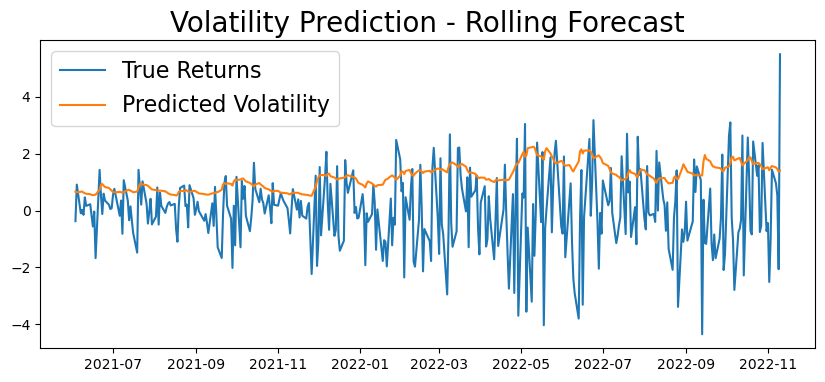

In [16]:
plt.figure(figsize=(10,4))
true, = plt.plot(returns[-365:])
preds, = plt.plot(rolling_predictions)
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Returns', 'Predicted Volatility'], fontsize=16)

In [17]:
train = returns
model = arch_model(train, p=2, q=1)
model_fit = model.fit(disp='off')

In [18]:
pred = model_fit.forecast(horizon=7)
future_dates = [returns.index[-1] + timedelta(days=i) for i in range(1,8)]
pred = pd.Series(np.sqrt(pred.variance.values[-1,:]), index=future_dates)

In [19]:
start = datetime(2022, 11, 10)
end = datetime(2022, 11, 17)
spy_ = web.DataReader('SPY', 'yahoo', start=start, end=end)
returns_ = 100 * spy_.Close.pct_change().dropna()

Text(0.5, 1.0, 'Volatility Prediction - Rolling Forecast')

<Figure size 1000x400 with 0 Axes>

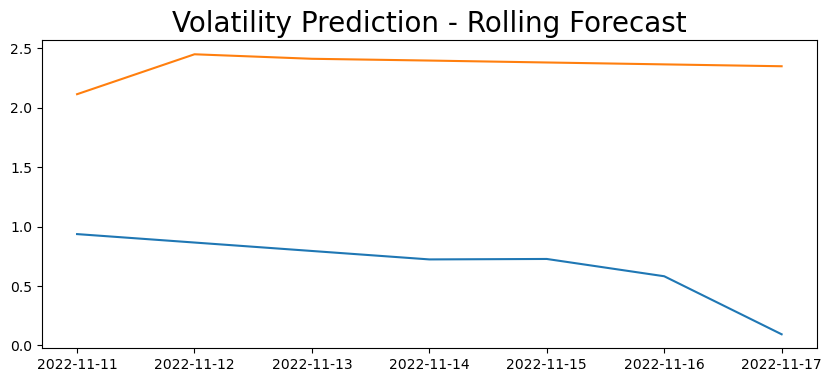

In [20]:
plt.figure(figsize=(10,4))
plt.figure(figsize=(10,4))
true, = plt.plot(returns_**2)
plt.plot(pred)
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)

# Second week
## Simulation

In [21]:
def simulate_GARCH(n, omega, alpha, beta=0):
    
    # Initialize our values
    sigma1 = math.sqrt(omega / (1 - alpha - beta))
    X = np.ndarray(n)
    sigma = np.ndarray(n)
    sigma[0] = sigma1
    theta = np.zeros(3)
    theta[0] = 1/(1-beta)
    for t in range(1, n):
        # Draw the next x_t
        X[t - 1] = sigma[t - 1] * np.random.normal(0, 1)
        # Draw the next sigma_t
        sigma[t] = math.sqrt(omega + beta * sigma[t - 1]**2 + alpha * X[t - 1]**2)
        
    X[n - 1] = sigma[n - 1] * np.random.normal(0, 1)    
    
    return X, sigma

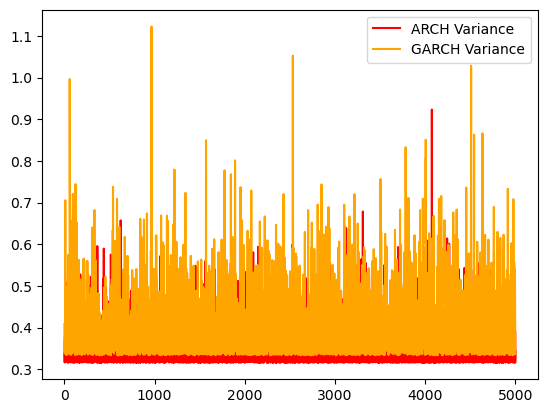

In [22]:
# Simulate a ARCH(1) series
arch_resid, arch_variance = simulate_GARCH(n= 5000, 
                                            omega = 0.1, alpha = 0.2)
# Simulate a GARCH(1,1) series
garch_resid, garch_variance = simulate_GARCH(n= 5000, 
                                             omega = 0.1, alpha = 0.3, beta = 0.1)
# Plot the ARCH variance
plt.plot(arch_variance, color = 'red', label = 'ARCH Variance')
# Plot the GARCH variance
plt.plot(garch_variance, color = 'orange', label = 'GARCH Variance')
plt.legend()
plt.show()

In [23]:
def simulation(n):
    alpha = []
    beta = []
    omega = []
    for i in range(n):
        garch_resid, _ = simulate_GARCH(n= 10000, 
                                                 omega = 0.1, alpha = 0.3, beta = 0.1)
        model = arch_model(garch_resid[1000:], p=1, q=1)
        model_fit = model.fit()
        omega.append(model_fit.params['omega'])
        beta.append(model_fit.params['beta[1]'])
        alpha.append(model_fit.params['alpha[1]'])
    return alpha, beta, omega

In [24]:
alpha, beta, omega = simulation(1000)

Iteration:      1,   Func. Count:      6,   Neg. LLF: 62327.067297490015
Iteration:      2,   Func. Count:     16,   Neg. LLF: 12831139.199136885
Iteration:      3,   Func. Count:     22,   Neg. LLF: 5720.407755217433
Iteration:      4,   Func. Count:     29,   Neg. LLF: 4695.7321513776205
Iteration:      5,   Func. Count:     35,   Neg. LLF: 4369.400329686917
Iteration:      6,   Func. Count:     40,   Neg. LLF: 4378.116435286375
Iteration:      7,   Func. Count:     46,   Neg. LLF: 4669.383184931798
Iteration:      8,   Func. Count:     52,   Neg. LLF: 4365.707643041935
Iteration:      9,   Func. Count:     57,   Neg. LLF: 4365.659896369449
Iteration:     10,   Func. Count:     62,   Neg. LLF: 4365.65579659227
Iteration:     11,   Func. Count:     67,   Neg. LLF: 4365.655715193418
Iteration:     12,   Func. Count:     72,   Neg. LLF: 4365.6557087570045
Iteration:     13,   Func. Count:     76,   Neg. LLF: 4365.655708757017
Optimization terminated successfully    (Exit mode 0)
       

Iteration:      3,   Func. Count:     22,   Neg. LLF: 5305.881293006102
Iteration:      4,   Func. Count:     30,   Neg. LLF: 4603.283660207407
Iteration:      5,   Func. Count:     36,   Neg. LLF: 4565.282329871149
Iteration:      6,   Func. Count:     42,   Neg. LLF: 4560.682795653741
Iteration:      7,   Func. Count:     48,   Neg. LLF: 4556.728294382203
Iteration:      8,   Func. Count:     53,   Neg. LLF: 4556.722348785157
Iteration:      9,   Func. Count:     58,   Neg. LLF: 4556.722070952158
Iteration:     10,   Func. Count:     63,   Neg. LLF: 4556.722061655931
Iteration:     11,   Func. Count:     67,   Neg. LLF: 4556.722061656043
Optimization terminated successfully    (Exit mode 0)
            Current function value: 4556.722061655931
            Iterations: 11
            Function evaluations: 67
            Gradient evaluations: 11
Iteration:      1,   Func. Count:      6,   Neg. LLF: 46800.330486389146
Iteration:      2,   Func. Count:     16,   Neg. LLF: 3955567.36365368

Iteration:      3,   Func. Count:     22,   Neg. LLF: 6479.6970799740075
Iteration:      4,   Func. Count:     29,   Neg. LLF: 4537.102519856297
Iteration:      5,   Func. Count:     34,   Neg. LLF: 5241.325451927919
Iteration:      6,   Func. Count:     41,   Neg. LLF: 4552.1782376767615
Iteration:      7,   Func. Count:     47,   Neg. LLF: 4533.636605577042
Iteration:      8,   Func. Count:     52,   Neg. LLF: 4533.626176449624
Iteration:      9,   Func. Count:     57,   Neg. LLF: 4533.626094043863
Iteration:     10,   Func. Count:     62,   Neg. LLF: 4533.626092123176
Iteration:     11,   Func. Count:     66,   Neg. LLF: 4533.626092123478
Optimization terminated successfully    (Exit mode 0)
            Current function value: 4533.626092123176
            Iterations: 11
            Function evaluations: 66
            Gradient evaluations: 11
Iteration:      1,   Func. Count:      6,   Neg. LLF: 125538.6482497241
Iteration:      2,   Func. Count:     16,   Neg. LLF: 7927695.1625746

Iteration:      1,   Func. Count:      6,   Neg. LLF: 178948.16148499734
Iteration:      2,   Func. Count:     14,   Neg. LLF: 907845.3833113848
Iteration:      3,   Func. Count:     20,   Neg. LLF: 5141.991307658125
Iteration:      4,   Func. Count:     27,   Neg. LLF: 4776.922462202568
Iteration:      5,   Func. Count:     33,   Neg. LLF: 4431.6251310862035
Iteration:      6,   Func. Count:     38,   Neg. LLF: 4431.42989256112
Iteration:      7,   Func. Count:     44,   Neg. LLF: 5833.66190677112
Iteration:      8,   Func. Count:     50,   Neg. LLF: 4426.181095558194
Iteration:      9,   Func. Count:     55,   Neg. LLF: 4426.193988380798
Iteration:     10,   Func. Count:     61,   Neg. LLF: 4426.177903931129
Iteration:     11,   Func. Count:     66,   Neg. LLF: 4426.177899480189
Iteration:     12,   Func. Count:     71,   Neg. LLF: 4426.177898873888
Optimization terminated successfully    (Exit mode 0)
            Current function value: 4426.177898873888
            Iterations: 12
 

Iteration:      7,   Func. Count:     47,   Neg. LLF: 4322.7929497141085
Iteration:      8,   Func. Count:     52,   Neg. LLF: 4322.702312442914
Iteration:      9,   Func. Count:     57,   Neg. LLF: 4322.699900024014
Iteration:     10,   Func. Count:     62,   Neg. LLF: 4322.699865073013
Iteration:     11,   Func. Count:     67,   Neg. LLF: 4322.699863565166
Iteration:     12,   Func. Count:     71,   Neg. LLF: 4322.699863565368
Optimization terminated successfully    (Exit mode 0)
            Current function value: 4322.699863565166
            Iterations: 12
            Function evaluations: 71
            Gradient evaluations: 12
Iteration:      1,   Func. Count:      6,   Neg. LLF: 66397.78494345659
Iteration:      2,   Func. Count:     16,   Neg. LLF: 2394058.3174250834
Iteration:      3,   Func. Count:     22,   Neg. LLF: 5871.715265627812
Iteration:      4,   Func. Count:     29,   Neg. LLF: 4270.240684742275
Iteration:      5,   Func. Count:     35,   Neg. LLF: 4384.4937705658

Iteration:      4,   Func. Count:     29,   Neg. LLF: 4769.294877402795
Iteration:      5,   Func. Count:     35,   Neg. LLF: 4423.663528346648
Iteration:      6,   Func. Count:     40,   Neg. LLF: 4439.146718499338
Iteration:      7,   Func. Count:     46,   Neg. LLF: 5084.7426858414865
Iteration:      8,   Func. Count:     52,   Neg. LLF: 4418.19463022669
Iteration:      9,   Func. Count:     57,   Neg. LLF: 4418.193348929176
Iteration:     10,   Func. Count:     62,   Neg. LLF: 4418.1932725915985
Iteration:     11,   Func. Count:     66,   Neg. LLF: 4418.193272592475
Optimization terminated successfully    (Exit mode 0)
            Current function value: 4418.1932725915985
            Iterations: 11
            Function evaluations: 66
            Gradient evaluations: 11
Iteration:      1,   Func. Count:      6,   Neg. LLF: 53784.74376713239
Iteration:      2,   Func. Count:     16,   Neg. LLF: 2153184.1822370333
Iteration:      3,   Func. Count:     22,   Neg. LLF: 5786.714311172

Iteration:      4,   Func. Count:     29,   Neg. LLF: 4342.109384430721
Iteration:      5,   Func. Count:     34,   Neg. LLF: 6691.866374064267
Iteration:      6,   Func. Count:     41,   Neg. LLF: 4346.326673203409
Iteration:      7,   Func. Count:     47,   Neg. LLF: 4335.609445332828
Iteration:      8,   Func. Count:     52,   Neg. LLF: 4335.567340355935
Iteration:      9,   Func. Count:     57,   Neg. LLF: 4335.56593963208
Iteration:     10,   Func. Count:     62,   Neg. LLF: 4335.5658510346175
Iteration:     11,   Func. Count:     67,   Neg. LLF: 4335.565849165478
Iteration:     12,   Func. Count:     71,   Neg. LLF: 4335.565849165497
Optimization terminated successfully    (Exit mode 0)
            Current function value: 4335.565849165478
            Iterations: 12
            Function evaluations: 71
            Gradient evaluations: 12
Iteration:      1,   Func. Count:      6,   Neg. LLF: 51039.57702220802
Iteration:      2,   Func. Count:     16,   Neg. LLF: 5879879.521111796

Iteration:      4,   Func. Count:     29,   Neg. LLF: 4362.175352319441
Iteration:      5,   Func. Count:     34,   Neg. LLF: 4379.547951619731
Iteration:      6,   Func. Count:     40,   Neg. LLF: 4873.662413030232
Iteration:      7,   Func. Count:     46,   Neg. LLF: 4350.773693337937
Iteration:      8,   Func. Count:     51,   Neg. LLF: 4350.759425799738
Iteration:      9,   Func. Count:     56,   Neg. LLF: 4350.75893986929
Iteration:     10,   Func. Count:     61,   Neg. LLF: 4350.758933468083
Iteration:     11,   Func. Count:     66,   Neg. LLF: 4350.758932791459
Optimization terminated successfully    (Exit mode 0)
            Current function value: 4350.758932791459
            Iterations: 11
            Function evaluations: 66
            Gradient evaluations: 11
Iteration:      1,   Func. Count:      6,   Neg. LLF: 36261.071970895275
Iteration:      2,   Func. Count:     16,   Neg. LLF: 6039499.349638097
Iteration:      3,   Func. Count:     22,   Neg. LLF: 4975.018187723293

Iteration:      1,   Func. Count:      6,   Neg. LLF: 79664.61028607308
Iteration:      2,   Func. Count:     16,   Neg. LLF: 7548395.611553852
Iteration:      3,   Func. Count:     22,   Neg. LLF: 5533.228503531051
Iteration:      4,   Func. Count:     29,   Neg. LLF: 4640.007948946526
Iteration:      5,   Func. Count:     35,   Neg. LLF: 4304.916206661468
Iteration:      6,   Func. Count:     40,   Neg. LLF: 4318.481692401997
Iteration:      7,   Func. Count:     46,   Neg. LLF: 4616.915135947594
Iteration:      8,   Func. Count:     52,   Neg. LLF: 4300.346322297891
Iteration:      9,   Func. Count:     58,   Neg. LLF: 4299.941868446374
Iteration:     10,   Func. Count:     63,   Neg. LLF: 4299.940321112712
Iteration:     11,   Func. Count:     68,   Neg. LLF: 4299.940313073332
Iteration:     12,   Func. Count:     72,   Neg. LLF: 4299.940313072472
Optimization terminated successfully    (Exit mode 0)
            Current function value: 4299.940313073332
            Iterations: 12
 

Iteration:      6,   Func. Count:     40,   Neg. LLF: 4440.389229892045
Iteration:      7,   Func. Count:     46,   Neg. LLF: 5788.121082662373
Iteration:      8,   Func. Count:     52,   Neg. LLF: 4421.734336350262
Iteration:      9,   Func. Count:     57,   Neg. LLF: 4421.731833386214
Iteration:     10,   Func. Count:     62,   Neg. LLF: 4421.73176945099
Iteration:     11,   Func. Count:     67,   Neg. LLF: 4421.731768123266
Iteration:     12,   Func. Count:     71,   Neg. LLF: 4421.731768123348
Optimization terminated successfully    (Exit mode 0)
            Current function value: 4421.731768123266
            Iterations: 12
            Function evaluations: 71
            Gradient evaluations: 12
Iteration:      1,   Func. Count:      6,   Neg. LLF: 41459.732678954126
Iteration:      2,   Func. Count:     16,   Neg. LLF: 1322436.6276475422
Iteration:      3,   Func. Count:     22,   Neg. LLF: 6139.385361348948
Iteration:      4,   Func. Count:     29,   Neg. LLF: 4361.87367469896

Iteration:      9,   Func. Count:     57,   Neg. LLF: 4313.0034000807245
Optimization terminated successfully    (Exit mode 0)
            Current function value: 4313.003400080771
            Iterations: 9
            Function evaluations: 57
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      6,   Neg. LLF: 181428.0077089893
Iteration:      2,   Func. Count:     16,   Neg. LLF: 4810919.539184432
Iteration:      3,   Func. Count:     22,   Neg. LLF: 6195.248221201198
Iteration:      4,   Func. Count:     29,   Neg. LLF: 4449.36345951968
Iteration:      5,   Func. Count:     35,   Neg. LLF: 4514.614177680993
Iteration:      6,   Func. Count:     42,   Neg. LLF: 4442.251259427982
Iteration:      7,   Func. Count:     48,   Neg. LLF: 4442.115608758315
Iteration:      8,   Func. Count:     53,   Neg. LLF: 4442.115383661385
Iteration:      9,   Func. Count:     57,   Neg. LLF: 4442.115383661631
Optimization terminated successfully    (Exit mode 0)
            Current

Iteration:      1,   Func. Count:      6,   Neg. LLF: 85827.68332988022
Iteration:      2,   Func. Count:     16,   Neg. LLF: 16378449.885769632
Iteration:      3,   Func. Count:     22,   Neg. LLF: 5987.421492529392
Iteration:      4,   Func. Count:     29,   Neg. LLF: 4329.221885916307
Iteration:      5,   Func. Count:     35,   Neg. LLF: 4347.744574400407
Iteration:      6,   Func. Count:     41,   Neg. LLF: 4332.998561059935
Iteration:      7,   Func. Count:     48,   Neg. LLF: 4313.941773068018
Iteration:      8,   Func. Count:     54,   Neg. LLF: 4312.905303438791
Iteration:      9,   Func. Count:     59,   Neg. LLF: 4312.905236393111
Iteration:     10,   Func. Count:     63,   Neg. LLF: 4312.905236393172
Optimization terminated successfully    (Exit mode 0)
            Current function value: 4312.905236393111
            Iterations: 10
            Function evaluations: 63
            Gradient evaluations: 10
Iteration:      1,   Func. Count:      6,   Neg. LLF: 69694.4829989615

Iteration:      1,   Func. Count:      6,   Neg. LLF: 55429.21341919646
Iteration:      2,   Func. Count:     16,   Neg. LLF: 9586121.530743286
Iteration:      3,   Func. Count:     22,   Neg. LLF: 5732.767482820582
Iteration:      4,   Func. Count:     29,   Neg. LLF: 4317.207640922412
Iteration:      5,   Func. Count:     35,   Neg. LLF: 4229.365021219248
Iteration:      6,   Func. Count:     41,   Neg. LLF: 4227.085804908607
Iteration:      7,   Func. Count:     47,   Neg. LLF: 4222.809205446025
Iteration:      8,   Func. Count:     53,   Neg. LLF: 4222.423043251214
Iteration:      9,   Func. Count:     58,   Neg. LLF: 4222.422944022624
Iteration:     10,   Func. Count:     63,   Neg. LLF: 4222.422936704572
Iteration:     11,   Func. Count:     67,   Neg. LLF: 4222.422936704813
Optimization terminated successfully    (Exit mode 0)
            Current function value: 4222.422936704572
            Iterations: 11
            Function evaluations: 67
            Gradient evaluations: 11

Iteration:      1,   Func. Count:      6,   Neg. LLF: 57631.70169874925
Iteration:      2,   Func. Count:     16,   Neg. LLF: 2784446.406725527
Iteration:      3,   Func. Count:     22,   Neg. LLF: 5166.7479351237625
Iteration:      4,   Func. Count:     29,   Neg. LLF: 4529.214825467307
Iteration:      5,   Func. Count:     35,   Neg. LLF: 4451.685797628009
Iteration:      6,   Func. Count:     41,   Neg. LLF: 4444.152974031361
Iteration:      7,   Func. Count:     47,   Neg. LLF: 4435.274938319673
Iteration:      8,   Func. Count:     52,   Neg. LLF: 4435.270967284755
Iteration:      9,   Func. Count:     57,   Neg. LLF: 4435.270956573868
Iteration:     10,   Func. Count:     62,   Neg. LLF: 4435.270955644396
Optimization terminated successfully    (Exit mode 0)
            Current function value: 4435.270955644396
            Iterations: 10
            Function evaluations: 62
            Gradient evaluations: 10
Iteration:      1,   Func. Count:      6,   Neg. LLF: 60127.5220889666

Iteration:      1,   Func. Count:      6,   Neg. LLF: 64110.584407522416
Iteration:      2,   Func. Count:     16,   Neg. LLF: 1407736.5877247294
Iteration:      3,   Func. Count:     22,   Neg. LLF: 5941.378138329671
Iteration:      4,   Func. Count:     29,   Neg. LLF: 4428.887998110107
Iteration:      5,   Func. Count:     35,   Neg. LLF: 4436.625839073109
Iteration:      6,   Func. Count:     41,   Neg. LLF: 5016.114860507353
Iteration:      7,   Func. Count:     48,   Neg. LLF: 4411.023604201095
Iteration:      8,   Func. Count:     53,   Neg. LLF: 4411.021824138513
Iteration:      9,   Func. Count:     58,   Neg. LLF: 4411.021815024924
Iteration:     10,   Func. Count:     63,   Neg. LLF: 4411.02181450879
Optimization terminated successfully    (Exit mode 0)
            Current function value: 4411.02181450879
            Iterations: 10
            Function evaluations: 63
            Gradient evaluations: 10
Iteration:      1,   Func. Count:      6,   Neg. LLF: 60489.37866882082

Iteration:      4,   Func. Count:     29,   Neg. LLF: 4678.85791671545
Iteration:      5,   Func. Count:     35,   Neg. LLF: 4356.279897729209
Iteration:      6,   Func. Count:     40,   Neg. LLF: 4372.563938807149
Iteration:      7,   Func. Count:     46,   Neg. LLF: 4402.836158703232
Iteration:      8,   Func. Count:     52,   Neg. LLF: 4350.2268476984
Iteration:      9,   Func. Count:     57,   Neg. LLF: 4350.225765311905
Iteration:     10,   Func. Count:     62,   Neg. LLF: 4350.225721785959
Iteration:     11,   Func. Count:     66,   Neg. LLF: 4350.22572178681
Optimization terminated successfully    (Exit mode 0)
            Current function value: 4350.225721785959
            Iterations: 11
            Function evaluations: 66
            Gradient evaluations: 11
Iteration:      1,   Func. Count:      6,   Neg. LLF: 48597.29143561383
Iteration:      2,   Func. Count:     16,   Neg. LLF: 5243653.960630803
Iteration:      3,   Func. Count:     22,   Neg. LLF: 7595.917894160917
Ite

Iteration:      9,   Func. Count:     57,   Neg. LLF: 4336.664506764981
Optimization terminated successfully    (Exit mode 0)
            Current function value: 4336.664506765475
            Iterations: 9
            Function evaluations: 57
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      6,   Neg. LLF: 228117.78822266872
Iteration:      2,   Func. Count:     16,   Neg. LLF: 4081084.293506263
Iteration:      3,   Func. Count:     22,   Neg. LLF: 5095.227844089853
Iteration:      4,   Func. Count:     29,   Neg. LLF: 4727.346462543831
Iteration:      5,   Func. Count:     35,   Neg. LLF: 4434.185542157402
Iteration:      6,   Func. Count:     40,   Neg. LLF: 4448.87202355905
Iteration:      7,   Func. Count:     46,   Neg. LLF: 4470.204099309313
Iteration:      8,   Func. Count:     52,   Neg. LLF: 4428.5195632903105
Iteration:      9,   Func. Count:     57,   Neg. LLF: 4428.517174423502
Iteration:     10,   Func. Count:     62,   Neg. LLF: 4428.517156022984


Iteration:      9,   Func. Count:     57,   Neg. LLF: 4248.782292167071
Iteration:     10,   Func. Count:     62,   Neg. LLF: 4248.782287832918
Iteration:     11,   Func. Count:     66,   Neg. LLF: 4248.782287833658
Optimization terminated successfully    (Exit mode 0)
            Current function value: 4248.782287832918
            Iterations: 11
            Function evaluations: 66
            Gradient evaluations: 11
Iteration:      1,   Func. Count:      6,   Neg. LLF: 76119.65548237466
Iteration:      2,   Func. Count:     16,   Neg. LLF: 3722396.400764277
Iteration:      3,   Func. Count:     22,   Neg. LLF: 5002.7508446122
Iteration:      4,   Func. Count:     29,   Neg. LLF: 4628.643628089433
Iteration:      5,   Func. Count:     35,   Neg. LLF: 4334.13884781151
Iteration:      6,   Func. Count:     41,   Neg. LLF: 4336.296991520867
Iteration:      7,   Func. Count:     47,   Neg. LLF: 4326.227751946068
Iteration:      8,   Func. Count:     52,   Neg. LLF: 4326.175278329892
It

Iteration:      1,   Func. Count:      6,   Neg. LLF: 92761.65761008173
Iteration:      2,   Func. Count:     16,   Neg. LLF: 5470373.628173171
Iteration:      3,   Func. Count:     22,   Neg. LLF: 5166.035899669843
Iteration:      4,   Func. Count:     29,   Neg. LLF: 4772.432883243853
Iteration:      5,   Func. Count:     35,   Neg. LLF: 4493.880554680413
Iteration:      6,   Func. Count:     41,   Neg. LLF: 4493.747337056343
Iteration:      7,   Func. Count:     47,   Neg. LLF: 4484.987217987897
Iteration:      8,   Func. Count:     52,   Neg. LLF: 4484.978527028772
Iteration:      9,   Func. Count:     57,   Neg. LLF: 4484.978470490218
Iteration:     10,   Func. Count:     62,   Neg. LLF: 4484.978469812405
Optimization terminated successfully    (Exit mode 0)
            Current function value: 4484.978469812405
            Iterations: 10
            Function evaluations: 62
            Gradient evaluations: 10
Iteration:      1,   Func. Count:      6,   Neg. LLF: 115577.6510036586

Iteration:      7,   Func. Count:     47,   Neg. LLF: 4236.479473898573
Iteration:      8,   Func. Count:     52,   Neg. LLF: 4236.446043476348
Iteration:      9,   Func. Count:     57,   Neg. LLF: 4236.445932693842
Iteration:     10,   Func. Count:     62,   Neg. LLF: 4236.445930643024
Iteration:     11,   Func. Count:     66,   Neg. LLF: 4236.44593064351
Optimization terminated successfully    (Exit mode 0)
            Current function value: 4236.445930643024
            Iterations: 11
            Function evaluations: 66
            Gradient evaluations: 11
Iteration:      1,   Func. Count:      6,   Neg. LLF: 100396.34330629258
Iteration:      2,   Func. Count:     16,   Neg. LLF: 2009937.5769507415
Iteration:      3,   Func. Count:     22,   Neg. LLF: 6287.908306762028
Iteration:      4,   Func. Count:     29,   Neg. LLF: 4459.6701506053705
Iteration:      5,   Func. Count:     35,   Neg. LLF: 5028.446021805224
Iteration:      6,   Func. Count:     42,   Neg. LLF: 4443.5343925453

Iteration:      8,   Func. Count:     53,   Neg. LLF: 4134.190120431025
Iteration:      9,   Func. Count:     58,   Neg. LLF: 4134.189994357346
Iteration:     10,   Func. Count:     63,   Neg. LLF: 4134.18999274369
Iteration:     11,   Func. Count:     67,   Neg. LLF: 4134.189992743672
Optimization terminated successfully    (Exit mode 0)
            Current function value: 4134.18999274369
            Iterations: 11
            Function evaluations: 67
            Gradient evaluations: 11
Iteration:      1,   Func. Count:      6,   Neg. LLF: 195060.8556643769
Iteration:      2,   Func. Count:     16,   Neg. LLF: 1717574.1527618316
Iteration:      3,   Func. Count:     22,   Neg. LLF: 4972.630397589383
Iteration:      4,   Func. Count:     29,   Neg. LLF: 4561.087276257279
Iteration:      5,   Func. Count:     35,   Neg. LLF: 4241.547595415584
Iteration:      6,   Func. Count:     40,   Neg. LLF: 4254.263568413453
Iteration:      7,   Func. Count:     46,   Neg. LLF: 4266.568430193426


Iteration:      1,   Func. Count:      6,   Neg. LLF: 44033.81872072222
Iteration:      2,   Func. Count:     16,   Neg. LLF: 2639050.1021262044
Iteration:      3,   Func. Count:     22,   Neg. LLF: 6368.319407308513
Iteration:      4,   Func. Count:     29,   Neg. LLF: 4397.793429975653
Iteration:      5,   Func. Count:     34,   Neg. LLF: 4632.701774232912
Iteration:      6,   Func. Count:     41,   Neg. LLF: 4401.053170103763
Iteration:      7,   Func. Count:     47,   Neg. LLF: 4396.924435960677
Iteration:      8,   Func. Count:     52,   Neg. LLF: 4396.924024208278
Iteration:      9,   Func. Count:     57,   Neg. LLF: 4396.924023547597
Optimization terminated successfully    (Exit mode 0)
            Current function value: 4396.924023547597
            Iterations: 9
            Function evaluations: 57
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      6,   Neg. LLF: 40486.925320999384
Iteration:      2,   Func. Count:     16,   Neg. LLF: 3269090.104843150

Iteration:      4,   Func. Count:     28,   Neg. LLF: 5040.948994656632
Iteration:      5,   Func. Count:     34,   Neg. LLF: 4417.170381987947
Iteration:      6,   Func. Count:     40,   Neg. LLF: 4823.717393601923
Iteration:      7,   Func. Count:     47,   Neg. LLF: 4403.9734676235585
Iteration:      8,   Func. Count:     52,   Neg. LLF: 4403.934960835317
Iteration:      9,   Func. Count:     57,   Neg. LLF: 4403.9328198279745
Iteration:     10,   Func. Count:     62,   Neg. LLF: 4403.93276201825
Iteration:     11,   Func. Count:     67,   Neg. LLF: 4403.932759627551
Iteration:     12,   Func. Count:     71,   Neg. LLF: 4403.932759627352
Optimization terminated successfully    (Exit mode 0)
            Current function value: 4403.932759627551
            Iterations: 12
            Function evaluations: 71
            Gradient evaluations: 12
Iteration:      1,   Func. Count:      6,   Neg. LLF: 39074.03619057506
Iteration:      2,   Func. Count:     16,   Neg. LLF: 2049170.94805044

Iteration:      2,   Func. Count:     16,   Neg. LLF: 983842.7929443959
Iteration:      3,   Func. Count:     22,   Neg. LLF: 6689.800133496991
Iteration:      4,   Func. Count:     29,   Neg. LLF: 4483.252376393936
Iteration:      5,   Func. Count:     35,   Neg. LLF: 4395.634245226771
Iteration:      6,   Func. Count:     41,   Neg. LLF: 4418.978137204699
Iteration:      7,   Func. Count:     47,   Neg. LLF: 4386.726119975175
Iteration:      8,   Func. Count:     53,   Neg. LLF: 4386.448588959119
Iteration:      9,   Func. Count:     58,   Neg. LLF: 4386.436357682875
Iteration:     10,   Func. Count:     62,   Neg. LLF: 4386.436357683589
Optimization terminated successfully    (Exit mode 0)
            Current function value: 4386.436357682875
            Iterations: 10
            Function evaluations: 62
            Gradient evaluations: 10
Iteration:      1,   Func. Count:      6,   Neg. LLF: 39058.42178100261
Iteration:      2,   Func. Count:     16,   Neg. LLF: 4004744.038821123

Iteration:      8,   Func. Count:     52,   Neg. LLF: 4336.48820571671
Iteration:      9,   Func. Count:     57,   Neg. LLF: 4336.487707098741
Iteration:     10,   Func. Count:     62,   Neg. LLF: 4336.487672496878
Iteration:     11,   Func. Count:     66,   Neg. LLF: 4336.4876724968435
Optimization terminated successfully    (Exit mode 0)
            Current function value: 4336.487672496878
            Iterations: 11
            Function evaluations: 66
            Gradient evaluations: 11
Iteration:      1,   Func. Count:      6,   Neg. LLF: 82801.22749068037
Iteration:      2,   Func. Count:     16,   Neg. LLF: 1617126.7065676153
Iteration:      3,   Func. Count:     22,   Neg. LLF: 5182.6173523245825
Iteration:      4,   Func. Count:     29,   Neg. LLF: 4783.08379568571
Iteration:      5,   Func. Count:     35,   Neg. LLF: 4460.053300025491
Iteration:      6,   Func. Count:     41,   Neg. LLF: 4462.29209827661
Iteration:      7,   Func. Count:     47,   Neg. LLF: 4453.232021950987

Iteration:      8,   Func. Count:     52,   Neg. LLF: 4303.015894511728
Iteration:      9,   Func. Count:     57,   Neg. LLF: 4303.015854055219
Iteration:     10,   Func. Count:     61,   Neg. LLF: 4303.015854055394
Optimization terminated successfully    (Exit mode 0)
            Current function value: 4303.015854055219
            Iterations: 10
            Function evaluations: 61
            Gradient evaluations: 10
Iteration:      1,   Func. Count:      6,   Neg. LLF: 49944.395206956026
Iteration:      2,   Func. Count:     16,   Neg. LLF: 5867091.138691495
Iteration:      3,   Func. Count:     22,   Neg. LLF: 5004.461077702019
Iteration:      4,   Func. Count:     29,   Neg. LLF: 4650.4606707194125
Iteration:      5,   Func. Count:     35,   Neg. LLF: 4368.956493055104
Iteration:      6,   Func. Count:     41,   Neg. LLF: 4361.4351777766315
Iteration:      7,   Func. Count:     47,   Neg. LLF: 4357.076080376502
Iteration:      8,   Func. Count:     52,   Neg. LLF: 4357.072671084

Iteration:      1,   Func. Count:      6,   Neg. LLF: 63315.956172614264
Iteration:      2,   Func. Count:     16,   Neg. LLF: 4756799.881276075
Iteration:      3,   Func. Count:     22,   Neg. LLF: 5767.007675399033
Iteration:      4,   Func. Count:     29,   Neg. LLF: 4429.956470423802
Iteration:      5,   Func. Count:     35,   Neg. LLF: 4365.752849281561
Iteration:      6,   Func. Count:     41,   Neg. LLF: 4882.180653709109
Iteration:      7,   Func. Count:     49,   Neg. LLF: 4349.071472349133
Iteration:      8,   Func. Count:     55,   Neg. LLF: 4348.936882275367
Iteration:      9,   Func. Count:     60,   Neg. LLF: 4348.936880174435
Iteration:     10,   Func. Count:     64,   Neg. LLF: 4348.936880174759
Optimization terminated successfully    (Exit mode 0)
            Current function value: 4348.936880174435
            Iterations: 10
            Function evaluations: 64
            Gradient evaluations: 10
Iteration:      1,   Func. Count:      6,   Neg. LLF: 58741.2539012349

Iteration:      3,   Func. Count:     22,   Neg. LLF: 5915.542037897624
Iteration:      4,   Func. Count:     29,   Neg. LLF: 4214.102583737172
Iteration:      5,   Func. Count:     34,   Neg. LLF: 4293.734165006925
Iteration:      6,   Func. Count:     40,   Neg. LLF: 5407.734359713212
Iteration:      7,   Func. Count:     46,   Neg. LLF: 4209.3912280099385
Iteration:      8,   Func. Count:     51,   Neg. LLF: 4209.349092343204
Iteration:      9,   Func. Count:     56,   Neg. LLF: 4209.347316920428
Iteration:     10,   Func. Count:     61,   Neg. LLF: 4209.347313114212
Iteration:     11,   Func. Count:     65,   Neg. LLF: 4209.347313114577
Optimization terminated successfully    (Exit mode 0)
            Current function value: 4209.347313114212
            Iterations: 11
            Function evaluations: 65
            Gradient evaluations: 11
Iteration:      1,   Func. Count:      6,   Neg. LLF: 127894.97796617917
Iteration:      2,   Func. Count:     16,   Neg. LLF: 15181729.006866

Iteration:      1,   Func. Count:      6,   Neg. LLF: 35793.238690428196
Iteration:      2,   Func. Count:     15,   Neg. LLF: 2901189.972050171
Iteration:      3,   Func. Count:     21,   Neg. LLF: 5191.9187776392855
Iteration:      4,   Func. Count:     28,   Neg. LLF: 4507.6959414431685
Iteration:      5,   Func. Count:     34,   Neg. LLF: 4494.9201281556025
Iteration:      6,   Func. Count:     40,   Neg. LLF: 4486.692675653256
Iteration:      7,   Func. Count:     46,   Neg. LLF: 4484.518852416537
Iteration:      8,   Func. Count:     51,   Neg. LLF: 4484.516688586676
Iteration:      9,   Func. Count:     56,   Neg. LLF: 4484.516665637334
Iteration:     10,   Func. Count:     61,   Neg. LLF: 4484.516664420911
Iteration:     11,   Func. Count:     65,   Neg. LLF: 4484.516664421191
Optimization terminated successfully    (Exit mode 0)
            Current function value: 4484.516664420911
            Iterations: 11
            Function evaluations: 65
            Gradient evaluations

Iteration:      6,   Func. Count:     41,   Neg. LLF: 4521.302113547873
Iteration:      7,   Func. Count:     47,   Neg. LLF: 4514.804805362066
Iteration:      8,   Func. Count:     52,   Neg. LLF: 4514.801347025039
Iteration:      9,   Func. Count:     57,   Neg. LLF: 4514.801345760533
Iteration:     10,   Func. Count:     61,   Neg. LLF: 4514.80134576078
Optimization terminated successfully    (Exit mode 0)
            Current function value: 4514.801345760533
            Iterations: 10
            Function evaluations: 61
            Gradient evaluations: 10
Iteration:      1,   Func. Count:      6,   Neg. LLF: 57731.4784366265
Iteration:      2,   Func. Count:     16,   Neg. LLF: 1588140.7922129226
Iteration:      3,   Func. Count:     22,   Neg. LLF: 5094.722062058613
Iteration:      4,   Func. Count:     30,   Neg. LLF: 4340.930757049769
Iteration:      5,   Func. Count:     35,   Neg. LLF: 4388.22963729474
Iteration:      6,   Func. Count:     41,   Neg. LLF: 4843.859958121895
I

Iteration:      1,   Func. Count:      6,   Neg. LLF: 53043.68628404286
Iteration:      2,   Func. Count:     16,   Neg. LLF: 10341426.614349237
Iteration:      3,   Func. Count:     22,   Neg. LLF: 5018.047219518153
Iteration:      4,   Func. Count:     29,   Neg. LLF: 4670.287000231838
Iteration:      5,   Func. Count:     35,   Neg. LLF: 4329.570848691583
Iteration:      6,   Func. Count:     41,   Neg. LLF: 4329.9682288764625
Iteration:      7,   Func. Count:     47,   Neg. LLF: 4320.576829510545
Iteration:      8,   Func. Count:     52,   Neg. LLF: 4320.545349659991
Iteration:      9,   Func. Count:     57,   Neg. LLF: 4320.5451720132
Iteration:     10,   Func. Count:     62,   Neg. LLF: 4320.545152433542
Iteration:     11,   Func. Count:     66,   Neg. LLF: 4320.545152433592
Optimization terminated successfully    (Exit mode 0)
            Current function value: 4320.545152433542
            Iterations: 11
            Function evaluations: 66
            Gradient evaluations: 11

Iteration:      1,   Func. Count:      6,   Neg. LLF: 358409.84838282585
Iteration:      2,   Func. Count:     16,   Neg. LLF: 9554985.942837447
Iteration:      3,   Func. Count:     22,   Neg. LLF: 5047.748256312037
Iteration:      4,   Func. Count:     29,   Neg. LLF: 4659.537462215883
Iteration:      5,   Func. Count:     35,   Neg. LLF: 4367.102481355083
Iteration:      6,   Func. Count:     41,   Neg. LLF: 4363.550589525168
Iteration:      7,   Func. Count:     47,   Neg. LLF: 4359.230182127263
Iteration:      8,   Func. Count:     52,   Neg. LLF: 4359.220531452937
Iteration:      9,   Func. Count:     57,   Neg. LLF: 4359.220153823654
Iteration:     10,   Func. Count:     61,   Neg. LLF: 4359.220153824087
Optimization terminated successfully    (Exit mode 0)
            Current function value: 4359.220153823654
            Iterations: 10
            Function evaluations: 61
            Gradient evaluations: 10
Iteration:      1,   Func. Count:      6,   Neg. LLF: 36322.4673803120

Iteration:      6,   Func. Count:     41,   Neg. LLF: 4320.993345407735
Iteration:      7,   Func. Count:     48,   Neg. LLF: 4309.623465050181
Iteration:      8,   Func. Count:     53,   Neg. LLF: 4309.622479442328
Iteration:      9,   Func. Count:     57,   Neg. LLF: 4309.622479442131
Optimization terminated successfully    (Exit mode 0)
            Current function value: 4309.622479442328
            Iterations: 9
            Function evaluations: 57
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      6,   Neg. LLF: 47947.61394514613
Iteration:      2,   Func. Count:     16,   Neg. LLF: 3720960.823129616
Iteration:      3,   Func. Count:     22,   Neg. LLF: 5205.527257615677
Iteration:      4,   Func. Count:     29,   Neg. LLF: 4827.072639417877
Iteration:      5,   Func. Count:     35,   Neg. LLF: 4504.688650769698
Iteration:      6,   Func. Count:     41,   Neg. LLF: 4505.306220150977
Iteration:      7,   Func. Count:     47,   Neg. LLF: 4493.171762974407
I

Iteration:      1,   Func. Count:      6,   Neg. LLF: 30314.089877799426
Iteration:      2,   Func. Count:     15,   Neg. LLF: 2090382.4121475918
Iteration:      3,   Func. Count:     21,   Neg. LLF: 5062.524756960107
Iteration:      4,   Func. Count:     28,   Neg. LLF: 4673.9075534091235
Iteration:      5,   Func. Count:     34,   Neg. LLF: 4371.204735888516
Iteration:      6,   Func. Count:     40,   Neg. LLF: 4369.616786599279
Iteration:      7,   Func. Count:     46,   Neg. LLF: 4359.324791890786
Iteration:      8,   Func. Count:     51,   Neg. LLF: 4359.306510680885
Iteration:      9,   Func. Count:     56,   Neg. LLF: 4359.306431659663
Iteration:     10,   Func. Count:     61,   Neg. LLF: 4359.306427164499
Iteration:     11,   Func. Count:     65,   Neg. LLF: 4359.306427164522
Optimization terminated successfully    (Exit mode 0)
            Current function value: 4359.306427164499
            Iterations: 11
            Function evaluations: 65
            Gradient evaluations:

Iteration:      1,   Func. Count:      6,   Neg. LLF: 126367.56271718044
Iteration:      2,   Func. Count:     16,   Neg. LLF: 7614219.187522292
Iteration:      3,   Func. Count:     22,   Neg. LLF: 5045.608425690252
Iteration:      4,   Func. Count:     30,   Neg. LLF: 4444.261096711361
Iteration:      5,   Func. Count:     36,   Neg. LLF: 4351.462889805232
Iteration:      6,   Func. Count:     42,   Neg. LLF: 4346.353750467246
Iteration:      7,   Func. Count:     48,   Neg. LLF: 4333.937139343009
Iteration:      8,   Func. Count:     53,   Neg. LLF: 4333.918798035791
Iteration:      9,   Func. Count:     58,   Neg. LLF: 4333.918712199523
Iteration:     10,   Func. Count:     63,   Neg. LLF: 4333.91870549567
Iteration:     11,   Func. Count:     67,   Neg. LLF: 4333.918705495392
Optimization terminated successfully    (Exit mode 0)
            Current function value: 4333.91870549567
            Iterations: 11
            Function evaluations: 67
            Gradient evaluations: 11


Iteration:      8,   Func. Count:     54,   Neg. LLF: 4423.83153305551
Iteration:      9,   Func. Count:     59,   Neg. LLF: 4423.831480323156
Iteration:     10,   Func. Count:     64,   Neg. LLF: 4423.831476680475
Iteration:     11,   Func. Count:     68,   Neg. LLF: 4423.831476680472
Optimization terminated successfully    (Exit mode 0)
            Current function value: 4423.831476680475
            Iterations: 11
            Function evaluations: 68
            Gradient evaluations: 11
Iteration:      1,   Func. Count:      6,   Neg. LLF: 28781.105691822137
Iteration:      2,   Func. Count:     15,   Neg. LLF: 4278056.615971552
Iteration:      3,   Func. Count:     22,   Neg. LLF: 5693.9497786219845
Iteration:      4,   Func. Count:     29,   Neg. LLF: 4471.108266332973
Iteration:      5,   Func. Count:     34,   Neg. LLF: 4488.0676312154665
Iteration:      6,   Func. Count:     41,   Neg. LLF: 5613.062037570287
Iteration:      7,   Func. Count:     48,   Neg. LLF: 4470.6169018789

Iteration:      8,   Func. Count:     52,   Neg. LLF: 4440.460972057487
Iteration:      9,   Func. Count:     57,   Neg. LLF: 4440.4609681982
Iteration:     10,   Func. Count:     61,   Neg. LLF: 4440.460968198629
Optimization terminated successfully    (Exit mode 0)
            Current function value: 4440.4609681982
            Iterations: 10
            Function evaluations: 61
            Gradient evaluations: 10
Iteration:      1,   Func. Count:      6,   Neg. LLF: 127503.36464986838
Iteration:      2,   Func. Count:     16,   Neg. LLF: 1443699.2479116006
Iteration:      3,   Func. Count:     22,   Neg. LLF: 5961.591455011745
Iteration:      4,   Func. Count:     29,   Neg. LLF: 4490.667818276446
Iteration:      5,   Func. Count:     35,   Neg. LLF: 4452.375039910908
Iteration:      6,   Func. Count:     41,   Neg. LLF: 5065.651262629079
Iteration:      7,   Func. Count:     48,   Neg. LLF: 4435.3457619442215
Iteration:      8,   Func. Count:     53,   Neg. LLF: 4435.287941394081


Iteration:      1,   Func. Count:      6,   Neg. LLF: 47900.298689179974
Iteration:      2,   Func. Count:     16,   Neg. LLF: 5140075.791236351
Iteration:      3,   Func. Count:     22,   Neg. LLF: 5995.57035476776
Iteration:      4,   Func. Count:     29,   Neg. LLF: 4568.754514560883
Iteration:      5,   Func. Count:     35,   Neg. LLF: 4561.808189705122
Iteration:      6,   Func. Count:     41,   Neg. LLF: 5205.792098091161
Iteration:      7,   Func. Count:     48,   Neg. LLF: 4529.243220346618
Iteration:      8,   Func. Count:     53,   Neg. LLF: 4529.2144895109
Iteration:      9,   Func. Count:     58,   Neg. LLF: 4529.214472021273
Iteration:     10,   Func. Count:     62,   Neg. LLF: 4529.214472020596
Optimization terminated successfully    (Exit mode 0)
            Current function value: 4529.214472021273
            Iterations: 10
            Function evaluations: 62
            Gradient evaluations: 10
Iteration:      1,   Func. Count:      6,   Neg. LLF: 39235.52323675531
I

Iteration:      1,   Func. Count:      6,   Neg. LLF: 65273.84799445001
Iteration:      2,   Func. Count:     16,   Neg. LLF: 2650371.0777626433
Iteration:      3,   Func. Count:     22,   Neg. LLF: 5078.9104612063165
Iteration:      4,   Func. Count:     29,   Neg. LLF: 4681.293579911078
Iteration:      5,   Func. Count:     35,   Neg. LLF: 4394.149151447148
Iteration:      6,   Func. Count:     41,   Neg. LLF: 4378.087462961079
Iteration:      7,   Func. Count:     47,   Neg. LLF: 4376.153771867693
Iteration:      8,   Func. Count:     52,   Neg. LLF: 4376.1499987780135
Iteration:      9,   Func. Count:     57,   Neg. LLF: 4376.149998179713
Optimization terminated successfully    (Exit mode 0)
            Current function value: 4376.149998179713
            Iterations: 9
            Function evaluations: 57
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      6,   Neg. LLF: 54621.3798214302
Iteration:      2,   Func. Count:     16,   Neg. LLF: 521990.2219442333

Iteration:     10,   Func. Count:     61,   Neg. LLF: 4294.484800689451
Iteration:     11,   Func. Count:     65,   Neg. LLF: 4294.484800689461
Optimization terminated successfully    (Exit mode 0)
            Current function value: 4294.484800689451
            Iterations: 11
            Function evaluations: 65
            Gradient evaluations: 11
Iteration:      1,   Func. Count:      6,   Neg. LLF: 68426.45671569282
Iteration:      2,   Func. Count:     16,   Neg. LLF: 1458067.7011467034
Iteration:      3,   Func. Count:     22,   Neg. LLF: 4974.4810461135985
Iteration:      4,   Func. Count:     29,   Neg. LLF: 4607.617111946312
Iteration:      5,   Func. Count:     35,   Neg. LLF: 4283.806931433866
Iteration:      6,   Func. Count:     41,   Neg. LLF: 4285.954930871603
Iteration:      7,   Func. Count:     47,   Neg. LLF: 4274.412578316636
Iteration:      8,   Func. Count:     52,   Neg. LLF: 4274.387065927934
Iteration:      9,   Func. Count:     57,   Neg. LLF: 4274.3866956843

Iteration:      1,   Func. Count:      6,   Neg. LLF: 50007.399825536115
Iteration:      2,   Func. Count:     16,   Neg. LLF: 3225167.942389736
Iteration:      3,   Func. Count:     22,   Neg. LLF: 5153.904391364914
Iteration:      4,   Func. Count:     29,   Neg. LLF: 4790.578545050711
Iteration:      5,   Func. Count:     35,   Neg. LLF: 4486.856212774859
Iteration:      6,   Func. Count:     40,   Neg. LLF: 4497.866100547319
Iteration:      7,   Func. Count:     46,   Neg. LLF: 4500.32190116544
Iteration:      8,   Func. Count:     52,   Neg. LLF: 4480.229632245496
Iteration:      9,   Func. Count:     57,   Neg. LLF: 4480.229137631919
Iteration:     10,   Func. Count:     62,   Neg. LLF: 4480.229119945627
Iteration:     11,   Func. Count:     66,   Neg. LLF: 4480.229119945755
Optimization terminated successfully    (Exit mode 0)
            Current function value: 4480.229119945627
            Iterations: 11
            Function evaluations: 66
            Gradient evaluations: 11

Iteration:      5,   Func. Count:     35,   Neg. LLF: 4313.338767356661
Iteration:      6,   Func. Count:     42,   Neg. LLF: 4305.923479079618
Iteration:      7,   Func. Count:     48,   Neg. LLF: 4305.610594037081
Iteration:      8,   Func. Count:     53,   Neg. LLF: 4305.610202091376
Iteration:      9,   Func. Count:     57,   Neg. LLF: 4305.610202091294
Optimization terminated successfully    (Exit mode 0)
            Current function value: 4305.610202091376
            Iterations: 9
            Function evaluations: 57
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      6,   Neg. LLF: 47016.526131209095
Iteration:      2,   Func. Count:     16,   Neg. LLF: 4284872.207024325
Iteration:      3,   Func. Count:     22,   Neg. LLF: 5056.947554028035
Iteration:      4,   Func. Count:     29,   Neg. LLF: 4685.720398502565
Iteration:      5,   Func. Count:     35,   Neg. LLF: 4381.927571503588
Iteration:      6,   Func. Count:     41,   Neg. LLF: 4383.296028985905


Iteration:      1,   Func. Count:      6,   Neg. LLF: 33195.8376026949
Iteration:      2,   Func. Count:     15,   Neg. LLF: 1805509.5559257306
Iteration:      3,   Func. Count:     21,   Neg. LLF: 5083.320656749256
Iteration:      4,   Func. Count:     29,   Neg. LLF: 4676.693156963797
Iteration:      5,   Func. Count:     35,   Neg. LLF: 4377.076019924648
Iteration:      6,   Func. Count:     41,   Neg. LLF: 4365.974279388144
Iteration:      7,   Func. Count:     47,   Neg. LLF: 4365.578143241662
Iteration:      8,   Func. Count:     52,   Neg. LLF: 4365.576600035702
Iteration:      9,   Func. Count:     56,   Neg. LLF: 4365.576600036306
Optimization terminated successfully    (Exit mode 0)
            Current function value: 4365.576600035702
            Iterations: 9
            Function evaluations: 56
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      6,   Neg. LLF: 144452.40736160174
Iteration:      2,   Func. Count:     16,   Neg. LLF: 2141595.228240051


Iteration:      1,   Func. Count:      6,   Neg. LLF: 81739.48158209851
Iteration:      2,   Func. Count:     16,   Neg. LLF: 2167588.992706457
Iteration:      3,   Func. Count:     22,   Neg. LLF: 6071.38088791165
Iteration:      4,   Func. Count:     29,   Neg. LLF: 4392.056333799083
Iteration:      5,   Func. Count:     34,   Neg. LLF: 4464.570940128324
Iteration:      6,   Func. Count:     40,   Neg. LLF: 5381.020236638598
Iteration:      7,   Func. Count:     46,   Neg. LLF: 4388.648500300508
Iteration:      8,   Func. Count:     51,   Neg. LLF: 4388.637486314218
Iteration:      9,   Func. Count:     56,   Neg. LLF: 4388.637465217591
Iteration:     10,   Func. Count:     60,   Neg. LLF: 4388.637465216718
Optimization terminated successfully    (Exit mode 0)
            Current function value: 4388.637465217591
            Iterations: 10
            Function evaluations: 60
            Gradient evaluations: 10
Iteration:      1,   Func. Count:      6,   Neg. LLF: 68311.6278866899
I

Iteration:      3,   Func. Count:     22,   Neg. LLF: 5197.856118473182
Iteration:      4,   Func. Count:     29,   Neg. LLF: 4803.895983951273
Iteration:      5,   Func. Count:     35,   Neg. LLF: 4505.7426780934
Iteration:      6,   Func. Count:     41,   Neg. LLF: 4505.078040312953
Iteration:      7,   Func. Count:     47,   Neg. LLF: 4491.752008473851
Iteration:      8,   Func. Count:     52,   Neg. LLF: 4491.741412540058
Iteration:      9,   Func. Count:     57,   Neg. LLF: 4491.741301263929
Iteration:     10,   Func. Count:     62,   Neg. LLF: 4491.741297582871
Iteration:     11,   Func. Count:     66,   Neg. LLF: 4491.741297582873
Optimization terminated successfully    (Exit mode 0)
            Current function value: 4491.741297582871
            Iterations: 11
            Function evaluations: 66
            Gradient evaluations: 11
Iteration:      1,   Func. Count:      6,   Neg. LLF: 52033.129190275904
Iteration:      2,   Func. Count:     16,   Neg. LLF: 9958955.332951663


Iteration:      6,   Func. Count:     40,   Neg. LLF: 4917.317948665854
Iteration:      7,   Func. Count:     47,   Neg. LLF: 4786.266115952321
Iteration:      8,   Func. Count:     53,   Neg. LLF: 4417.641083163802
Iteration:      9,   Func. Count:     58,   Neg. LLF: 4417.611394156566
Iteration:     10,   Func. Count:     63,   Neg. LLF: 4417.608201883239
Iteration:     11,   Func. Count:     68,   Neg. LLF: 4417.608078960738
Iteration:     12,   Func. Count:     73,   Neg. LLF: 4417.60807555175
Iteration:     13,   Func. Count:     77,   Neg. LLF: 4417.608075551914
Optimization terminated successfully    (Exit mode 0)
            Current function value: 4417.60807555175
            Iterations: 13
            Function evaluations: 77
            Gradient evaluations: 13
Iteration:      1,   Func. Count:      6,   Neg. LLF: 379220.4780911742
Iteration:      2,   Func. Count:     16,   Neg. LLF: 5699561.927102907
Iteration:      3,   Func. Count:     22,   Neg. LLF: 5031.249482879759
I

Iteration:      1,   Func. Count:      6,   Neg. LLF: 42871.92753676385
Iteration:      2,   Func. Count:     16,   Neg. LLF: 2773981.9475102727
Iteration:      3,   Func. Count:     22,   Neg. LLF: 6328.090198315995
Iteration:      4,   Func. Count:     29,   Neg. LLF: 4472.50756305149
Iteration:      5,   Func. Count:     35,   Neg. LLF: 4461.552939433257
Iteration:      6,   Func. Count:     41,   Neg. LLF: 4471.197942117435
Iteration:      7,   Func. Count:     48,   Neg. LLF: 4460.667882704546
Iteration:      8,   Func. Count:     53,   Neg. LLF: 4460.667881163112
Iteration:      9,   Func. Count:     57,   Neg. LLF: 4460.667881163114
Optimization terminated successfully    (Exit mode 0)
            Current function value: 4460.667881163112
            Iterations: 9
            Function evaluations: 57
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      6,   Neg. LLF: 103888.94646353919
Iteration:      2,   Func. Count:     16,   Neg. LLF: 614730.3841716594


Iteration:      6,   Func. Count:     41,   Neg. LLF: 4422.194465404203
Iteration:      7,   Func. Count:     47,   Neg. LLF: 4419.294424029318
Iteration:      8,   Func. Count:     52,   Neg. LLF: 4419.2877849387405
Iteration:      9,   Func. Count:     57,   Neg. LLF: 4419.2877133821385
Iteration:     10,   Func. Count:     62,   Neg. LLF: 4419.2877124716
Optimization terminated successfully    (Exit mode 0)
            Current function value: 4419.2877124716
            Iterations: 10
            Function evaluations: 62
            Gradient evaluations: 10
Iteration:      1,   Func. Count:      6,   Neg. LLF: 89184.53087644516
Iteration:      2,   Func. Count:     16,   Neg. LLF: 5228971.077879644
Iteration:      3,   Func. Count:     22,   Neg. LLF: 5720.358001887364
Iteration:      4,   Func. Count:     29,   Neg. LLF: 4666.293339838246
Iteration:      5,   Func. Count:     35,   Neg. LLF: 4340.724096611249
Iteration:      6,   Func. Count:     40,   Neg. LLF: 4353.876951562632
I

Iteration:      1,   Func. Count:      6,   Neg. LLF: 1749443.4141320758
Iteration:      2,   Func. Count:     13,   Neg. LLF: 7227762.8681987235
Iteration:      3,   Func. Count:     19,   Neg. LLF: 5122.492477131996
Iteration:      4,   Func. Count:     27,   Neg. LLF: 18013.586487239474
Iteration:      5,   Func. Count:     35,   Neg. LLF: 4396.793829514338
Iteration:      6,   Func. Count:     40,   Neg. LLF: 4425.029966926772
Iteration:      7,   Func. Count:     46,   Neg. LLF: 4815.083966038989
Iteration:      8,   Func. Count:     52,   Neg. LLF: 4390.867095443778
Iteration:      9,   Func. Count:     57,   Neg. LLF: 4390.862676381401
Iteration:     10,   Func. Count:     62,   Neg. LLF: 4390.862263212376
Iteration:     11,   Func. Count:     67,   Neg. LLF: 4390.862253612958
Iteration:     12,   Func. Count:     72,   Neg. LLF: 4390.862252241205
Iteration:     13,   Func. Count:     76,   Neg. LLF: 4390.86225224151
Optimization terminated successfully    (Exit mode 0)
        

Iteration:      1,   Func. Count:      6,   Neg. LLF: 26668.276598254255
Iteration:      2,   Func. Count:     15,   Neg. LLF: 991189.9628179958
Iteration:      3,   Func. Count:     21,   Neg. LLF: 5017.001301972619
Iteration:      4,   Func. Count:     28,   Neg. LLF: 4393.6763324528665
Iteration:      5,   Func. Count:     34,   Neg. LLF: 4320.5198889415415
Iteration:      6,   Func. Count:     40,   Neg. LLF: 4312.193373197673
Iteration:      7,   Func. Count:     46,   Neg. LLF: 4299.107600117105
Iteration:      8,   Func. Count:     51,   Neg. LLF: 4299.05061419555
Iteration:      9,   Func. Count:     56,   Neg. LLF: 4299.050541864235
Iteration:     10,   Func. Count:     60,   Neg. LLF: 4299.050541864638
Optimization terminated successfully    (Exit mode 0)
            Current function value: 4299.050541864235
            Iterations: 10
            Function evaluations: 60
            Gradient evaluations: 10
Iteration:      1,   Func. Count:      6,   Neg. LLF: 118094.11130961

Iteration:      7,   Func. Count:     47,   Neg. LLF: 4475.618509443872
Iteration:      8,   Func. Count:     52,   Neg. LLF: 4475.610393695721
Iteration:      9,   Func. Count:     57,   Neg. LLF: 4475.610370773478
Iteration:     10,   Func. Count:     61,   Neg. LLF: 4475.610370773939
Optimization terminated successfully    (Exit mode 0)
            Current function value: 4475.610370773478
            Iterations: 10
            Function evaluations: 61
            Gradient evaluations: 10
Iteration:      1,   Func. Count:      6,   Neg. LLF: 47793.377316317084
Iteration:      2,   Func. Count:     16,   Neg. LLF: 4050961.5704894103
Iteration:      3,   Func. Count:     22,   Neg. LLF: 4962.077210653017
Iteration:      4,   Func. Count:     29,   Neg. LLF: 4538.5824853090135
Iteration:      5,   Func. Count:     35,   Neg. LLF: 4239.50180444213
Iteration:      6,   Func. Count:     41,   Neg. LLF: 4239.431676474009
Iteration:      7,   Func. Count:     47,   Neg. LLF: 4225.1798471843

Iteration:      1,   Func. Count:      6,   Neg. LLF: 44394.42037728352
Iteration:      2,   Func. Count:     16,   Neg. LLF: 1094924.876773682
Iteration:      3,   Func. Count:     22,   Neg. LLF: 5145.104835356156
Iteration:      4,   Func. Count:     30,   Neg. LLF: 4446.742342987866
Iteration:      5,   Func. Count:     36,   Neg. LLF: 4435.093387973993
Iteration:      6,   Func. Count:     42,   Neg. LLF: 4402.355891624159
Iteration:      7,   Func. Count:     48,   Neg. LLF: 4394.079103279933
Iteration:      8,   Func. Count:     53,   Neg. LLF: 4394.076546813201
Iteration:      9,   Func. Count:     58,   Neg. LLF: 4394.076539245764
Iteration:     10,   Func. Count:     62,   Neg. LLF: 4394.076539245061
Optimization terminated successfully    (Exit mode 0)
            Current function value: 4394.076539245764
            Iterations: 10
            Function evaluations: 62
            Gradient evaluations: 10
Iteration:      1,   Func. Count:      6,   Neg. LLF: 102558.4885650390

Iteration:      6,   Func. Count:     42,   Neg. LLF: 4368.446408574066
Iteration:      7,   Func. Count:     48,   Neg. LLF: 4372.939840534083
Iteration:      8,   Func. Count:     54,   Neg. LLF: 4367.596393405202
Iteration:      9,   Func. Count:     59,   Neg. LLF: 4367.596323252791
Iteration:     10,   Func. Count:     64,   Neg. LLF: 4367.596320096301
Iteration:     11,   Func. Count:     68,   Neg. LLF: 4367.596320096302
Optimization terminated successfully    (Exit mode 0)
            Current function value: 4367.596320096301
            Iterations: 11
            Function evaluations: 68
            Gradient evaluations: 11
Iteration:      1,   Func. Count:      6,   Neg. LLF: 48190.89875605745
Iteration:      2,   Func. Count:     16,   Neg. LLF: 1062122.5498204352
Iteration:      3,   Func. Count:     22,   Neg. LLF: 6066.140282533555
Iteration:      4,   Func. Count:     29,   Neg. LLF: 4165.759212234224
Iteration:      5,   Func. Count:     35,   Neg. LLF: 4526.27446564457

Iteration:      1,   Func. Count:      6,   Neg. LLF: 37336.01047428796
Iteration:      2,   Func. Count:     16,   Neg. LLF: 2262199.645505678
Iteration:      3,   Func. Count:     22,   Neg. LLF: 5084.960232098639
Iteration:      4,   Func. Count:     30,   Neg. LLF: 4727.74040275438
Iteration:      5,   Func. Count:     36,   Neg. LLF: 4417.434641104261
Iteration:      6,   Func. Count:     42,   Neg. LLF: 4408.069391976099
Iteration:      7,   Func. Count:     48,   Neg. LLF: 4406.702631437366
Iteration:      8,   Func. Count:     53,   Neg. LLF: 4406.6985600963935
Iteration:      9,   Func. Count:     58,   Neg. LLF: 4406.698558896063
Iteration:     10,   Func. Count:     62,   Neg. LLF: 4406.698558895992
Optimization terminated successfully    (Exit mode 0)
            Current function value: 4406.698558896063
            Iterations: 10
            Function evaluations: 62
            Gradient evaluations: 10
Iteration:      1,   Func. Count:      6,   Neg. LLF: 44367.47351412477

Iteration:      6,   Func. Count:     41,   Neg. LLF: 4276.933136615765
Iteration:      7,   Func. Count:     47,   Neg. LLF: 4264.841392069343
Iteration:      8,   Func. Count:     52,   Neg. LLF: 4264.823452364837
Iteration:      9,   Func. Count:     57,   Neg. LLF: 4264.823087786583
Iteration:     10,   Func. Count:     62,   Neg. LLF: 4264.823071935142
Iteration:     11,   Func. Count:     66,   Neg. LLF: 4264.823071935188
Optimization terminated successfully    (Exit mode 0)
            Current function value: 4264.823071935142
            Iterations: 11
            Function evaluations: 66
            Gradient evaluations: 11
Iteration:      1,   Func. Count:      6,   Neg. LLF: 104683.44199642463
Iteration:      2,   Func. Count:     16,   Neg. LLF: 4438844.257773762
Iteration:      3,   Func. Count:     22,   Neg. LLF: 5759.159109268507
Iteration:      4,   Func. Count:     29,   Neg. LLF: 4638.551803639157
Iteration:      5,   Func. Count:     35,   Neg. LLF: 4286.18170280813

Iteration:      6,   Func. Count:     42,   Neg. LLF: 4379.365071050295
Iteration:      7,   Func. Count:     47,   Neg. LLF: 4379.362124215265
Iteration:      8,   Func. Count:     52,   Neg. LLF: 4379.362121352529
Iteration:      9,   Func. Count:     56,   Neg. LLF: 4379.362121352592
Optimization terminated successfully    (Exit mode 0)
            Current function value: 4379.362121352529
            Iterations: 9
            Function evaluations: 56
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      6,   Neg. LLF: 49494.72330593785
Iteration:      2,   Func. Count:     16,   Neg. LLF: 2245288.274153632
Iteration:      3,   Func. Count:     22,   Neg. LLF: 5520.09444825241
Iteration:      4,   Func. Count:     29,   Neg. LLF: 4725.241091737827
Iteration:      5,   Func. Count:     35,   Neg. LLF: 4420.384983775433
Iteration:      6,   Func. Count:     41,   Neg. LLF: 4423.990670028588
Iteration:      7,   Func. Count:     47,   Neg. LLF: 4411.601194736223
It

Iteration:      6,   Func. Count:     41,   Neg. LLF: 4201.44002264713
Iteration:      7,   Func. Count:     47,   Neg. LLF: 4189.36427930463
Iteration:      8,   Func. Count:     52,   Neg. LLF: 4189.297774224694
Iteration:      9,   Func. Count:     57,   Neg. LLF: 4189.297237974855
Iteration:     10,   Func. Count:     62,   Neg. LLF: 4189.297235118729
Iteration:     11,   Func. Count:     66,   Neg. LLF: 4189.297235118704
Optimization terminated successfully    (Exit mode 0)
            Current function value: 4189.297235118729
            Iterations: 11
            Function evaluations: 66
            Gradient evaluations: 11
Iteration:      1,   Func. Count:      6,   Neg. LLF: 56783.17096567179
Iteration:      2,   Func. Count:     16,   Neg. LLF: 3563448.3820160488
Iteration:      3,   Func. Count:     22,   Neg. LLF: 5012.721476363071
Iteration:      4,   Func. Count:     29,   Neg. LLF: 4623.784863475398
Iteration:      5,   Func. Count:     35,   Neg. LLF: 4363.950635434176


Iteration:     11,   Func. Count:     66,   Neg. LLF: 4191.336111348575
Optimization terminated successfully    (Exit mode 0)
            Current function value: 4191.336111348574
            Iterations: 11
            Function evaluations: 66
            Gradient evaluations: 11
Iteration:      1,   Func. Count:      6,   Neg. LLF: 134968.53108916595
Iteration:      2,   Func. Count:     16,   Neg. LLF: 1811062.951479691
Iteration:      3,   Func. Count:     22,   Neg. LLF: 4888.207214901691
Iteration:      4,   Func. Count:     30,   Neg. LLF: 4508.412426328586
Iteration:      5,   Func. Count:     36,   Neg. LLF: 4185.666509623885
Iteration:      6,   Func. Count:     42,   Neg. LLF: 4187.266849136565
Iteration:      7,   Func. Count:     48,   Neg. LLF: 4177.113850432468
Iteration:      8,   Func. Count:     53,   Neg. LLF: 4177.100317455348
Iteration:      9,   Func. Count:     58,   Neg. LLF: 4177.100298296794
Iteration:     10,   Func. Count:     62,   Neg. LLF: 4177.10029829591

Iteration:      1,   Func. Count:      6,   Neg. LLF: 63225.501018893985
Iteration:      2,   Func. Count:     16,   Neg. LLF: 1029342.242413375
Iteration:      3,   Func. Count:     22,   Neg. LLF: 5229.414591722204
Iteration:      4,   Func. Count:     30,   Neg. LLF: 4497.167199808249
Iteration:      5,   Func. Count:     36,   Neg. LLF: 4489.342411881416
Iteration:      6,   Func. Count:     42,   Neg. LLF: 4487.277035235907
Iteration:      7,   Func. Count:     47,   Neg. LLF: 4487.2761250865315
Iteration:      8,   Func. Count:     51,   Neg. LLF: 4487.276125086403
Optimization terminated successfully    (Exit mode 0)
            Current function value: 4487.2761250865315
            Iterations: 8
            Function evaluations: 51
            Gradient evaluations: 8
Iteration:      1,   Func. Count:      6,   Neg. LLF: 86322.23688666469
Iteration:      2,   Func. Count:     16,   Neg. LLF: 1673747.001504245
Iteration:      3,   Func. Count:     22,   Neg. LLF: 6666.66844218331

Iteration:      7,   Func. Count:     46,   Neg. LLF: 4631.54805506748
Iteration:      8,   Func. Count:     52,   Neg. LLF: 4345.765237364262
Iteration:      9,   Func. Count:     58,   Neg. LLF: 4345.382405321193
Iteration:     10,   Func. Count:     63,   Neg. LLF: 4345.3815910966305
Iteration:     11,   Func. Count:     68,   Neg. LLF: 4345.38158549903
Iteration:     12,   Func. Count:     73,   Neg. LLF: 4345.381584557472
Optimization terminated successfully    (Exit mode 0)
            Current function value: 4345.381584557472
            Iterations: 12
            Function evaluations: 73
            Gradient evaluations: 12
Iteration:      1,   Func. Count:      6,   Neg. LLF: 157825.532411796
Iteration:      2,   Func. Count:     16,   Neg. LLF: 3670631.475759739
Iteration:      3,   Func. Count:     22,   Neg. LLF: 7699.989323779857
Iteration:      4,   Func. Count:     29,   Neg. LLF: 8102.773253351908
Iteration:      5,   Func. Count:     36,   Neg. LLF: 4486.759348767417
I

Iteration:      1,   Func. Count:      6,   Neg. LLF: 85489.00133735256
Iteration:      2,   Func. Count:     16,   Neg. LLF: 1230971.817631828
Iteration:      3,   Func. Count:     22,   Neg. LLF: 6193.041797605954
Iteration:      4,   Func. Count:     29,   Neg. LLF: 4399.8674757573735
Iteration:      5,   Func. Count:     34,   Neg. LLF: 4463.00261715497
Iteration:      6,   Func. Count:     40,   Neg. LLF: 5477.971892241779
Iteration:      7,   Func. Count:     46,   Neg. LLF: 4395.758825933477
Iteration:      8,   Func. Count:     51,   Neg. LLF: 4395.734340917308
Iteration:      9,   Func. Count:     56,   Neg. LLF: 4395.734150216087
Iteration:     10,   Func. Count:     61,   Neg. LLF: 4395.734144592979
Iteration:     11,   Func. Count:     65,   Neg. LLF: 4395.734144593418
Optimization terminated successfully    (Exit mode 0)
            Current function value: 4395.734144592979
            Iterations: 11
            Function evaluations: 65
            Gradient evaluations: 11

Iteration:      7,   Func. Count:     47,   Neg. LLF: 4413.833620397666
Iteration:      8,   Func. Count:     53,   Neg. LLF: 4413.351975459679
Iteration:      9,   Func. Count:     58,   Neg. LLF: 4413.349963656583
Iteration:     10,   Func. Count:     63,   Neg. LLF: 4413.349958740443
Iteration:     11,   Func. Count:     67,   Neg. LLF: 4413.349958740667
Optimization terminated successfully    (Exit mode 0)
            Current function value: 4413.349958740443
            Iterations: 11
            Function evaluations: 67
            Gradient evaluations: 11
Iteration:      1,   Func. Count:      6,   Neg. LLF: 57887.15705553664
Iteration:      2,   Func. Count:     16,   Neg. LLF: 1644467.4849389645
Iteration:      3,   Func. Count:     22,   Neg. LLF: 5175.390367148311
Iteration:      4,   Func. Count:     30,   Neg. LLF: 4775.942087413124
Iteration:      5,   Func. Count:     36,   Neg. LLF: 4451.585109106399
Iteration:      6,   Func. Count:     42,   Neg. LLF: 4448.23735716790

Iteration:      9,   Func. Count:     57,   Neg. LLF: 4321.9222125695815
Iteration:     10,   Func. Count:     62,   Neg. LLF: 4321.922208425065
Iteration:     11,   Func. Count:     66,   Neg. LLF: 4321.9222084242865
Optimization terminated successfully    (Exit mode 0)
            Current function value: 4321.922208425065
            Iterations: 11
            Function evaluations: 66
            Gradient evaluations: 11
Iteration:      1,   Func. Count:      6,   Neg. LLF: 44282.0183241879
Iteration:      2,   Func. Count:     16,   Neg. LLF: 5081100.092003679
Iteration:      3,   Func. Count:     22,   Neg. LLF: 5104.988596722509
Iteration:      4,   Func. Count:     30,   Neg. LLF: 4368.439428656703
Iteration:      5,   Func. Count:     36,   Neg. LLF: 4403.978924554092
Iteration:      6,   Func. Count:     42,   Neg. LLF: 4362.920016336198
Iteration:      7,   Func. Count:     49,   Neg. LLF: 4359.148024221822
Iteration:      8,   Func. Count:     54,   Neg. LLF: 4359.14780391636

Iteration:      1,   Func. Count:      6,   Neg. LLF: 44610.37735031441
Iteration:      2,   Func. Count:     16,   Neg. LLF: 1332512.2594383254
Iteration:      3,   Func. Count:     22,   Neg. LLF: 6309.162189252207
Iteration:      4,   Func. Count:     29,   Neg. LLF: 4502.111835052359
Iteration:      5,   Func. Count:     35,   Neg. LLF: 4596.309325698366
Iteration:      6,   Func. Count:     42,   Neg. LLF: 4494.620710944535
Iteration:      7,   Func. Count:     47,   Neg. LLF: 4494.6197286471715
Iteration:      8,   Func. Count:     52,   Neg. LLF: 4494.619728068076
Optimization terminated successfully    (Exit mode 0)
            Current function value: 4494.619728068076
            Iterations: 8
            Function evaluations: 52
            Gradient evaluations: 8
Iteration:      1,   Func. Count:      6,   Neg. LLF: 70218.44933478789
Iteration:      2,   Func. Count:     16,   Neg. LLF: 1815253.178917516
Iteration:      3,   Func. Count:     22,   Neg. LLF: 6112.255640201696

Iteration:      4,   Func. Count:     27,   Neg. LLF: 4564.467872957164
Iteration:      5,   Func. Count:     33,   Neg. LLF: 4428.972161598531
Iteration:      6,   Func. Count:     39,   Neg. LLF: 4424.919316526865
Iteration:      7,   Func. Count:     45,   Neg. LLF: 4414.205397042616
Iteration:      8,   Func. Count:     50,   Neg. LLF: 4414.186883033636
Iteration:      9,   Func. Count:     55,   Neg. LLF: 4414.1864182900335
Iteration:     10,   Func. Count:     60,   Neg. LLF: 4414.186208190463
Iteration:     11,   Func. Count:     65,   Neg. LLF: 4414.186205564018
Iteration:     12,   Func. Count:     69,   Neg. LLF: 4414.186205564506
Optimization terminated successfully    (Exit mode 0)
            Current function value: 4414.186205564018
            Iterations: 12
            Function evaluations: 69
            Gradient evaluations: 12
Iteration:      1,   Func. Count:      6,   Neg. LLF: 144909.17169197404
Iteration:      2,   Func. Count:     16,   Neg. LLF: 4630015.8050043

Iteration:      1,   Func. Count:      6,   Neg. LLF: 41665.92495300246
Iteration:      2,   Func. Count:     16,   Neg. LLF: 3132183.434590937
Iteration:      3,   Func. Count:     22,   Neg. LLF: 6603.919814107761
Iteration:      4,   Func. Count:     29,   Neg. LLF: 4513.367489814732
Iteration:      5,   Func. Count:     35,   Neg. LLF: 4612.169947971444
Iteration:      6,   Func. Count:     42,   Neg. LLF: 4511.61755420694
Iteration:      7,   Func. Count:     48,   Neg. LLF: 4493.600019717929
Iteration:      8,   Func. Count:     53,   Neg. LLF: 4493.599249545855
Iteration:      9,   Func. Count:     58,   Neg. LLF: 4493.5992445971315
Iteration:     10,   Func. Count:     62,   Neg. LLF: 4493.599244597141
Optimization terminated successfully    (Exit mode 0)
            Current function value: 4493.5992445971315
            Iterations: 10
            Function evaluations: 62
            Gradient evaluations: 10
Iteration:      1,   Func. Count:      6,   Neg. LLF: 50777.1650636056

Iteration:      8,   Func. Count:     52,   Neg. LLF: 4301.352244661266
Iteration:      9,   Func. Count:     57,   Neg. LLF: 4301.351053691298
Iteration:     10,   Func. Count:     61,   Neg. LLF: 4301.351053691821
Optimization terminated successfully    (Exit mode 0)
            Current function value: 4301.351053691298
            Iterations: 10
            Function evaluations: 61
            Gradient evaluations: 10
Iteration:      1,   Func. Count:      6,   Neg. LLF: 62074.100675677095
Iteration:      2,   Func. Count:     16,   Neg. LLF: 1192639.068861443
Iteration:      3,   Func. Count:     22,   Neg. LLF: 6304.978002410582
Iteration:      4,   Func. Count:     29,   Neg. LLF: 4558.597018541734
Iteration:      5,   Func. Count:     35,   Neg. LLF: 4649.849960688188
Iteration:      6,   Func. Count:     42,   Neg. LLF: 4552.021498139124
Iteration:      7,   Func. Count:     48,   Neg. LLF: 4551.966385720116
Iteration:      8,   Func. Count:     54,   Neg. LLF: 4551.94668033931

Iteration:      1,   Func. Count:      6,   Neg. LLF: 31668.875746983304
Iteration:      2,   Func. Count:     15,   Neg. LLF: 1119371.8802780933
Iteration:      3,   Func. Count:     21,   Neg. LLF: 6377.367416888064
Iteration:      4,   Func. Count:     28,   Neg. LLF: 4443.168479995667
Iteration:      5,   Func. Count:     33,   Neg. LLF: 4776.809026522346
Iteration:      6,   Func. Count:     40,   Neg. LLF: 4447.686314843607
Iteration:      7,   Func. Count:     46,   Neg. LLF: 4441.409157848574
Iteration:      8,   Func. Count:     51,   Neg. LLF: 4441.407930654299
Iteration:      9,   Func. Count:     56,   Neg. LLF: 4441.407927492677
Iteration:     10,   Func. Count:     60,   Neg. LLF: 4441.407927492703
Optimization terminated successfully    (Exit mode 0)
            Current function value: 4441.407927492677
            Iterations: 10
            Function evaluations: 60
            Gradient evaluations: 10
Iteration:      1,   Func. Count:      6,   Neg. LLF: 53470.511272486

Iteration:      1,   Func. Count:      6,   Neg. LLF: 52751.58935102218
Iteration:      2,   Func. Count:     16,   Neg. LLF: 3593849.389415532
Iteration:      3,   Func. Count:     22,   Neg. LLF: 6210.312777224433
Iteration:      4,   Func. Count:     29,   Neg. LLF: 4437.5923430697
Iteration:      5,   Func. Count:     35,   Neg. LLF: 4520.618301783905
Iteration:      6,   Func. Count:     42,   Neg. LLF: 4430.640654571068
Iteration:      7,   Func. Count:     47,   Neg. LLF: 4430.635537561857
Iteration:      8,   Func. Count:     52,   Neg. LLF: 4430.635524627846
Iteration:      9,   Func. Count:     56,   Neg. LLF: 4430.6355246277635
Optimization terminated successfully    (Exit mode 0)
            Current function value: 4430.635524627846
            Iterations: 9
            Function evaluations: 56
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      6,   Neg. LLF: 180228.90557368653
Iteration:      2,   Func. Count:     16,   Neg. LLF: 2159993.5438512187


Iteration:     10,   Func. Count:     62,   Neg. LLF: 4476.533248470434
Iteration:     11,   Func. Count:     66,   Neg. LLF: 4476.533248470428
Optimization terminated successfully    (Exit mode 0)
            Current function value: 4476.533248470434
            Iterations: 11
            Function evaluations: 66
            Gradient evaluations: 11
Iteration:      1,   Func. Count:      6,   Neg. LLF: 20626.102847092097
Iteration:      2,   Func. Count:     14,   Neg. LLF: 1217682.2792816136
Iteration:      3,   Func. Count:     20,   Neg. LLF: 6074.399688452237
Iteration:      4,   Func. Count:     27,   Neg. LLF: 4443.785727634001
Iteration:      5,   Func. Count:     33,   Neg. LLF: 4485.654708213258
Iteration:      6,   Func. Count:     39,   Neg. LLF: 4470.498425846041
Iteration:      7,   Func. Count:     46,   Neg. LLF: 4434.281949095658
Iteration:      8,   Func. Count:     51,   Neg. LLF: 4434.2564019913225
Iteration:      9,   Func. Count:     56,   Neg. LLF: 4434.256217852

Iteration:      1,   Func. Count:      6,   Neg. LLF: 35786.33834395798
Iteration:      2,   Func. Count:     15,   Neg. LLF: 5564703.52662988
Iteration:      3,   Func. Count:     21,   Neg. LLF: 6138.940110102907
Iteration:      4,   Func. Count:     28,   Neg. LLF: 4529.54100064219
Iteration:      5,   Func. Count:     34,   Neg. LLF: 4556.429802632745
Iteration:      6,   Func. Count:     40,   Neg. LLF: 4525.088461119056
Iteration:      7,   Func. Count:     47,   Neg. LLF: 4521.659725703532
Iteration:      8,   Func. Count:     52,   Neg. LLF: 4521.658623895669
Iteration:      9,   Func. Count:     57,   Neg. LLF: 4521.658623262051
Optimization terminated successfully    (Exit mode 0)
            Current function value: 4521.658623262051
            Iterations: 9
            Function evaluations: 57
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      6,   Neg. LLF: 166582.1843204427
Iteration:      2,   Func. Count:     16,   Neg. LLF: 1143976.675023246
Ite

Iteration:      7,   Func. Count:     47,   Neg. LLF: 4554.111340657704
Iteration:      8,   Func. Count:     53,   Neg. LLF: 4171.561844189026
Iteration:      9,   Func. Count:     58,   Neg. LLF: 4171.503287699658
Iteration:     10,   Func. Count:     63,   Neg. LLF: 4171.495049398575
Iteration:     11,   Func. Count:     68,   Neg. LLF: 4171.494645271952
Iteration:     12,   Func. Count:     73,   Neg. LLF: 4171.494635619937
Iteration:     13,   Func. Count:     77,   Neg. LLF: 4171.494635620278
Optimization terminated successfully    (Exit mode 0)
            Current function value: 4171.494635619937
            Iterations: 13
            Function evaluations: 77
            Gradient evaluations: 13
Iteration:      1,   Func. Count:      6,   Neg. LLF: 37672.53506835557
Iteration:      2,   Func. Count:     16,   Neg. LLF: 6111520.848221101
Iteration:      3,   Func. Count:     22,   Neg. LLF: 5171.554935991408
Iteration:      4,   Func. Count:     30,   Neg. LLF: 4429.892657868716

Iteration:      8,   Func. Count:     52,   Neg. LLF: 4228.692329856047
Iteration:      9,   Func. Count:     57,   Neg. LLF: 4228.687401970143
Iteration:     10,   Func. Count:     61,   Neg. LLF: 4228.687401970123
Optimization terminated successfully    (Exit mode 0)
            Current function value: 4228.687401970143
            Iterations: 10
            Function evaluations: 61
            Gradient evaluations: 10
Iteration:      1,   Func. Count:      6,   Neg. LLF: 76088.89945615247
Iteration:      2,   Func. Count:     16,   Neg. LLF: 4663371.775765102
Iteration:      3,   Func. Count:     22,   Neg. LLF: 5000.3326744669075
Iteration:      4,   Func. Count:     30,   Neg. LLF: 4624.2584586217345
Iteration:      5,   Func. Count:     36,   Neg. LLF: 4290.068606986865
Iteration:      6,   Func. Count:     42,   Neg. LLF: 4290.4095337192175
Iteration:      7,   Func. Count:     48,   Neg. LLF: 4280.153232990819
Iteration:      8,   Func. Count:     53,   Neg. LLF: 4280.141232878

Iteration:      1,   Func. Count:      6,   Neg. LLF: 164268.31692937197
Iteration:      2,   Func. Count:     16,   Neg. LLF: 4644006.706467679
Iteration:      3,   Func. Count:     23,   Neg. LLF: 5057.037079174685
Iteration:      4,   Func. Count:     31,   Neg. LLF: 4320.118303104065
Iteration:      5,   Func. Count:     37,   Neg. LLF: 4275.2066523774565
Iteration:      6,   Func. Count:     43,   Neg. LLF: 4270.947095326097
Iteration:      7,   Func. Count:     49,   Neg. LLF: 4268.2174791659045
Iteration:      8,   Func. Count:     55,   Neg. LLF: 4268.181839267211
Iteration:      9,   Func. Count:     60,   Neg. LLF: 4268.1814422175585
Iteration:     10,   Func. Count:     65,   Neg. LLF: 4268.18144091804
Iteration:     11,   Func. Count:     69,   Neg. LLF: 4268.181440918034
Optimization terminated successfully    (Exit mode 0)
            Current function value: 4268.18144091804
            Iterations: 11
            Function evaluations: 69
            Gradient evaluations: 

Iteration:      6,   Func. Count:     41,   Neg. LLF: 4307.469138637799
Iteration:      7,   Func. Count:     47,   Neg. LLF: 4293.941670631147
Iteration:      8,   Func. Count:     52,   Neg. LLF: 4293.923939759358
Iteration:      9,   Func. Count:     57,   Neg. LLF: 4293.923860905733
Iteration:     10,   Func. Count:     62,   Neg. LLF: 4293.923858260442
Iteration:     11,   Func. Count:     66,   Neg. LLF: 4293.92385826044
Optimization terminated successfully    (Exit mode 0)
            Current function value: 4293.923858260442
            Iterations: 11
            Function evaluations: 66
            Gradient evaluations: 11
Iteration:      1,   Func. Count:      6,   Neg. LLF: 48471.067510347275
Iteration:      2,   Func. Count:     16,   Neg. LLF: 952044.3807683754
Iteration:      3,   Func. Count:     22,   Neg. LLF: 6410.782482336947
Iteration:      4,   Func. Count:     29,   Neg. LLF: 4273.560509266239
Iteration:      5,   Func. Count:     34,   Neg. LLF: 4620.008437442765

Iteration:      2,   Func. Count:     16,   Neg. LLF: 9035987.593947876
Iteration:      3,   Func. Count:     22,   Neg. LLF: 5076.07585545132
Iteration:      4,   Func. Count:     29,   Neg. LLF: 4691.677121165401
Iteration:      5,   Func. Count:     35,   Neg. LLF: 4392.168152180233
Iteration:      6,   Func. Count:     41,   Neg. LLF: 4393.615551261611
Iteration:      7,   Func. Count:     47,   Neg. LLF: 4377.994156758419
Iteration:      8,   Func. Count:     52,   Neg. LLF: 4377.983550085049
Iteration:      9,   Func. Count:     57,   Neg. LLF: 4377.983345174795
Iteration:     10,   Func. Count:     62,   Neg. LLF: 4377.983329432483
Iteration:     11,   Func. Count:     66,   Neg. LLF: 4377.983329432512
Optimization terminated successfully    (Exit mode 0)
            Current function value: 4377.983329432483
            Iterations: 11
            Function evaluations: 66
            Gradient evaluations: 11
Iteration:      1,   Func. Count:      6,   Neg. LLF: 39084.89404495612


Iteration:      1,   Func. Count:      6,   Neg. LLF: 174412.356502706
Iteration:      2,   Func. Count:     16,   Neg. LLF: 2251303.483403849
Iteration:      3,   Func. Count:     22,   Neg. LLF: 5876.294991094068
Iteration:      4,   Func. Count:     29,   Neg. LLF: 4266.678736132782
Iteration:      5,   Func. Count:     34,   Neg. LLF: 6042.467257013475
Iteration:      6,   Func. Count:     41,   Neg. LLF: 4265.381778636684
Iteration:      7,   Func. Count:     46,   Neg. LLF: 4263.629975661346
Iteration:      8,   Func. Count:     51,   Neg. LLF: 4263.600229796004
Iteration:      9,   Func. Count:     56,   Neg. LLF: 4263.5993182474795
Iteration:     10,   Func. Count:     61,   Neg. LLF: 4263.599310762254
Iteration:     11,   Func. Count:     65,   Neg. LLF: 4263.599310761804
Optimization terminated successfully    (Exit mode 0)
            Current function value: 4263.599310762254
            Iterations: 11
            Function evaluations: 65
            Gradient evaluations: 11

Iteration:      2,   Func. Count:     16,   Neg. LLF: 1306086.2545883062
Iteration:      3,   Func. Count:     22,   Neg. LLF: 7120.466363259058
Iteration:      4,   Func. Count:     29,   Neg. LLF: 8039.2429272807085
Iteration:      5,   Func. Count:     36,   Neg. LLF: 4387.255356404664
Iteration:      6,   Func. Count:     42,   Neg. LLF: 4386.137472850264
Iteration:      7,   Func. Count:     49,   Neg. LLF: 4380.752659209356
Iteration:      8,   Func. Count:     55,   Neg. LLF: 4380.017591184764
Iteration:      9,   Func. Count:     60,   Neg. LLF: 4380.017398366713
Iteration:     10,   Func. Count:     64,   Neg. LLF: 4380.017398367182
Optimization terminated successfully    (Exit mode 0)
            Current function value: 4380.017398366713
            Iterations: 10
            Function evaluations: 64
            Gradient evaluations: 10
Iteration:      1,   Func. Count:      6,   Neg. LLF: 76382.79837891803
Iteration:      2,   Func. Count:     16,   Neg. LLF: 5331923.4152446

Iteration:      7,   Func. Count:     47,   Neg. LLF: 4319.37905899104
Iteration:      8,   Func. Count:     52,   Neg. LLF: 4319.3790426228825
Iteration:      9,   Func. Count:     56,   Neg. LLF: 4319.379042622907
Optimization terminated successfully    (Exit mode 0)
            Current function value: 4319.3790426228825
            Iterations: 9
            Function evaluations: 56
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      6,   Neg. LLF: 226761.66593277274
Iteration:      2,   Func. Count:     16,   Neg. LLF: 4016590.0036640665
Iteration:      3,   Func. Count:     22,   Neg. LLF: 5052.688528630661
Iteration:      4,   Func. Count:     29,   Neg. LLF: 4690.038315507883
Iteration:      5,   Func. Count:     35,   Neg. LLF: 4369.158393346798
Iteration:      6,   Func. Count:     40,   Neg. LLF: 4382.245522395074
Iteration:      7,   Func. Count:     46,   Neg. LLF: 4395.865951766231
Iteration:      8,   Func. Count:     52,   Neg. LLF: 4363.70781993862

Iteration:      1,   Func. Count:      6,   Neg. LLF: 57074.853369413024
Iteration:      2,   Func. Count:     16,   Neg. LLF: 3960170.4952696846
Iteration:      3,   Func. Count:     22,   Neg. LLF: 7502.344674618276
Iteration:      4,   Func. Count:     29,   Neg. LLF: 8196.359402356215
Iteration:      5,   Func. Count:     36,   Neg. LLF: 4417.664855663946
Iteration:      6,   Func. Count:     42,   Neg. LLF: 4430.098810555976
Iteration:      7,   Func. Count:     49,   Neg. LLF: 4406.719930922324
Iteration:      8,   Func. Count:     55,   Neg. LLF: 4406.657229912833
Iteration:      9,   Func. Count:     60,   Neg. LLF: 4406.657152348837
Iteration:     10,   Func. Count:     64,   Neg. LLF: 4406.657152349089
Optimization terminated successfully    (Exit mode 0)
            Current function value: 4406.657152348837
            Iterations: 10
            Function evaluations: 64
            Gradient evaluations: 10
Iteration:      1,   Func. Count:      6,   Neg. LLF: 103772.24495153

Iteration:      1,   Func. Count:      6,   Neg. LLF: 45280.47484044292
Iteration:      2,   Func. Count:     16,   Neg. LLF: 5811278.175969454
Iteration:      3,   Func. Count:     22,   Neg. LLF: 4945.587936416368
Iteration:      4,   Func. Count:     30,   Neg. LLF: 4574.965006265109
Iteration:      5,   Func. Count:     36,   Neg. LLF: 4266.175543167974
Iteration:      6,   Func. Count:     42,   Neg. LLF: 4266.406601620303
Iteration:      7,   Func. Count:     48,   Neg. LLF: 4254.1624473779375
Iteration:      8,   Func. Count:     53,   Neg. LLF: 4254.1497491035025
Iteration:      9,   Func. Count:     58,   Neg. LLF: 4254.149722471838
Iteration:     10,   Func. Count:     63,   Neg. LLF: 4254.149721303105
Iteration:     11,   Func. Count:     67,   Neg. LLF: 4254.149721303009
Optimization terminated successfully    (Exit mode 0)
            Current function value: 4254.149721303105
            Iterations: 11
            Function evaluations: 67
            Gradient evaluations: 

Iteration:      9,   Func. Count:     57,   Neg. LLF: 4487.583423539301
Iteration:     10,   Func. Count:     62,   Neg. LLF: 4487.583419720675
Iteration:     11,   Func. Count:     66,   Neg. LLF: 4487.583419720689
Optimization terminated successfully    (Exit mode 0)
            Current function value: 4487.583419720675
            Iterations: 11
            Function evaluations: 66
            Gradient evaluations: 11
Iteration:      1,   Func. Count:      6,   Neg. LLF: 40307.58296636505
Iteration:      2,   Func. Count:     16,   Neg. LLF: 2805424.83851824
Iteration:      3,   Func. Count:     23,   Neg. LLF: 5514.195179693287
Iteration:      4,   Func. Count:     30,   Neg. LLF: 4253.656571350387
Iteration:      5,   Func. Count:     35,   Neg. LLF: 4311.317127401843
Iteration:      6,   Func. Count:     41,   Neg. LLF: 5424.531504717919
Iteration:      7,   Func. Count:     47,   Neg. LLF: 4251.654134229074
Iteration:      8,   Func. Count:     52,   Neg. LLF: 4251.617312120616


Iteration:      1,   Func. Count:      6,   Neg. LLF: 88474.82485067203
Iteration:      2,   Func. Count:     16,   Neg. LLF: 1029351.8580084101
Iteration:      3,   Func. Count:     22,   Neg. LLF: 5174.795645495405
Iteration:      4,   Func. Count:     29,   Neg. LLF: 4430.412853516322
Iteration:      5,   Func. Count:     35,   Neg. LLF: 4437.3568266650855
Iteration:      6,   Func. Count:     41,   Neg. LLF: 4423.776431623269
Iteration:      7,   Func. Count:     47,   Neg. LLF: 4423.672262626832
Iteration:      8,   Func. Count:     52,   Neg. LLF: 4423.671362508742
Iteration:      9,   Func. Count:     56,   Neg. LLF: 4423.67136250873
Optimization terminated successfully    (Exit mode 0)
            Current function value: 4423.671362508742
            Iterations: 9
            Function evaluations: 56
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      6,   Neg. LLF: 26673.422376380924
Iteration:      2,   Func. Count:     15,   Neg. LLF: 3817367.317201385

Iteration:      1,   Func. Count:      6,   Neg. LLF: 41534.527892997554
Iteration:      2,   Func. Count:     16,   Neg. LLF: 2013812.076385163
Iteration:      3,   Func. Count:     22,   Neg. LLF: 6236.989720053434
Iteration:      4,   Func. Count:     29,   Neg. LLF: 4404.847600185957
Iteration:      5,   Func. Count:     35,   Neg. LLF: 4490.653471375336
Iteration:      6,   Func. Count:     42,   Neg. LLF: 4393.65213673514
Iteration:      7,   Func. Count:     47,   Neg. LLF: 4393.651983938056
Iteration:      8,   Func. Count:     52,   Neg. LLF: 4393.651980584378
Iteration:      9,   Func. Count:     56,   Neg. LLF: 4393.6519805845755
Optimization terminated successfully    (Exit mode 0)
            Current function value: 4393.651980584378
            Iterations: 9
            Function evaluations: 56
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      6,   Neg. LLF: 44024.031150526636
Iteration:      2,   Func. Count:     16,   Neg. LLF: 5576502.347167374

Iteration:      5,   Func. Count:     35,   Neg. LLF: 4384.400197714734
Iteration:      6,   Func. Count:     41,   Neg. LLF: 4383.732934868728
Iteration:      7,   Func. Count:     47,   Neg. LLF: 4370.674319050328
Iteration:      8,   Func. Count:     52,   Neg. LLF: 4370.657625886034
Iteration:      9,   Func. Count:     57,   Neg. LLF: 4370.657575669439
Iteration:     10,   Func. Count:     62,   Neg. LLF: 4370.657573458758
Iteration:     11,   Func. Count:     66,   Neg. LLF: 4370.657573458906
Optimization terminated successfully    (Exit mode 0)
            Current function value: 4370.657573458758
            Iterations: 11
            Function evaluations: 66
            Gradient evaluations: 11
Iteration:      1,   Func. Count:      6,   Neg. LLF: 44327.869962148005
Iteration:      2,   Func. Count:     16,   Neg. LLF: 1388054.0708893344
Iteration:      3,   Func. Count:     22,   Neg. LLF: 5925.388664486334
Iteration:      4,   Func. Count:     29,   Neg. LLF: 4374.2210643460

Iteration:      7,   Func. Count:     48,   Neg. LLF: 4278.065457175574
Iteration:      8,   Func. Count:     53,   Neg. LLF: 4278.065074474876
Iteration:      9,   Func. Count:     57,   Neg. LLF: 4278.065074475018
Optimization terminated successfully    (Exit mode 0)
            Current function value: 4278.065074474876
            Iterations: 9
            Function evaluations: 57
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      6,   Neg. LLF: 85618.11812757372
Iteration:      2,   Func. Count:     16,   Neg. LLF: 4175221.9874756904
Iteration:      3,   Func. Count:     22,   Neg. LLF: 5550.420486191482
Iteration:      4,   Func. Count:     29,   Neg. LLF: 4574.323024762577
Iteration:      5,   Func. Count:     35,   Neg. LLF: 4250.093424906336
Iteration:      6,   Func. Count:     41,   Neg. LLF: 4252.821624251604
Iteration:      7,   Func. Count:     47,   Neg. LLF: 4248.813429503781
Iteration:      8,   Func. Count:     53,   Neg. LLF: 4240.526818178195


Iteration:      9,   Func. Count:     57,   Neg. LLF: 4476.005983261569
Iteration:     10,   Func. Count:     61,   Neg. LLF: 4476.005983261568
Optimization terminated successfully    (Exit mode 0)
            Current function value: 4476.005983261569
            Iterations: 10
            Function evaluations: 61
            Gradient evaluations: 10
Iteration:      1,   Func. Count:      6,   Neg. LLF: 220211.68472741052
Iteration:      2,   Func. Count:     16,   Neg. LLF: 4244460.518474761
Iteration:      3,   Func. Count:     22,   Neg. LLF: 5161.883619472719
Iteration:      4,   Func. Count:     30,   Neg. LLF: 4793.870937293388
Iteration:      5,   Func. Count:     36,   Neg. LLF: 4453.944386871382
Iteration:      6,   Func. Count:     42,   Neg. LLF: 4454.631358109589
Iteration:      7,   Func. Count:     48,   Neg. LLF: 4440.804451639468
Iteration:      8,   Func. Count:     53,   Neg. LLF: 4440.790989980535
Iteration:      9,   Func. Count:     58,   Neg. LLF: 4440.79091707952

Iteration:      1,   Func. Count:      6,   Neg. LLF: 281194.26797977864
Iteration:      2,   Func. Count:     16,   Neg. LLF: 5565200.121082629
Iteration:      3,   Func. Count:     22,   Neg. LLF: 5058.665778429565
Iteration:      4,   Func. Count:     30,   Neg. LLF: 4691.555896603096
Iteration:      5,   Func. Count:     36,   Neg. LLF: 4362.724619637706
Iteration:      6,   Func. Count:     42,   Neg. LLF: 4365.322912577806
Iteration:      7,   Func. Count:     48,   Neg. LLF: 4355.440264688243
Iteration:      8,   Func. Count:     53,   Neg. LLF: 4355.421978621603
Iteration:      9,   Func. Count:     58,   Neg. LLF: 4355.421918026935
Iteration:     10,   Func. Count:     63,   Neg. LLF: 4355.421914251685
Iteration:     11,   Func. Count:     67,   Neg. LLF: 4355.421914251283
Optimization terminated successfully    (Exit mode 0)
            Current function value: 4355.421914251685
            Iterations: 11
            Function evaluations: 67
            Gradient evaluations: 1

Iteration:      7,   Func. Count:     47,   Neg. LLF: 4413.329102186602
Iteration:      8,   Func. Count:     52,   Neg. LLF: 4413.322862628922
Iteration:      9,   Func. Count:     57,   Neg. LLF: 4413.322792402392
Iteration:     10,   Func. Count:     62,   Neg. LLF: 4413.322784318707
Iteration:     11,   Func. Count:     66,   Neg. LLF: 4413.322784318709
Optimization terminated successfully    (Exit mode 0)
            Current function value: 4413.322784318707
            Iterations: 11
            Function evaluations: 66
            Gradient evaluations: 11
Iteration:      1,   Func. Count:      6,   Neg. LLF: 69619.7099741348
Iteration:      2,   Func. Count:     16,   Neg. LLF: 1142096.96479058
Iteration:      3,   Func. Count:     22,   Neg. LLF: 6143.258088379148
Iteration:      4,   Func. Count:     29,   Neg. LLF: 4393.411270976509
Iteration:      5,   Func. Count:     34,   Neg. LLF: 4451.599433393127
Iteration:      6,   Func. Count:     40,   Neg. LLF: 5446.251515356652
I

Iteration:      1,   Func. Count:      6,   Neg. LLF: 41142.66509653791
Iteration:      2,   Func. Count:     16,   Neg. LLF: 4384324.7549067
Iteration:      3,   Func. Count:     22,   Neg. LLF: 5144.210140594216
Iteration:      4,   Func. Count:     30,   Neg. LLF: 4483.83709505091
Iteration:      5,   Func. Count:     36,   Neg. LLF: 4424.6465537419135
Iteration:      6,   Func. Count:     42,   Neg. LLF: 4420.371318609602
Iteration:      7,   Func. Count:     48,   Neg. LLF: 4411.788963741387
Iteration:      8,   Func. Count:     53,   Neg. LLF: 4411.781273644585
Iteration:      9,   Func. Count:     58,   Neg. LLF: 4411.781131499085
Iteration:     10,   Func. Count:     63,   Neg. LLF: 4411.781120080242
Iteration:     11,   Func. Count:     67,   Neg. LLF: 4411.7811200802735
Optimization terminated successfully    (Exit mode 0)
            Current function value: 4411.781120080242
            Iterations: 11
            Function evaluations: 67
            Gradient evaluations: 11


Iteration:      9,   Func. Count:     57,   Neg. LLF: 4400.139501979454
Iteration:     10,   Func. Count:     62,   Neg. LLF: 4400.13945792197
Iteration:     11,   Func. Count:     67,   Neg. LLF: 4400.1394559803
Iteration:     12,   Func. Count:     71,   Neg. LLF: 4400.139455980263
Optimization terminated successfully    (Exit mode 0)
            Current function value: 4400.1394559803
            Iterations: 12
            Function evaluations: 71
            Gradient evaluations: 12
Iteration:      1,   Func. Count:      6,   Neg. LLF: 64241.96084579335
Iteration:      2,   Func. Count:     16,   Neg. LLF: 631143.3090084561
Iteration:      3,   Func. Count:     22,   Neg. LLF: 6551.568056305224
Iteration:      4,   Func. Count:     29,   Neg. LLF: 4296.216832371538
Iteration:      5,   Func. Count:     35,   Neg. LLF: 4293.993082355919
Iteration:      6,   Func. Count:     41,   Neg. LLF: 4282.458689432449
Iteration:      7,   Func. Count:     47,   Neg. LLF: 4298.85337691026
Itera

Iteration:     11,   Func. Count:     68,   Neg. LLF: 4364.124424937537
Optimization terminated successfully    (Exit mode 0)
            Current function value: 4364.124424937883
            Iterations: 11
            Function evaluations: 68
            Gradient evaluations: 11
Iteration:      1,   Func. Count:      6,   Neg. LLF: 85571.63012793733
Iteration:      2,   Func. Count:     16,   Neg. LLF: 4343213.387926571
Iteration:      3,   Func. Count:     22,   Neg. LLF: 6848.110349445612
Iteration:      4,   Func. Count:     29,   Neg. LLF: 4478.845698846402
Iteration:      5,   Func. Count:     34,   Neg. LLF: 4531.95426028849
Iteration:      6,   Func. Count:     40,   Neg. LLF: 5167.79876060317
Iteration:      7,   Func. Count:     47,   Neg. LLF: 4480.3399163102995
Iteration:      8,   Func. Count:     53,   Neg. LLF: 4477.497935199426
Iteration:      9,   Func. Count:     58,   Neg. LLF: 4477.497895428619
Iteration:     10,   Func. Count:     63,   Neg. LLF: 4477.4978947308055

Iteration:      4,   Func. Count:     29,   Neg. LLF: 4722.146460547692
Iteration:      5,   Func. Count:     35,   Neg. LLF: 4395.769592927535
Iteration:      6,   Func. Count:     40,   Neg. LLF: 4408.0561018216285
Iteration:      7,   Func. Count:     46,   Neg. LLF: 5488.434718047163
Iteration:      8,   Func. Count:     52,   Neg. LLF: 4387.775137167153
Iteration:      9,   Func. Count:     57,   Neg. LLF: 4387.771930075403
Iteration:     10,   Func. Count:     62,   Neg. LLF: 4387.771926024856
Iteration:     11,   Func. Count:     66,   Neg. LLF: 4387.771926025069
Optimization terminated successfully    (Exit mode 0)
            Current function value: 4387.771926024856
            Iterations: 11
            Function evaluations: 66
            Gradient evaluations: 11
Iteration:      1,   Func. Count:      6,   Neg. LLF: 187777.78345771297
Iteration:      2,   Func. Count:     16,   Neg. LLF: 1660838.9416933528
Iteration:      3,   Func. Count:     22,   Neg. LLF: 6167.391229540

Iteration:      1,   Func. Count:      6,   Neg. LLF: 33315.2083048435
Iteration:      2,   Func. Count:     15,   Neg. LLF: 1215973.1459512457
Iteration:      3,   Func. Count:     21,   Neg. LLF: 5867.790086123514
Iteration:      4,   Func. Count:     28,   Neg. LLF: 4862.021931467416
Iteration:      5,   Func. Count:     34,   Neg. LLF: 4528.405496707651
Iteration:      6,   Func. Count:     39,   Neg. LLF: 4562.405433317352
Iteration:      7,   Func. Count:     45,   Neg. LLF: 4794.125985053296
Iteration:      8,   Func. Count:     51,   Neg. LLF: 4522.937189721933
Iteration:      9,   Func. Count:     56,   Neg. LLF: 4522.765321578844
Iteration:     10,   Func. Count:     61,   Neg. LLF: 4522.764717964979
Iteration:     11,   Func. Count:     66,   Neg. LLF: 4522.764671181417
Iteration:     12,   Func. Count:     70,   Neg. LLF: 4522.7646711816315
Optimization terminated successfully    (Exit mode 0)
            Current function value: 4522.764671181417
            Iterations: 12


Iteration:      3,   Func. Count:     22,   Neg. LLF: 5065.2166547882225
Iteration:      4,   Func. Count:     30,   Neg. LLF: 4694.493234284585
Iteration:      5,   Func. Count:     36,   Neg. LLF: 4355.266054865726
Iteration:      6,   Func. Count:     42,   Neg. LLF: 4353.999551197264
Iteration:      7,   Func. Count:     49,   Neg. LLF: 4342.0941210203355
Iteration:      8,   Func. Count:     54,   Neg. LLF: 4342.008253276286
Iteration:      9,   Func. Count:     59,   Neg. LLF: 4342.008043427649
Iteration:     10,   Func. Count:     64,   Neg. LLF: 4342.008037328377
Iteration:     11,   Func. Count:     68,   Neg. LLF: 4342.008037327593
Optimization terminated successfully    (Exit mode 0)
            Current function value: 4342.008037328377
            Iterations: 11
            Function evaluations: 68
            Gradient evaluations: 11
Iteration:      1,   Func. Count:      6,   Neg. LLF: 28489.822767631867
Iteration:      2,   Func. Count:     15,   Neg. LLF: 1211622.457996

Iteration:      7,   Func. Count:     47,   Neg. LLF: 4323.05020152349
Iteration:      8,   Func. Count:     53,   Neg. LLF: 4318.165874067938
Iteration:      9,   Func. Count:     58,   Neg. LLF: 4318.165865059958
Iteration:     10,   Func. Count:     62,   Neg. LLF: 4318.165865060585
Optimization terminated successfully    (Exit mode 0)
            Current function value: 4318.165865059958
            Iterations: 10
            Function evaluations: 62
            Gradient evaluations: 10
Iteration:      1,   Func. Count:      6,   Neg. LLF: 60481.687653841356
Iteration:      2,   Func. Count:     16,   Neg. LLF: 5701677.922985043
Iteration:      3,   Func. Count:     22,   Neg. LLF: 5206.4985571095285
Iteration:      4,   Func. Count:     29,   Neg. LLF: 4844.756852040631
Iteration:      5,   Func. Count:     35,   Neg. LLF: 4518.904084597505
Iteration:      6,   Func. Count:     41,   Neg. LLF: 4509.314189589797
Iteration:      7,   Func. Count:     47,   Neg. LLF: 4505.12039493767

Iteration:     11,   Func. Count:     67,   Neg. LLF: 4340.411949394517
Optimization terminated successfully    (Exit mode 0)
            Current function value: 4340.41194939451
            Iterations: 11
            Function evaluations: 67
            Gradient evaluations: 11
Iteration:      1,   Func. Count:      6,   Neg. LLF: 66547.31099355001
Iteration:      2,   Func. Count:     16,   Neg. LLF: 3764472.072722244
Iteration:      3,   Func. Count:     22,   Neg. LLF: 5072.428442638053
Iteration:      4,   Func. Count:     29,   Neg. LLF: 4653.3718684407795
Iteration:      5,   Func. Count:     35,   Neg. LLF: 4355.796086711826
Iteration:      6,   Func. Count:     41,   Neg. LLF: 4355.633469853521
Iteration:      7,   Func. Count:     47,   Neg. LLF: 4342.30982740119
Iteration:      8,   Func. Count:     52,   Neg. LLF: 4342.300519135113
Iteration:      9,   Func. Count:     57,   Neg. LLF: 4342.300405788015
Iteration:     10,   Func. Count:     62,   Neg. LLF: 4342.300405010389


Iteration:      1,   Func. Count:      6,   Neg. LLF: 80618.49554389791
Iteration:      2,   Func. Count:     16,   Neg. LLF: 9397018.67516446
Iteration:      3,   Func. Count:     22,   Neg. LLF: 6813.3074550851525
Iteration:      4,   Func. Count:     29,   Neg. LLF: 4453.4172389476325
Iteration:      5,   Func. Count:     35,   Neg. LLF: 4463.55108141354
Iteration:      6,   Func. Count:     41,   Neg. LLF: 4443.774249809758
Iteration:      7,   Func. Count:     47,   Neg. LLF: 4446.324015691159
Iteration:      8,   Func. Count:     54,   Neg. LLF: 4439.386137693107
Iteration:      9,   Func. Count:     59,   Neg. LLF: 4439.383469135462
Iteration:     10,   Func. Count:     64,   Neg. LLF: 4439.383432033948
Iteration:     11,   Func. Count:     68,   Neg. LLF: 4439.38343203395
Optimization terminated successfully    (Exit mode 0)
            Current function value: 4439.383432033948
            Iterations: 11
            Function evaluations: 68
            Gradient evaluations: 11


Iteration:      1,   Func. Count:      6,   Neg. LLF: 114105.61275258189
Iteration:      2,   Func. Count:     16,   Neg. LLF: 5728185.355568727
Iteration:      3,   Func. Count:     22,   Neg. LLF: 5141.027679785999
Iteration:      4,   Func. Count:     30,   Neg. LLF: 4738.624519128286
Iteration:      5,   Func. Count:     36,   Neg. LLF: 4414.870663209546
Iteration:      6,   Func. Count:     42,   Neg. LLF: 4404.672442935322
Iteration:      7,   Func. Count:     48,   Neg. LLF: 4398.334036412132
Iteration:      8,   Func. Count:     53,   Neg. LLF: 4398.263204452534
Iteration:      9,   Func. Count:     58,   Neg. LLF: 4398.263102102925
Iteration:     10,   Func. Count:     63,   Neg. LLF: 4398.263099619738
Iteration:     11,   Func. Count:     67,   Neg. LLF: 4398.263099619258
Optimization terminated successfully    (Exit mode 0)
            Current function value: 4398.263099619738
            Iterations: 11
            Function evaluations: 67
            Gradient evaluations: 1

In [25]:
mean_a = sum(alpha)/len(alpha)
mean_b = sum(beta)/len(beta)
mean_o = sum(omega)/len(omega)
print(mean_o, mean_a, mean_b)

0.09995975660044337 0.2998944371561187 0.10025625047256433


In [26]:
def var_mean(_list):
    mean = sum(_list)/len(_list)
    var = sum((xi - mean) ** 2 for xi in _list) / len(_list)
    return mean, var

In [27]:
print(var_mean(alpha))

(0.2998944371561187, 0.00026961686439399397)


# Own MLE for GARCH(1,1)

In [28]:
X, _ = simulate_GARCH(n= 10000, omega = 0.1, alpha = 0.3, beta = 0.1)
X = X[1000:]

In [29]:
# Here's function to compute the sigmas given the initial guess
def compute_squared_sigmas(X, initial_sigma, theta):
    
    w = theta[0]
    a1 = theta[1]
    b1 = theta[2]
    
    T = len(X)
    sigma2 = np.ndarray(T)
    
    sigma2[0] = initial_sigma ** 2
    
    for t in range(1, T):
        # Here's where we apply the equation
        sigma2[t] = w + a1 * X[t-1]**2 + b1 * sigma2[t-1]
    
    return sigma2

In [30]:
def negative_log_likelihood(X, theta):
    
    T = len(X)
    
    # Estimate initial sigma squared
    initial_sigma = np.sqrt(np.mean(X ** 2))
    
    # Generate the squared sigma values
    sigma2 = compute_squared_sigmas(X, initial_sigma, theta)
    
    # Now actually compute
    return -sum(
        [-np.log(np.sqrt(2.0 * np.pi)) -
        (X[t] ** 2) / (2.0 * sigma2[t]) -
        0.5 * np.log(sigma2[t]) for
         t in range(T)]
    )

In [31]:
objective = partial(negative_log_likelihood, X)

# Define the constraints for our minimizer
def constraint1(theta):
    return np.array([1 - (theta[1] + theta[2])])

def constraint2(theta):
    return np.array([theta[1]])

def constraint3(theta):
    return np.array([theta[2]])

cons = ({'type': 'ineq', 'fun': constraint1},
        {'type': 'ineq', 'fun': constraint2},
        {'type': 'ineq', 'fun': constraint3})

# Actually do the minimization
result = scipy.optimize.minimize(objective, (1, 0.5, 0.5),
                        method='SLSQP',
                        constraints = cons)
theta_mle = result.x
print('theta MLE: ' + str(result.x))

theta MLE: [0.1120945  0.32824953 0.02236675]


In [32]:
def estimation(N, T):
    alpha = np.zeros(N)
    beta = np.zeros(N)
    omega = np.zeros(N)
    for i in range(N):
        X, _ = simulate_GARCH(n= T, omega = 0.1, alpha = 0.3, beta = 0.1)
        objective = partial(negative_log_likelihood, X)
        cons = ({'type': 'ineq', 'fun': constraint1},
        {'type': 'ineq', 'fun': constraint2},
        {'type': 'ineq', 'fun': constraint3})
        result = scipy.optimize.minimize(objective, (1, 0.5, 0.5),
                        method='SLSQP',
                        constraints = cons)
        omega[i], alpha[i], beta[i] = result.x[0], result.x[1], result.x[2]
    return omega, alpha, beta

In [33]:
omega, alpha, beta = estimation(N=10, T=10000)

In [34]:
mean_a = sum(alpha)/len(alpha)
mean_b = sum(beta)/len(beta)
mean_o = sum(omega)/len(omega)
print(round(mean_o,3),round(mean_a,2), round(mean_b,2))

0.097 0.3 0.12


In [35]:
X, _ = simulate_GARCH(n= 10000, omega = 0.1, alpha = 0.3, beta = 0.1)
X = X[1000:]
data = pd.DataFrame(X)
data.to_csv('garch_resid_9000_values.csv')
min(X)

-2.0749067878178638

# Estimation of Julien's data.

In [36]:
def garch_estimation(N, X):
    alpha = np.zeros(N)
    beta = np.zeros(N)
    omega = np.zeros(N)
    for i in range(N):
        objective = partial(negative_log_likelihood, X)
        cons = ({'type': 'ineq', 'fun': constraint1},
        {'type': 'ineq', 'fun': constraint2},
        {'type': 'ineq', 'fun': constraint3})
        result = scipy.optimize.minimize(objective, (1, 0.5, 0.5),
                        method='SLSQP',
                        constraints = cons)
        omega[i], alpha[i], beta[i] = result.x[0], result.x[1], result.x[2]
    return omega, alpha, beta

In [37]:
Data = pd.read_csv('/Users/gosa/Downloads/process.csv')
Data = np.array(Data['x'])
Data = Data[5:]
Data

array([ 3.22327561, -5.5322297 , -0.74746689, ..., -2.66164779,
        1.16506873,  0.62921784])

In [38]:
 omega, alpha, beta = garch_estimation(N = 1000, X = Data)

In [39]:
mean_a = sum(alpha)/len(alpha)
mean_b = sum(beta)/len(beta)
mean_o = sum(omega)/len(omega)
print(round(mean_o,2),round(mean_a,3), round(mean_b,3))

1.04 0.155 0.638


### With 1000 estimations we got $ \omega = 1.04, \alpha = 0.155, \beta = 0.638 $

In [40]:
def bi_simulation(n, X):
    alpha = []
    beta = []
    omega = []
    for i in range(n):
        model = arch_model(X, p=1, q=1, dist = 't')
        model_fit = model.fit()
        omega.append(model_fit.params['omega'])
        beta.append(model_fit.params['beta[1]'])
        alpha.append(model_fit.params['alpha[1]'])
    return alpha, beta, omega

In [41]:
alpha, beta, omega = bi_simulation(n=1000, X = Data)
mean_a = sum(alpha)/len(alpha)
mean_b = sum(beta)/len(beta)
mean_o = sum(omega)/len(omega)
print(round(mean_o,2),round(mean_a,3), round(mean_b,3))

Iteration:      1,   Func. Count:      7,   Neg. LLF: 32601.790735908507
Iteration:      2,   Func. Count:     16,   Neg. LLF: 30014.507164648723
Iteration:      3,   Func. Count:     25,   Neg. LLF: 320867.38965334854
Iteration:      4,   Func. Count:     32,   Neg. LLF: 11110.78650245363
Iteration:      5,   Func. Count:     39,   Neg. LLF: 11120.491717328236
Iteration:      6,   Func. Count:     47,   Neg. LLF: 11946.575875749408
Iteration:      7,   Func. Count:     54,   Neg. LLF: 10983.64350492026
Iteration:      8,   Func. Count:     60,   Neg. LLF: 10983.042872566233
Iteration:      9,   Func. Count:     66,   Neg. LLF: 10982.673588489053
Iteration:     10,   Func. Count:     72,   Neg. LLF: 10982.292039987902
Iteration:     11,   Func. Count:     78,   Neg. LLF: 10982.148982662458
Iteration:     12,   Func. Count:     84,   Neg. LLF: 10982.072970388119
Iteration:     13,   Func. Count:     90,   Neg. LLF: 10982.063953269746
Iteration:     14,   Func. Count:     96,   Neg. LLF:

Iteration:      1,   Func. Count:      7,   Neg. LLF: 32601.790735908507
Iteration:      2,   Func. Count:     16,   Neg. LLF: 30014.507164648723
Iteration:      3,   Func. Count:     25,   Neg. LLF: 320867.38965334854
Iteration:      4,   Func. Count:     32,   Neg. LLF: 11110.78650245363
Iteration:      5,   Func. Count:     39,   Neg. LLF: 11120.491717328236
Iteration:      6,   Func. Count:     47,   Neg. LLF: 11946.575875749408
Iteration:      7,   Func. Count:     54,   Neg. LLF: 10983.64350492026
Iteration:      8,   Func. Count:     60,   Neg. LLF: 10983.042872566233
Iteration:      9,   Func. Count:     66,   Neg. LLF: 10982.673588489053
Iteration:     10,   Func. Count:     72,   Neg. LLF: 10982.292039987902
Iteration:     11,   Func. Count:     78,   Neg. LLF: 10982.148982662458
Iteration:     12,   Func. Count:     84,   Neg. LLF: 10982.072970388119
Iteration:     13,   Func. Count:     90,   Neg. LLF: 10982.063953269746
Iteration:     14,   Func. Count:     96,   Neg. LLF:

Iteration:      1,   Func. Count:      7,   Neg. LLF: 32601.790735908507
Iteration:      2,   Func. Count:     16,   Neg. LLF: 30014.507164648723
Iteration:      3,   Func. Count:     25,   Neg. LLF: 320867.38965334854
Iteration:      4,   Func. Count:     32,   Neg. LLF: 11110.78650245363
Iteration:      5,   Func. Count:     39,   Neg. LLF: 11120.491717328236
Iteration:      6,   Func. Count:     47,   Neg. LLF: 11946.575875749408
Iteration:      7,   Func. Count:     54,   Neg. LLF: 10983.64350492026
Iteration:      8,   Func. Count:     60,   Neg. LLF: 10983.042872566233
Iteration:      9,   Func. Count:     66,   Neg. LLF: 10982.673588489053
Iteration:     10,   Func. Count:     72,   Neg. LLF: 10982.292039987902
Iteration:     11,   Func. Count:     78,   Neg. LLF: 10982.148982662458
Iteration:     12,   Func. Count:     84,   Neg. LLF: 10982.072970388119
Iteration:     13,   Func. Count:     90,   Neg. LLF: 10982.063953269746
Iteration:     14,   Func. Count:     96,   Neg. LLF:

Iteration:      1,   Func. Count:      7,   Neg. LLF: 32601.790735908507
Iteration:      2,   Func. Count:     16,   Neg. LLF: 30014.507164648723
Iteration:      3,   Func. Count:     25,   Neg. LLF: 320867.38965334854
Iteration:      4,   Func. Count:     32,   Neg. LLF: 11110.78650245363
Iteration:      5,   Func. Count:     39,   Neg. LLF: 11120.491717328236
Iteration:      6,   Func. Count:     47,   Neg. LLF: 11946.575875749408
Iteration:      7,   Func. Count:     54,   Neg. LLF: 10983.64350492026
Iteration:      8,   Func. Count:     60,   Neg. LLF: 10983.042872566233
Iteration:      9,   Func. Count:     66,   Neg. LLF: 10982.673588489053
Iteration:     10,   Func. Count:     72,   Neg. LLF: 10982.292039987902
Iteration:     11,   Func. Count:     78,   Neg. LLF: 10982.148982662458
Iteration:     12,   Func. Count:     84,   Neg. LLF: 10982.072970388119
Iteration:     13,   Func. Count:     90,   Neg. LLF: 10982.063953269746
Iteration:     14,   Func. Count:     96,   Neg. LLF:

Iteration:      1,   Func. Count:      7,   Neg. LLF: 32601.790735908507
Iteration:      2,   Func. Count:     16,   Neg. LLF: 30014.507164648723
Iteration:      3,   Func. Count:     25,   Neg. LLF: 320867.38965334854
Iteration:      4,   Func. Count:     32,   Neg. LLF: 11110.78650245363
Iteration:      5,   Func. Count:     39,   Neg. LLF: 11120.491717328236
Iteration:      6,   Func. Count:     47,   Neg. LLF: 11946.575875749408
Iteration:      7,   Func. Count:     54,   Neg. LLF: 10983.64350492026
Iteration:      8,   Func. Count:     60,   Neg. LLF: 10983.042872566233
Iteration:      9,   Func. Count:     66,   Neg. LLF: 10982.673588489053
Iteration:     10,   Func. Count:     72,   Neg. LLF: 10982.292039987902
Iteration:     11,   Func. Count:     78,   Neg. LLF: 10982.148982662458
Iteration:     12,   Func. Count:     84,   Neg. LLF: 10982.072970388119
Iteration:     13,   Func. Count:     90,   Neg. LLF: 10982.063953269746
Iteration:     14,   Func. Count:     96,   Neg. LLF:

Iteration:      1,   Func. Count:      7,   Neg. LLF: 32601.790735908507
Iteration:      2,   Func. Count:     16,   Neg. LLF: 30014.507164648723
Iteration:      3,   Func. Count:     25,   Neg. LLF: 320867.38965334854
Iteration:      4,   Func. Count:     32,   Neg. LLF: 11110.78650245363
Iteration:      5,   Func. Count:     39,   Neg. LLF: 11120.491717328236
Iteration:      6,   Func. Count:     47,   Neg. LLF: 11946.575875749408
Iteration:      7,   Func. Count:     54,   Neg. LLF: 10983.64350492026
Iteration:      8,   Func. Count:     60,   Neg. LLF: 10983.042872566233
Iteration:      9,   Func. Count:     66,   Neg. LLF: 10982.673588489053
Iteration:     10,   Func. Count:     72,   Neg. LLF: 10982.292039987902
Iteration:     11,   Func. Count:     78,   Neg. LLF: 10982.148982662458
Iteration:     12,   Func. Count:     84,   Neg. LLF: 10982.072970388119
Iteration:     13,   Func. Count:     90,   Neg. LLF: 10982.063953269746
Iteration:     14,   Func. Count:     96,   Neg. LLF:

Iteration:     10,   Func. Count:     72,   Neg. LLF: 10982.292039987902
Iteration:     11,   Func. Count:     78,   Neg. LLF: 10982.148982662458
Iteration:     12,   Func. Count:     84,   Neg. LLF: 10982.072970388119
Iteration:     13,   Func. Count:     90,   Neg. LLF: 10982.063953269746
Iteration:     14,   Func. Count:     96,   Neg. LLF: 10982.077517416397
Iteration:     15,   Func. Count:    103,   Neg. LLF: 10982.058088277414
Iteration:     16,   Func. Count:    110,   Neg. LLF: 10982.055174445028
Iteration:     17,   Func. Count:    116,   Neg. LLF: 10982.054213147632
Iteration:     18,   Func. Count:    122,   Neg. LLF: 10982.054253723367
Optimization terminated successfully    (Exit mode 0)
            Current function value: 10982.054213150119
            Iterations: 18
            Function evaluations: 132
            Gradient evaluations: 18
Iteration:      1,   Func. Count:      7,   Neg. LLF: 32601.790735908507
Iteration:      2,   Func. Count:     16,   Neg. LLF: 30014

Iteration:     18,   Func. Count:    122,   Neg. LLF: 10982.054253723367
Optimization terminated successfully    (Exit mode 0)
            Current function value: 10982.054213150119
            Iterations: 18
            Function evaluations: 132
            Gradient evaluations: 18
Iteration:      1,   Func. Count:      7,   Neg. LLF: 32601.790735908507
Iteration:      2,   Func. Count:     16,   Neg. LLF: 30014.507164648723
Iteration:      3,   Func. Count:     25,   Neg. LLF: 320867.38965334854
Iteration:      4,   Func. Count:     32,   Neg. LLF: 11110.78650245363
Iteration:      5,   Func. Count:     39,   Neg. LLF: 11120.491717328236
Iteration:      6,   Func. Count:     47,   Neg. LLF: 11946.575875749408
Iteration:      7,   Func. Count:     54,   Neg. LLF: 10983.64350492026
Iteration:      8,   Func. Count:     60,   Neg. LLF: 10983.042872566233
Iteration:      9,   Func. Count:     66,   Neg. LLF: 10982.673588489053
Iteration:     10,   Func. Count:     72,   Neg. LLF: 10982.2

Iteration:      8,   Func. Count:     60,   Neg. LLF: 10983.042872566233
Iteration:      9,   Func. Count:     66,   Neg. LLF: 10982.673588489053
Iteration:     10,   Func. Count:     72,   Neg. LLF: 10982.292039987902
Iteration:     11,   Func. Count:     78,   Neg. LLF: 10982.148982662458
Iteration:     12,   Func. Count:     84,   Neg. LLF: 10982.072970388119
Iteration:     13,   Func. Count:     90,   Neg. LLF: 10982.063953269746
Iteration:     14,   Func. Count:     96,   Neg. LLF: 10982.077517416397
Iteration:     15,   Func. Count:    103,   Neg. LLF: 10982.058088277414
Iteration:     16,   Func. Count:    110,   Neg. LLF: 10982.055174445028
Iteration:     17,   Func. Count:    116,   Neg. LLF: 10982.054213147632
Iteration:     18,   Func. Count:    122,   Neg. LLF: 10982.054253723367
Optimization terminated successfully    (Exit mode 0)
            Current function value: 10982.054213150119
            Iterations: 18
            Function evaluations: 132
            Gradient ev

Iteration:      1,   Func. Count:      7,   Neg. LLF: 32601.790735908507
Iteration:      2,   Func. Count:     16,   Neg. LLF: 30014.507164648723
Iteration:      3,   Func. Count:     25,   Neg. LLF: 320867.38965334854
Iteration:      4,   Func. Count:     32,   Neg. LLF: 11110.78650245363
Iteration:      5,   Func. Count:     39,   Neg. LLF: 11120.491717328236
Iteration:      6,   Func. Count:     47,   Neg. LLF: 11946.575875749408
Iteration:      7,   Func. Count:     54,   Neg. LLF: 10983.64350492026
Iteration:      8,   Func. Count:     60,   Neg. LLF: 10983.042872566233
Iteration:      9,   Func. Count:     66,   Neg. LLF: 10982.673588489053
Iteration:     10,   Func. Count:     72,   Neg. LLF: 10982.292039987902
Iteration:     11,   Func. Count:     78,   Neg. LLF: 10982.148982662458
Iteration:     12,   Func. Count:     84,   Neg. LLF: 10982.072970388119
Iteration:     13,   Func. Count:     90,   Neg. LLF: 10982.063953269746
Iteration:     14,   Func. Count:     96,   Neg. LLF:

Optimization terminated successfully    (Exit mode 0)
            Current function value: 10982.054213150119
            Iterations: 18
            Function evaluations: 132
            Gradient evaluations: 18
Iteration:      1,   Func. Count:      7,   Neg. LLF: 32601.790735908507
Iteration:      2,   Func. Count:     16,   Neg. LLF: 30014.507164648723
Iteration:      3,   Func. Count:     25,   Neg. LLF: 320867.38965334854
Iteration:      4,   Func. Count:     32,   Neg. LLF: 11110.78650245363
Iteration:      5,   Func. Count:     39,   Neg. LLF: 11120.491717328236
Iteration:      6,   Func. Count:     47,   Neg. LLF: 11946.575875749408
Iteration:      7,   Func. Count:     54,   Neg. LLF: 10983.64350492026
Iteration:      8,   Func. Count:     60,   Neg. LLF: 10983.042872566233
Iteration:      9,   Func. Count:     66,   Neg. LLF: 10982.673588489053
Iteration:     10,   Func. Count:     72,   Neg. LLF: 10982.292039987902
Iteration:     11,   Func. Count:     78,   Neg. LLF: 10982.1

Optimization terminated successfully    (Exit mode 0)
            Current function value: 10982.054213150119
            Iterations: 18
            Function evaluations: 132
            Gradient evaluations: 18
Iteration:      1,   Func. Count:      7,   Neg. LLF: 32601.790735908507
Iteration:      2,   Func. Count:     16,   Neg. LLF: 30014.507164648723
Iteration:      3,   Func. Count:     25,   Neg. LLF: 320867.38965334854
Iteration:      4,   Func. Count:     32,   Neg. LLF: 11110.78650245363
Iteration:      5,   Func. Count:     39,   Neg. LLF: 11120.491717328236
Iteration:      6,   Func. Count:     47,   Neg. LLF: 11946.575875749408
Iteration:      7,   Func. Count:     54,   Neg. LLF: 10983.64350492026
Iteration:      8,   Func. Count:     60,   Neg. LLF: 10983.042872566233
Iteration:      9,   Func. Count:     66,   Neg. LLF: 10982.673588489053
Iteration:     10,   Func. Count:     72,   Neg. LLF: 10982.292039987902
Iteration:     11,   Func. Count:     78,   Neg. LLF: 10982.1

Iteration:      8,   Func. Count:     60,   Neg. LLF: 10983.042872566233
Iteration:      9,   Func. Count:     66,   Neg. LLF: 10982.673588489053
Iteration:     10,   Func. Count:     72,   Neg. LLF: 10982.292039987902
Iteration:     11,   Func. Count:     78,   Neg. LLF: 10982.148982662458
Iteration:     12,   Func. Count:     84,   Neg. LLF: 10982.072970388119
Iteration:     13,   Func. Count:     90,   Neg. LLF: 10982.063953269746
Iteration:     14,   Func. Count:     96,   Neg. LLF: 10982.077517416397
Iteration:     15,   Func. Count:    103,   Neg. LLF: 10982.058088277414
Iteration:     16,   Func. Count:    110,   Neg. LLF: 10982.055174445028
Iteration:     17,   Func. Count:    116,   Neg. LLF: 10982.054213147632
Iteration:     18,   Func. Count:    122,   Neg. LLF: 10982.054253723367
Optimization terminated successfully    (Exit mode 0)
            Current function value: 10982.054213150119
            Iterations: 18
            Function evaluations: 132
            Gradient ev

Iteration:      1,   Func. Count:      7,   Neg. LLF: 32601.790735908507
Iteration:      2,   Func. Count:     16,   Neg. LLF: 30014.507164648723
Iteration:      3,   Func. Count:     25,   Neg. LLF: 320867.38965334854
Iteration:      4,   Func. Count:     32,   Neg. LLF: 11110.78650245363
Iteration:      5,   Func. Count:     39,   Neg. LLF: 11120.491717328236
Iteration:      6,   Func. Count:     47,   Neg. LLF: 11946.575875749408
Iteration:      7,   Func. Count:     54,   Neg. LLF: 10983.64350492026
Iteration:      8,   Func. Count:     60,   Neg. LLF: 10983.042872566233
Iteration:      9,   Func. Count:     66,   Neg. LLF: 10982.673588489053
Iteration:     10,   Func. Count:     72,   Neg. LLF: 10982.292039987902
Iteration:     11,   Func. Count:     78,   Neg. LLF: 10982.148982662458
Iteration:     12,   Func. Count:     84,   Neg. LLF: 10982.072970388119
Iteration:     13,   Func. Count:     90,   Neg. LLF: 10982.063953269746
Iteration:     14,   Func. Count:     96,   Neg. LLF:

Iteration:      7,   Func. Count:     54,   Neg. LLF: 10983.64350492026
Iteration:      8,   Func. Count:     60,   Neg. LLF: 10983.042872566233
Iteration:      9,   Func. Count:     66,   Neg. LLF: 10982.673588489053
Iteration:     10,   Func. Count:     72,   Neg. LLF: 10982.292039987902
Iteration:     11,   Func. Count:     78,   Neg. LLF: 10982.148982662458
Iteration:     12,   Func. Count:     84,   Neg. LLF: 10982.072970388119
Iteration:     13,   Func. Count:     90,   Neg. LLF: 10982.063953269746
Iteration:     14,   Func. Count:     96,   Neg. LLF: 10982.077517416397
Iteration:     15,   Func. Count:    103,   Neg. LLF: 10982.058088277414
Iteration:     16,   Func. Count:    110,   Neg. LLF: 10982.055174445028
Iteration:     17,   Func. Count:    116,   Neg. LLF: 10982.054213147632
Iteration:     18,   Func. Count:    122,   Neg. LLF: 10982.054253723367
Optimization terminated successfully    (Exit mode 0)
            Current function value: 10982.054213150119
            Iter

Iteration:      1,   Func. Count:      7,   Neg. LLF: 32601.790735908507
Iteration:      2,   Func. Count:     16,   Neg. LLF: 30014.507164648723
Iteration:      3,   Func. Count:     25,   Neg. LLF: 320867.38965334854
Iteration:      4,   Func. Count:     32,   Neg. LLF: 11110.78650245363
Iteration:      5,   Func. Count:     39,   Neg. LLF: 11120.491717328236
Iteration:      6,   Func. Count:     47,   Neg. LLF: 11946.575875749408
Iteration:      7,   Func. Count:     54,   Neg. LLF: 10983.64350492026
Iteration:      8,   Func. Count:     60,   Neg. LLF: 10983.042872566233
Iteration:      9,   Func. Count:     66,   Neg. LLF: 10982.673588489053
Iteration:     10,   Func. Count:     72,   Neg. LLF: 10982.292039987902
Iteration:     11,   Func. Count:     78,   Neg. LLF: 10982.148982662458
Iteration:     12,   Func. Count:     84,   Neg. LLF: 10982.072970388119
Iteration:     13,   Func. Count:     90,   Neg. LLF: 10982.063953269746
Iteration:     14,   Func. Count:     96,   Neg. LLF:

Iteration:      8,   Func. Count:     60,   Neg. LLF: 10983.042872566233
Iteration:      9,   Func. Count:     66,   Neg. LLF: 10982.673588489053
Iteration:     10,   Func. Count:     72,   Neg. LLF: 10982.292039987902
Iteration:     11,   Func. Count:     78,   Neg. LLF: 10982.148982662458
Iteration:     12,   Func. Count:     84,   Neg. LLF: 10982.072970388119
Iteration:     13,   Func. Count:     90,   Neg. LLF: 10982.063953269746
Iteration:     14,   Func. Count:     96,   Neg. LLF: 10982.077517416397
Iteration:     15,   Func. Count:    103,   Neg. LLF: 10982.058088277414
Iteration:     16,   Func. Count:    110,   Neg. LLF: 10982.055174445028
Iteration:     17,   Func. Count:    116,   Neg. LLF: 10982.054213147632
Iteration:     18,   Func. Count:    122,   Neg. LLF: 10982.054253723367
Optimization terminated successfully    (Exit mode 0)
            Current function value: 10982.054213150119
            Iterations: 18
            Function evaluations: 132
            Gradient ev

Iteration:     18,   Func. Count:    122,   Neg. LLF: 10982.054253723367
Optimization terminated successfully    (Exit mode 0)
            Current function value: 10982.054213150119
            Iterations: 18
            Function evaluations: 132
            Gradient evaluations: 18
Iteration:      1,   Func. Count:      7,   Neg. LLF: 32601.790735908507
Iteration:      2,   Func. Count:     16,   Neg. LLF: 30014.507164648723
Iteration:      3,   Func. Count:     25,   Neg. LLF: 320867.38965334854
Iteration:      4,   Func. Count:     32,   Neg. LLF: 11110.78650245363
Iteration:      5,   Func. Count:     39,   Neg. LLF: 11120.491717328236
Iteration:      6,   Func. Count:     47,   Neg. LLF: 11946.575875749408
Iteration:      7,   Func. Count:     54,   Neg. LLF: 10983.64350492026
Iteration:      8,   Func. Count:     60,   Neg. LLF: 10983.042872566233
Iteration:      9,   Func. Count:     66,   Neg. LLF: 10982.673588489053
Iteration:     10,   Func. Count:     72,   Neg. LLF: 10982.2

Iteration:      3,   Func. Count:     25,   Neg. LLF: 320867.38965334854
Iteration:      4,   Func. Count:     32,   Neg. LLF: 11110.78650245363
Iteration:      5,   Func. Count:     39,   Neg. LLF: 11120.491717328236
Iteration:      6,   Func. Count:     47,   Neg. LLF: 11946.575875749408
Iteration:      7,   Func. Count:     54,   Neg. LLF: 10983.64350492026
Iteration:      8,   Func. Count:     60,   Neg. LLF: 10983.042872566233
Iteration:      9,   Func. Count:     66,   Neg. LLF: 10982.673588489053
Iteration:     10,   Func. Count:     72,   Neg. LLF: 10982.292039987902
Iteration:     11,   Func. Count:     78,   Neg. LLF: 10982.148982662458
Iteration:     12,   Func. Count:     84,   Neg. LLF: 10982.072970388119
Iteration:     13,   Func. Count:     90,   Neg. LLF: 10982.063953269746
Iteration:     14,   Func. Count:     96,   Neg. LLF: 10982.077517416397
Iteration:     15,   Func. Count:    103,   Neg. LLF: 10982.058088277414
Iteration:     16,   Func. Count:    110,   Neg. LLF:

Iteration:     16,   Func. Count:    110,   Neg. LLF: 10982.055174445028
Iteration:     17,   Func. Count:    116,   Neg. LLF: 10982.054213147632
Iteration:     18,   Func. Count:    122,   Neg. LLF: 10982.054253723367
Optimization terminated successfully    (Exit mode 0)
            Current function value: 10982.054213150119
            Iterations: 18
            Function evaluations: 132
            Gradient evaluations: 18
Iteration:      1,   Func. Count:      7,   Neg. LLF: 32601.790735908507
Iteration:      2,   Func. Count:     16,   Neg. LLF: 30014.507164648723
Iteration:      3,   Func. Count:     25,   Neg. LLF: 320867.38965334854
Iteration:      4,   Func. Count:     32,   Neg. LLF: 11110.78650245363
Iteration:      5,   Func. Count:     39,   Neg. LLF: 11120.491717328236
Iteration:      6,   Func. Count:     47,   Neg. LLF: 11946.575875749408
Iteration:      7,   Func. Count:     54,   Neg. LLF: 10983.64350492026
Iteration:      8,   Func. Count:     60,   Neg. LLF: 10983.0

Iteration:     16,   Func. Count:    110,   Neg. LLF: 10982.055174445028
Iteration:     17,   Func. Count:    116,   Neg. LLF: 10982.054213147632
Iteration:     18,   Func. Count:    122,   Neg. LLF: 10982.054253723367
Optimization terminated successfully    (Exit mode 0)
            Current function value: 10982.054213150119
            Iterations: 18
            Function evaluations: 132
            Gradient evaluations: 18
Iteration:      1,   Func. Count:      7,   Neg. LLF: 32601.790735908507
Iteration:      2,   Func. Count:     16,   Neg. LLF: 30014.507164648723
Iteration:      3,   Func. Count:     25,   Neg. LLF: 320867.38965334854
Iteration:      4,   Func. Count:     32,   Neg. LLF: 11110.78650245363
Iteration:      5,   Func. Count:     39,   Neg. LLF: 11120.491717328236
Iteration:      6,   Func. Count:     47,   Neg. LLF: 11946.575875749408
Iteration:      7,   Func. Count:     54,   Neg. LLF: 10983.64350492026
Iteration:      8,   Func. Count:     60,   Neg. LLF: 10983.0

Iteration:      4,   Func. Count:     32,   Neg. LLF: 11110.78650245363
Iteration:      5,   Func. Count:     39,   Neg. LLF: 11120.491717328236
Iteration:      6,   Func. Count:     47,   Neg. LLF: 11946.575875749408
Iteration:      7,   Func. Count:     54,   Neg. LLF: 10983.64350492026
Iteration:      8,   Func. Count:     60,   Neg. LLF: 10983.042872566233
Iteration:      9,   Func. Count:     66,   Neg. LLF: 10982.673588489053
Iteration:     10,   Func. Count:     72,   Neg. LLF: 10982.292039987902
Iteration:     11,   Func. Count:     78,   Neg. LLF: 10982.148982662458
Iteration:     12,   Func. Count:     84,   Neg. LLF: 10982.072970388119
Iteration:     13,   Func. Count:     90,   Neg. LLF: 10982.063953269746
Iteration:     14,   Func. Count:     96,   Neg. LLF: 10982.077517416397
Iteration:     15,   Func. Count:    103,   Neg. LLF: 10982.058088277414
Iteration:     16,   Func. Count:    110,   Neg. LLF: 10982.055174445028
Iteration:     17,   Func. Count:    116,   Neg. LLF:

Iteration:      1,   Func. Count:      7,   Neg. LLF: 32601.790735908507
Iteration:      2,   Func. Count:     16,   Neg. LLF: 30014.507164648723
Iteration:      3,   Func. Count:     25,   Neg. LLF: 320867.38965334854
Iteration:      4,   Func. Count:     32,   Neg. LLF: 11110.78650245363
Iteration:      5,   Func. Count:     39,   Neg. LLF: 11120.491717328236
Iteration:      6,   Func. Count:     47,   Neg. LLF: 11946.575875749408
Iteration:      7,   Func. Count:     54,   Neg. LLF: 10983.64350492026
Iteration:      8,   Func. Count:     60,   Neg. LLF: 10983.042872566233
Iteration:      9,   Func. Count:     66,   Neg. LLF: 10982.673588489053
Iteration:     10,   Func. Count:     72,   Neg. LLF: 10982.292039987902
Iteration:     11,   Func. Count:     78,   Neg. LLF: 10982.148982662458
Iteration:     12,   Func. Count:     84,   Neg. LLF: 10982.072970388119
Iteration:     13,   Func. Count:     90,   Neg. LLF: 10982.063953269746
Iteration:     14,   Func. Count:     96,   Neg. LLF:

Iteration:     16,   Func. Count:    110,   Neg. LLF: 10982.055174445028
Iteration:     17,   Func. Count:    116,   Neg. LLF: 10982.054213147632
Iteration:     18,   Func. Count:    122,   Neg. LLF: 10982.054253723367
Optimization terminated successfully    (Exit mode 0)
            Current function value: 10982.054213150119
            Iterations: 18
            Function evaluations: 132
            Gradient evaluations: 18
Iteration:      1,   Func. Count:      7,   Neg. LLF: 32601.790735908507
Iteration:      2,   Func. Count:     16,   Neg. LLF: 30014.507164648723
Iteration:      3,   Func. Count:     25,   Neg. LLF: 320867.38965334854
Iteration:      4,   Func. Count:     32,   Neg. LLF: 11110.78650245363
Iteration:      5,   Func. Count:     39,   Neg. LLF: 11120.491717328236
Iteration:      6,   Func. Count:     47,   Neg. LLF: 11946.575875749408
Iteration:      7,   Func. Count:     54,   Neg. LLF: 10983.64350492026
Iteration:      8,   Func. Count:     60,   Neg. LLF: 10983.0

Iteration:      6,   Func. Count:     47,   Neg. LLF: 11946.575875749408
Iteration:      7,   Func. Count:     54,   Neg. LLF: 10983.64350492026
Iteration:      8,   Func. Count:     60,   Neg. LLF: 10983.042872566233
Iteration:      9,   Func. Count:     66,   Neg. LLF: 10982.673588489053
Iteration:     10,   Func. Count:     72,   Neg. LLF: 10982.292039987902
Iteration:     11,   Func. Count:     78,   Neg. LLF: 10982.148982662458
Iteration:     12,   Func. Count:     84,   Neg. LLF: 10982.072970388119
Iteration:     13,   Func. Count:     90,   Neg. LLF: 10982.063953269746
Iteration:     14,   Func. Count:     96,   Neg. LLF: 10982.077517416397
Iteration:     15,   Func. Count:    103,   Neg. LLF: 10982.058088277414
Iteration:     16,   Func. Count:    110,   Neg. LLF: 10982.055174445028
Iteration:     17,   Func. Count:    116,   Neg. LLF: 10982.054213147632
Iteration:     18,   Func. Count:    122,   Neg. LLF: 10982.054253723367
Optimization terminated successfully    (Exit mode 0

Iteration:      1,   Func. Count:      7,   Neg. LLF: 32601.790735908507
Iteration:      2,   Func. Count:     16,   Neg. LLF: 30014.507164648723
Iteration:      3,   Func. Count:     25,   Neg. LLF: 320867.38965334854
Iteration:      4,   Func. Count:     32,   Neg. LLF: 11110.78650245363
Iteration:      5,   Func. Count:     39,   Neg. LLF: 11120.491717328236
Iteration:      6,   Func. Count:     47,   Neg. LLF: 11946.575875749408
Iteration:      7,   Func. Count:     54,   Neg. LLF: 10983.64350492026
Iteration:      8,   Func. Count:     60,   Neg. LLF: 10983.042872566233
Iteration:      9,   Func. Count:     66,   Neg. LLF: 10982.673588489053
Iteration:     10,   Func. Count:     72,   Neg. LLF: 10982.292039987902
Iteration:     11,   Func. Count:     78,   Neg. LLF: 10982.148982662458
Iteration:     12,   Func. Count:     84,   Neg. LLF: 10982.072970388119
Iteration:     13,   Func. Count:     90,   Neg. LLF: 10982.063953269746
Iteration:     14,   Func. Count:     96,   Neg. LLF:

Iteration:      1,   Func. Count:      7,   Neg. LLF: 32601.790735908507
Iteration:      2,   Func. Count:     16,   Neg. LLF: 30014.507164648723
Iteration:      3,   Func. Count:     25,   Neg. LLF: 320867.38965334854
Iteration:      4,   Func. Count:     32,   Neg. LLF: 11110.78650245363
Iteration:      5,   Func. Count:     39,   Neg. LLF: 11120.491717328236
Iteration:      6,   Func. Count:     47,   Neg. LLF: 11946.575875749408
Iteration:      7,   Func. Count:     54,   Neg. LLF: 10983.64350492026
Iteration:      8,   Func. Count:     60,   Neg. LLF: 10983.042872566233
Iteration:      9,   Func. Count:     66,   Neg. LLF: 10982.673588489053
Iteration:     10,   Func. Count:     72,   Neg. LLF: 10982.292039987902
Iteration:     11,   Func. Count:     78,   Neg. LLF: 10982.148982662458
Iteration:     12,   Func. Count:     84,   Neg. LLF: 10982.072970388119
Iteration:     13,   Func. Count:     90,   Neg. LLF: 10982.063953269746
Iteration:     14,   Func. Count:     96,   Neg. LLF:

Iteration:      5,   Func. Count:     39,   Neg. LLF: 11120.491717328236
Iteration:      6,   Func. Count:     47,   Neg. LLF: 11946.575875749408
Iteration:      7,   Func. Count:     54,   Neg. LLF: 10983.64350492026
Iteration:      8,   Func. Count:     60,   Neg. LLF: 10983.042872566233
Iteration:      9,   Func. Count:     66,   Neg. LLF: 10982.673588489053
Iteration:     10,   Func. Count:     72,   Neg. LLF: 10982.292039987902
Iteration:     11,   Func. Count:     78,   Neg. LLF: 10982.148982662458
Iteration:     12,   Func. Count:     84,   Neg. LLF: 10982.072970388119
Iteration:     13,   Func. Count:     90,   Neg. LLF: 10982.063953269746
Iteration:     14,   Func. Count:     96,   Neg. LLF: 10982.077517416397
Iteration:     15,   Func. Count:    103,   Neg. LLF: 10982.058088277414
Iteration:     16,   Func. Count:    110,   Neg. LLF: 10982.055174445028
Iteration:     17,   Func. Count:    116,   Neg. LLF: 10982.054213147632
Iteration:     18,   Func. Count:    122,   Neg. LLF

Iteration:     17,   Func. Count:    116,   Neg. LLF: 10982.054213147632
Iteration:     18,   Func. Count:    122,   Neg. LLF: 10982.054253723367
Optimization terminated successfully    (Exit mode 0)
            Current function value: 10982.054213150119
            Iterations: 18
            Function evaluations: 132
            Gradient evaluations: 18
Iteration:      1,   Func. Count:      7,   Neg. LLF: 32601.790735908507
Iteration:      2,   Func. Count:     16,   Neg. LLF: 30014.507164648723
Iteration:      3,   Func. Count:     25,   Neg. LLF: 320867.38965334854
Iteration:      4,   Func. Count:     32,   Neg. LLF: 11110.78650245363
Iteration:      5,   Func. Count:     39,   Neg. LLF: 11120.491717328236
Iteration:      6,   Func. Count:     47,   Neg. LLF: 11946.575875749408
Iteration:      7,   Func. Count:     54,   Neg. LLF: 10983.64350492026
Iteration:      8,   Func. Count:     60,   Neg. LLF: 10983.042872566233
Iteration:      9,   Func. Count:     66,   Neg. LLF: 10982.6

Iteration:      4,   Func. Count:     32,   Neg. LLF: 11110.78650245363
Iteration:      5,   Func. Count:     39,   Neg. LLF: 11120.491717328236
Iteration:      6,   Func. Count:     47,   Neg. LLF: 11946.575875749408
Iteration:      7,   Func. Count:     54,   Neg. LLF: 10983.64350492026
Iteration:      8,   Func. Count:     60,   Neg. LLF: 10983.042872566233
Iteration:      9,   Func. Count:     66,   Neg. LLF: 10982.673588489053
Iteration:     10,   Func. Count:     72,   Neg. LLF: 10982.292039987902
Iteration:     11,   Func. Count:     78,   Neg. LLF: 10982.148982662458
Iteration:     12,   Func. Count:     84,   Neg. LLF: 10982.072970388119
Iteration:     13,   Func. Count:     90,   Neg. LLF: 10982.063953269746
Iteration:     14,   Func. Count:     96,   Neg. LLF: 10982.077517416397
Iteration:     15,   Func. Count:    103,   Neg. LLF: 10982.058088277414
Iteration:     16,   Func. Count:    110,   Neg. LLF: 10982.055174445028
Iteration:     17,   Func. Count:    116,   Neg. LLF:

Optimization terminated successfully    (Exit mode 0)
            Current function value: 10982.054213150119
            Iterations: 18
            Function evaluations: 132
            Gradient evaluations: 18
Iteration:      1,   Func. Count:      7,   Neg. LLF: 32601.790735908507
Iteration:      2,   Func. Count:     16,   Neg. LLF: 30014.507164648723
Iteration:      3,   Func. Count:     25,   Neg. LLF: 320867.38965334854
Iteration:      4,   Func. Count:     32,   Neg. LLF: 11110.78650245363
Iteration:      5,   Func. Count:     39,   Neg. LLF: 11120.491717328236
Iteration:      6,   Func. Count:     47,   Neg. LLF: 11946.575875749408
Iteration:      7,   Func. Count:     54,   Neg. LLF: 10983.64350492026
Iteration:      8,   Func. Count:     60,   Neg. LLF: 10983.042872566233
Iteration:      9,   Func. Count:     66,   Neg. LLF: 10982.673588489053
Iteration:     10,   Func. Count:     72,   Neg. LLF: 10982.292039987902
Iteration:     11,   Func. Count:     78,   Neg. LLF: 10982.1

Iteration:      5,   Func. Count:     39,   Neg. LLF: 11120.491717328236
Iteration:      6,   Func. Count:     47,   Neg. LLF: 11946.575875749408
Iteration:      7,   Func. Count:     54,   Neg. LLF: 10983.64350492026
Iteration:      8,   Func. Count:     60,   Neg. LLF: 10983.042872566233
Iteration:      9,   Func. Count:     66,   Neg. LLF: 10982.673588489053
Iteration:     10,   Func. Count:     72,   Neg. LLF: 10982.292039987902
Iteration:     11,   Func. Count:     78,   Neg. LLF: 10982.148982662458
Iteration:     12,   Func. Count:     84,   Neg. LLF: 10982.072970388119
Iteration:     13,   Func. Count:     90,   Neg. LLF: 10982.063953269746
Iteration:     14,   Func. Count:     96,   Neg. LLF: 10982.077517416397
Iteration:     15,   Func. Count:    103,   Neg. LLF: 10982.058088277414
Iteration:     16,   Func. Count:    110,   Neg. LLF: 10982.055174445028
Iteration:     17,   Func. Count:    116,   Neg. LLF: 10982.054213147632
Iteration:     18,   Func. Count:    122,   Neg. LLF

Iteration:     17,   Func. Count:    116,   Neg. LLF: 10982.054213147632
Iteration:     18,   Func. Count:    122,   Neg. LLF: 10982.054253723367
Optimization terminated successfully    (Exit mode 0)
            Current function value: 10982.054213150119
            Iterations: 18
            Function evaluations: 132
            Gradient evaluations: 18
Iteration:      1,   Func. Count:      7,   Neg. LLF: 32601.790735908507
Iteration:      2,   Func. Count:     16,   Neg. LLF: 30014.507164648723
Iteration:      3,   Func. Count:     25,   Neg. LLF: 320867.38965334854
Iteration:      4,   Func. Count:     32,   Neg. LLF: 11110.78650245363
Iteration:      5,   Func. Count:     39,   Neg. LLF: 11120.491717328236
Iteration:      6,   Func. Count:     47,   Neg. LLF: 11946.575875749408
Iteration:      7,   Func. Count:     54,   Neg. LLF: 10983.64350492026
Iteration:      8,   Func. Count:     60,   Neg. LLF: 10983.042872566233
Iteration:      9,   Func. Count:     66,   Neg. LLF: 10982.6

Iteration:      1,   Func. Count:      7,   Neg. LLF: 32601.790735908507
Iteration:      2,   Func. Count:     16,   Neg. LLF: 30014.507164648723
Iteration:      3,   Func. Count:     25,   Neg. LLF: 320867.38965334854
Iteration:      4,   Func. Count:     32,   Neg. LLF: 11110.78650245363
Iteration:      5,   Func. Count:     39,   Neg. LLF: 11120.491717328236
Iteration:      6,   Func. Count:     47,   Neg. LLF: 11946.575875749408
Iteration:      7,   Func. Count:     54,   Neg. LLF: 10983.64350492026
Iteration:      8,   Func. Count:     60,   Neg. LLF: 10983.042872566233
Iteration:      9,   Func. Count:     66,   Neg. LLF: 10982.673588489053
Iteration:     10,   Func. Count:     72,   Neg. LLF: 10982.292039987902
Iteration:     11,   Func. Count:     78,   Neg. LLF: 10982.148982662458
Iteration:     12,   Func. Count:     84,   Neg. LLF: 10982.072970388119
Iteration:     13,   Func. Count:     90,   Neg. LLF: 10982.063953269746
Iteration:     14,   Func. Count:     96,   Neg. LLF:

Iteration:     10,   Func. Count:     72,   Neg. LLF: 10982.292039987902
Iteration:     11,   Func. Count:     78,   Neg. LLF: 10982.148982662458
Iteration:     12,   Func. Count:     84,   Neg. LLF: 10982.072970388119
Iteration:     13,   Func. Count:     90,   Neg. LLF: 10982.063953269746
Iteration:     14,   Func. Count:     96,   Neg. LLF: 10982.077517416397
Iteration:     15,   Func. Count:    103,   Neg. LLF: 10982.058088277414
Iteration:     16,   Func. Count:    110,   Neg. LLF: 10982.055174445028
Iteration:     17,   Func. Count:    116,   Neg. LLF: 10982.054213147632
Iteration:     18,   Func. Count:    122,   Neg. LLF: 10982.054253723367
Optimization terminated successfully    (Exit mode 0)
            Current function value: 10982.054213150119
            Iterations: 18
            Function evaluations: 132
            Gradient evaluations: 18
Iteration:      1,   Func. Count:      7,   Neg. LLF: 32601.790735908507
Iteration:      2,   Func. Count:     16,   Neg. LLF: 30014

Iteration:      1,   Func. Count:      7,   Neg. LLF: 32601.790735908507
Iteration:      2,   Func. Count:     16,   Neg. LLF: 30014.507164648723
Iteration:      3,   Func. Count:     25,   Neg. LLF: 320867.38965334854
Iteration:      4,   Func. Count:     32,   Neg. LLF: 11110.78650245363
Iteration:      5,   Func. Count:     39,   Neg. LLF: 11120.491717328236
Iteration:      6,   Func. Count:     47,   Neg. LLF: 11946.575875749408
Iteration:      7,   Func. Count:     54,   Neg. LLF: 10983.64350492026
Iteration:      8,   Func. Count:     60,   Neg. LLF: 10983.042872566233
Iteration:      9,   Func. Count:     66,   Neg. LLF: 10982.673588489053
Iteration:     10,   Func. Count:     72,   Neg. LLF: 10982.292039987902
Iteration:     11,   Func. Count:     78,   Neg. LLF: 10982.148982662458
Iteration:     12,   Func. Count:     84,   Neg. LLF: 10982.072970388119
Iteration:     13,   Func. Count:     90,   Neg. LLF: 10982.063953269746
Iteration:     14,   Func. Count:     96,   Neg. LLF:

Iteration:     11,   Func. Count:     78,   Neg. LLF: 10982.148982662458
Iteration:     12,   Func. Count:     84,   Neg. LLF: 10982.072970388119
Iteration:     13,   Func. Count:     90,   Neg. LLF: 10982.063953269746
Iteration:     14,   Func. Count:     96,   Neg. LLF: 10982.077517416397
Iteration:     15,   Func. Count:    103,   Neg. LLF: 10982.058088277414
Iteration:     16,   Func. Count:    110,   Neg. LLF: 10982.055174445028
Iteration:     17,   Func. Count:    116,   Neg. LLF: 10982.054213147632
Iteration:     18,   Func. Count:    122,   Neg. LLF: 10982.054253723367
Optimization terminated successfully    (Exit mode 0)
            Current function value: 10982.054213150119
            Iterations: 18
            Function evaluations: 132
            Gradient evaluations: 18
Iteration:      1,   Func. Count:      7,   Neg. LLF: 32601.790735908507
Iteration:      2,   Func. Count:     16,   Neg. LLF: 30014.507164648723
Iteration:      3,   Func. Count:     25,   Neg. LLF: 32086

Iteration:     15,   Func. Count:    103,   Neg. LLF: 10982.058088277414
Iteration:     16,   Func. Count:    110,   Neg. LLF: 10982.055174445028
Iteration:     17,   Func. Count:    116,   Neg. LLF: 10982.054213147632
Iteration:     18,   Func. Count:    122,   Neg. LLF: 10982.054253723367
Optimization terminated successfully    (Exit mode 0)
            Current function value: 10982.054213150119
            Iterations: 18
            Function evaluations: 132
            Gradient evaluations: 18
Iteration:      1,   Func. Count:      7,   Neg. LLF: 32601.790735908507
Iteration:      2,   Func. Count:     16,   Neg. LLF: 30014.507164648723
Iteration:      3,   Func. Count:     25,   Neg. LLF: 320867.38965334854
Iteration:      4,   Func. Count:     32,   Neg. LLF: 11110.78650245363
Iteration:      5,   Func. Count:     39,   Neg. LLF: 11120.491717328236
Iteration:      6,   Func. Count:     47,   Neg. LLF: 11946.575875749408
Iteration:      7,   Func. Count:     54,   Neg. LLF: 10983.

Iteration:     13,   Func. Count:     90,   Neg. LLF: 10982.063953269746
Iteration:     14,   Func. Count:     96,   Neg. LLF: 10982.077517416397
Iteration:     15,   Func. Count:    103,   Neg. LLF: 10982.058088277414
Iteration:     16,   Func. Count:    110,   Neg. LLF: 10982.055174445028
Iteration:     17,   Func. Count:    116,   Neg. LLF: 10982.054213147632
Iteration:     18,   Func. Count:    122,   Neg. LLF: 10982.054253723367
Optimization terminated successfully    (Exit mode 0)
            Current function value: 10982.054213150119
            Iterations: 18
            Function evaluations: 132
            Gradient evaluations: 18
Iteration:      1,   Func. Count:      7,   Neg. LLF: 32601.790735908507
Iteration:      2,   Func. Count:     16,   Neg. LLF: 30014.507164648723
Iteration:      3,   Func. Count:     25,   Neg. LLF: 320867.38965334854
Iteration:      4,   Func. Count:     32,   Neg. LLF: 11110.78650245363
Iteration:      5,   Func. Count:     39,   Neg. LLF: 11120.

Iteration:      5,   Func. Count:     39,   Neg. LLF: 11120.491717328236
Iteration:      6,   Func. Count:     47,   Neg. LLF: 11946.575875749408
Iteration:      7,   Func. Count:     54,   Neg. LLF: 10983.64350492026
Iteration:      8,   Func. Count:     60,   Neg. LLF: 10983.042872566233
Iteration:      9,   Func. Count:     66,   Neg. LLF: 10982.673588489053
Iteration:     10,   Func. Count:     72,   Neg. LLF: 10982.292039987902
Iteration:     11,   Func. Count:     78,   Neg. LLF: 10982.148982662458
Iteration:     12,   Func. Count:     84,   Neg. LLF: 10982.072970388119
Iteration:     13,   Func. Count:     90,   Neg. LLF: 10982.063953269746
Iteration:     14,   Func. Count:     96,   Neg. LLF: 10982.077517416397
Iteration:     15,   Func. Count:    103,   Neg. LLF: 10982.058088277414
Iteration:     16,   Func. Count:    110,   Neg. LLF: 10982.055174445028
Iteration:     17,   Func. Count:    116,   Neg. LLF: 10982.054213147632
Iteration:     18,   Func. Count:    122,   Neg. LLF

Iteration:     18,   Func. Count:    122,   Neg. LLF: 10982.054253723367
Optimization terminated successfully    (Exit mode 0)
            Current function value: 10982.054213150119
            Iterations: 18
            Function evaluations: 132
            Gradient evaluations: 18
Iteration:      1,   Func. Count:      7,   Neg. LLF: 32601.790735908507
Iteration:      2,   Func. Count:     16,   Neg. LLF: 30014.507164648723
Iteration:      3,   Func. Count:     25,   Neg. LLF: 320867.38965334854
Iteration:      4,   Func. Count:     32,   Neg. LLF: 11110.78650245363
Iteration:      5,   Func. Count:     39,   Neg. LLF: 11120.491717328236
Iteration:      6,   Func. Count:     47,   Neg. LLF: 11946.575875749408
Iteration:      7,   Func. Count:     54,   Neg. LLF: 10983.64350492026
Iteration:      8,   Func. Count:     60,   Neg. LLF: 10983.042872566233
Iteration:      9,   Func. Count:     66,   Neg. LLF: 10982.673588489053
Iteration:     10,   Func. Count:     72,   Neg. LLF: 10982.2

Iteration:      4,   Func. Count:     32,   Neg. LLF: 11110.78650245363
Iteration:      5,   Func. Count:     39,   Neg. LLF: 11120.491717328236
Iteration:      6,   Func. Count:     47,   Neg. LLF: 11946.575875749408
Iteration:      7,   Func. Count:     54,   Neg. LLF: 10983.64350492026
Iteration:      8,   Func. Count:     60,   Neg. LLF: 10983.042872566233
Iteration:      9,   Func. Count:     66,   Neg. LLF: 10982.673588489053
Iteration:     10,   Func. Count:     72,   Neg. LLF: 10982.292039987902
Iteration:     11,   Func. Count:     78,   Neg. LLF: 10982.148982662458
Iteration:     12,   Func. Count:     84,   Neg. LLF: 10982.072970388119
Iteration:     13,   Func. Count:     90,   Neg. LLF: 10982.063953269746
Iteration:     14,   Func. Count:     96,   Neg. LLF: 10982.077517416397
Iteration:     15,   Func. Count:    103,   Neg. LLF: 10982.058088277414
Iteration:     16,   Func. Count:    110,   Neg. LLF: 10982.055174445028
Iteration:     17,   Func. Count:    116,   Neg. LLF:

Iteration:      6,   Func. Count:     47,   Neg. LLF: 11946.575875749408
Iteration:      7,   Func. Count:     54,   Neg. LLF: 10983.64350492026
Iteration:      8,   Func. Count:     60,   Neg. LLF: 10983.042872566233
Iteration:      9,   Func. Count:     66,   Neg. LLF: 10982.673588489053
Iteration:     10,   Func. Count:     72,   Neg. LLF: 10982.292039987902
Iteration:     11,   Func. Count:     78,   Neg. LLF: 10982.148982662458
Iteration:     12,   Func. Count:     84,   Neg. LLF: 10982.072970388119
Iteration:     13,   Func. Count:     90,   Neg. LLF: 10982.063953269746
Iteration:     14,   Func. Count:     96,   Neg. LLF: 10982.077517416397
Iteration:     15,   Func. Count:    103,   Neg. LLF: 10982.058088277414
Iteration:     16,   Func. Count:    110,   Neg. LLF: 10982.055174445028
Iteration:     17,   Func. Count:    116,   Neg. LLF: 10982.054213147632
Iteration:     18,   Func. Count:    122,   Neg. LLF: 10982.054253723367
Optimization terminated successfully    (Exit mode 0

Iteration:     16,   Func. Count:    110,   Neg. LLF: 10982.055174445028
Iteration:     17,   Func. Count:    116,   Neg. LLF: 10982.054213147632
Iteration:     18,   Func. Count:    122,   Neg. LLF: 10982.054253723367
Optimization terminated successfully    (Exit mode 0)
            Current function value: 10982.054213150119
            Iterations: 18
            Function evaluations: 132
            Gradient evaluations: 18
Iteration:      1,   Func. Count:      7,   Neg. LLF: 32601.790735908507
Iteration:      2,   Func. Count:     16,   Neg. LLF: 30014.507164648723
Iteration:      3,   Func. Count:     25,   Neg. LLF: 320867.38965334854
Iteration:      4,   Func. Count:     32,   Neg. LLF: 11110.78650245363
Iteration:      5,   Func. Count:     39,   Neg. LLF: 11120.491717328236
Iteration:      6,   Func. Count:     47,   Neg. LLF: 11946.575875749408
Iteration:      7,   Func. Count:     54,   Neg. LLF: 10983.64350492026
Iteration:      8,   Func. Count:     60,   Neg. LLF: 10983.0

Iteration:      1,   Func. Count:      7,   Neg. LLF: 32601.790735908507
Iteration:      2,   Func. Count:     16,   Neg. LLF: 30014.507164648723
Iteration:      3,   Func. Count:     25,   Neg. LLF: 320867.38965334854
Iteration:      4,   Func. Count:     32,   Neg. LLF: 11110.78650245363
Iteration:      5,   Func. Count:     39,   Neg. LLF: 11120.491717328236
Iteration:      6,   Func. Count:     47,   Neg. LLF: 11946.575875749408
Iteration:      7,   Func. Count:     54,   Neg. LLF: 10983.64350492026
Iteration:      8,   Func. Count:     60,   Neg. LLF: 10983.042872566233
Iteration:      9,   Func. Count:     66,   Neg. LLF: 10982.673588489053
Iteration:     10,   Func. Count:     72,   Neg. LLF: 10982.292039987902
Iteration:     11,   Func. Count:     78,   Neg. LLF: 10982.148982662458
Iteration:     12,   Func. Count:     84,   Neg. LLF: 10982.072970388119
Iteration:     13,   Func. Count:     90,   Neg. LLF: 10982.063953269746
Iteration:     14,   Func. Count:     96,   Neg. LLF:

Iteration:      4,   Func. Count:     32,   Neg. LLF: 11110.78650245363
Iteration:      5,   Func. Count:     39,   Neg. LLF: 11120.491717328236
Iteration:      6,   Func. Count:     47,   Neg. LLF: 11946.575875749408
Iteration:      7,   Func. Count:     54,   Neg. LLF: 10983.64350492026
Iteration:      8,   Func. Count:     60,   Neg. LLF: 10983.042872566233
Iteration:      9,   Func. Count:     66,   Neg. LLF: 10982.673588489053
Iteration:     10,   Func. Count:     72,   Neg. LLF: 10982.292039987902
Iteration:     11,   Func. Count:     78,   Neg. LLF: 10982.148982662458
Iteration:     12,   Func. Count:     84,   Neg. LLF: 10982.072970388119
Iteration:     13,   Func. Count:     90,   Neg. LLF: 10982.063953269746
Iteration:     14,   Func. Count:     96,   Neg. LLF: 10982.077517416397
Iteration:     15,   Func. Count:    103,   Neg. LLF: 10982.058088277414
Iteration:     16,   Func. Count:    110,   Neg. LLF: 10982.055174445028
Iteration:     17,   Func. Count:    116,   Neg. LLF:

Iteration:      3,   Func. Count:     25,   Neg. LLF: 320867.38965334854
Iteration:      4,   Func. Count:     32,   Neg. LLF: 11110.78650245363
Iteration:      5,   Func. Count:     39,   Neg. LLF: 11120.491717328236
Iteration:      6,   Func. Count:     47,   Neg. LLF: 11946.575875749408
Iteration:      7,   Func. Count:     54,   Neg. LLF: 10983.64350492026
Iteration:      8,   Func. Count:     60,   Neg. LLF: 10983.042872566233
Iteration:      9,   Func. Count:     66,   Neg. LLF: 10982.673588489053
Iteration:     10,   Func. Count:     72,   Neg. LLF: 10982.292039987902
Iteration:     11,   Func. Count:     78,   Neg. LLF: 10982.148982662458
Iteration:     12,   Func. Count:     84,   Neg. LLF: 10982.072970388119
Iteration:     13,   Func. Count:     90,   Neg. LLF: 10982.063953269746
Iteration:     14,   Func. Count:     96,   Neg. LLF: 10982.077517416397
Iteration:     15,   Func. Count:    103,   Neg. LLF: 10982.058088277414
Iteration:     16,   Func. Count:    110,   Neg. LLF:

Iteration:      5,   Func. Count:     39,   Neg. LLF: 11120.491717328236
Iteration:      6,   Func. Count:     47,   Neg. LLF: 11946.575875749408
Iteration:      7,   Func. Count:     54,   Neg. LLF: 10983.64350492026
Iteration:      8,   Func. Count:     60,   Neg. LLF: 10983.042872566233
Iteration:      9,   Func. Count:     66,   Neg. LLF: 10982.673588489053
Iteration:     10,   Func. Count:     72,   Neg. LLF: 10982.292039987902
Iteration:     11,   Func. Count:     78,   Neg. LLF: 10982.148982662458
Iteration:     12,   Func. Count:     84,   Neg. LLF: 10982.072970388119
Iteration:     13,   Func. Count:     90,   Neg. LLF: 10982.063953269746
Iteration:     14,   Func. Count:     96,   Neg. LLF: 10982.077517416397
Iteration:     15,   Func. Count:    103,   Neg. LLF: 10982.058088277414
Iteration:     16,   Func. Count:    110,   Neg. LLF: 10982.055174445028
Iteration:     17,   Func. Count:    116,   Neg. LLF: 10982.054213147632
Iteration:     18,   Func. Count:    122,   Neg. LLF

Iteration:      1,   Func. Count:      7,   Neg. LLF: 32601.790735908507
Iteration:      2,   Func. Count:     16,   Neg. LLF: 30014.507164648723
Iteration:      3,   Func. Count:     25,   Neg. LLF: 320867.38965334854
Iteration:      4,   Func. Count:     32,   Neg. LLF: 11110.78650245363
Iteration:      5,   Func. Count:     39,   Neg. LLF: 11120.491717328236
Iteration:      6,   Func. Count:     47,   Neg. LLF: 11946.575875749408
Iteration:      7,   Func. Count:     54,   Neg. LLF: 10983.64350492026
Iteration:      8,   Func. Count:     60,   Neg. LLF: 10983.042872566233
Iteration:      9,   Func. Count:     66,   Neg. LLF: 10982.673588489053
Iteration:     10,   Func. Count:     72,   Neg. LLF: 10982.292039987902
Iteration:     11,   Func. Count:     78,   Neg. LLF: 10982.148982662458
Iteration:     12,   Func. Count:     84,   Neg. LLF: 10982.072970388119
Iteration:     13,   Func. Count:     90,   Neg. LLF: 10982.063953269746
Iteration:     14,   Func. Count:     96,   Neg. LLF:

Iteration:      9,   Func. Count:     66,   Neg. LLF: 10982.673588489053
Iteration:     10,   Func. Count:     72,   Neg. LLF: 10982.292039987902
Iteration:     11,   Func. Count:     78,   Neg. LLF: 10982.148982662458
Iteration:     12,   Func. Count:     84,   Neg. LLF: 10982.072970388119
Iteration:     13,   Func. Count:     90,   Neg. LLF: 10982.063953269746
Iteration:     14,   Func. Count:     96,   Neg. LLF: 10982.077517416397
Iteration:     15,   Func. Count:    103,   Neg. LLF: 10982.058088277414
Iteration:     16,   Func. Count:    110,   Neg. LLF: 10982.055174445028
Iteration:     17,   Func. Count:    116,   Neg. LLF: 10982.054213147632
Iteration:     18,   Func. Count:    122,   Neg. LLF: 10982.054253723367
Optimization terminated successfully    (Exit mode 0)
            Current function value: 10982.054213150119
            Iterations: 18
            Function evaluations: 132
            Gradient evaluations: 18
Iteration:      1,   Func. Count:      7,   Neg. LLF: 32601

Iteration:      1,   Func. Count:      7,   Neg. LLF: 32601.790735908507
Iteration:      2,   Func. Count:     16,   Neg. LLF: 30014.507164648723
Iteration:      3,   Func. Count:     25,   Neg. LLF: 320867.38965334854
Iteration:      4,   Func. Count:     32,   Neg. LLF: 11110.78650245363
Iteration:      5,   Func. Count:     39,   Neg. LLF: 11120.491717328236
Iteration:      6,   Func. Count:     47,   Neg. LLF: 11946.575875749408
Iteration:      7,   Func. Count:     54,   Neg. LLF: 10983.64350492026
Iteration:      8,   Func. Count:     60,   Neg. LLF: 10983.042872566233
Iteration:      9,   Func. Count:     66,   Neg. LLF: 10982.673588489053
Iteration:     10,   Func. Count:     72,   Neg. LLF: 10982.292039987902
Iteration:     11,   Func. Count:     78,   Neg. LLF: 10982.148982662458
Iteration:     12,   Func. Count:     84,   Neg. LLF: 10982.072970388119
Iteration:     13,   Func. Count:     90,   Neg. LLF: 10982.063953269746
Iteration:     14,   Func. Count:     96,   Neg. LLF:

Iteration:      6,   Func. Count:     47,   Neg. LLF: 11946.575875749408
Iteration:      7,   Func. Count:     54,   Neg. LLF: 10983.64350492026
Iteration:      8,   Func. Count:     60,   Neg. LLF: 10983.042872566233
Iteration:      9,   Func. Count:     66,   Neg. LLF: 10982.673588489053
Iteration:     10,   Func. Count:     72,   Neg. LLF: 10982.292039987902
Iteration:     11,   Func. Count:     78,   Neg. LLF: 10982.148982662458
Iteration:     12,   Func. Count:     84,   Neg. LLF: 10982.072970388119
Iteration:     13,   Func. Count:     90,   Neg. LLF: 10982.063953269746
Iteration:     14,   Func. Count:     96,   Neg. LLF: 10982.077517416397
Iteration:     15,   Func. Count:    103,   Neg. LLF: 10982.058088277414
Iteration:     16,   Func. Count:    110,   Neg. LLF: 10982.055174445028
Iteration:     17,   Func. Count:    116,   Neg. LLF: 10982.054213147632
Iteration:     18,   Func. Count:    122,   Neg. LLF: 10982.054253723367
Optimization terminated successfully    (Exit mode 0

Iteration:      1,   Func. Count:      7,   Neg. LLF: 32601.790735908507
Iteration:      2,   Func. Count:     16,   Neg. LLF: 30014.507164648723
Iteration:      3,   Func. Count:     25,   Neg. LLF: 320867.38965334854
Iteration:      4,   Func. Count:     32,   Neg. LLF: 11110.78650245363
Iteration:      5,   Func. Count:     39,   Neg. LLF: 11120.491717328236
Iteration:      6,   Func. Count:     47,   Neg. LLF: 11946.575875749408
Iteration:      7,   Func. Count:     54,   Neg. LLF: 10983.64350492026
Iteration:      8,   Func. Count:     60,   Neg. LLF: 10983.042872566233
Iteration:      9,   Func. Count:     66,   Neg. LLF: 10982.673588489053
Iteration:     10,   Func. Count:     72,   Neg. LLF: 10982.292039987902
Iteration:     11,   Func. Count:     78,   Neg. LLF: 10982.148982662458
Iteration:     12,   Func. Count:     84,   Neg. LLF: 10982.072970388119
Iteration:     13,   Func. Count:     90,   Neg. LLF: 10982.063953269746
Iteration:     14,   Func. Count:     96,   Neg. LLF:

Iteration:      5,   Func. Count:     39,   Neg. LLF: 11120.491717328236
Iteration:      6,   Func. Count:     47,   Neg. LLF: 11946.575875749408
Iteration:      7,   Func. Count:     54,   Neg. LLF: 10983.64350492026
Iteration:      8,   Func. Count:     60,   Neg. LLF: 10983.042872566233
Iteration:      9,   Func. Count:     66,   Neg. LLF: 10982.673588489053
Iteration:     10,   Func. Count:     72,   Neg. LLF: 10982.292039987902
Iteration:     11,   Func. Count:     78,   Neg. LLF: 10982.148982662458
Iteration:     12,   Func. Count:     84,   Neg. LLF: 10982.072970388119
Iteration:     13,   Func. Count:     90,   Neg. LLF: 10982.063953269746
Iteration:     14,   Func. Count:     96,   Neg. LLF: 10982.077517416397
Iteration:     15,   Func. Count:    103,   Neg. LLF: 10982.058088277414
Iteration:     16,   Func. Count:    110,   Neg. LLF: 10982.055174445028
Iteration:     17,   Func. Count:    116,   Neg. LLF: 10982.054213147632
Iteration:     18,   Func. Count:    122,   Neg. LLF

Iteration:      5,   Func. Count:     39,   Neg. LLF: 11120.491717328236
Iteration:      6,   Func. Count:     47,   Neg. LLF: 11946.575875749408
Iteration:      7,   Func. Count:     54,   Neg. LLF: 10983.64350492026
Iteration:      8,   Func. Count:     60,   Neg. LLF: 10983.042872566233
Iteration:      9,   Func. Count:     66,   Neg. LLF: 10982.673588489053
Iteration:     10,   Func. Count:     72,   Neg. LLF: 10982.292039987902
Iteration:     11,   Func. Count:     78,   Neg. LLF: 10982.148982662458
Iteration:     12,   Func. Count:     84,   Neg. LLF: 10982.072970388119
Iteration:     13,   Func. Count:     90,   Neg. LLF: 10982.063953269746
Iteration:     14,   Func. Count:     96,   Neg. LLF: 10982.077517416397
Iteration:     15,   Func. Count:    103,   Neg. LLF: 10982.058088277414
Iteration:     16,   Func. Count:    110,   Neg. LLF: 10982.055174445028
Iteration:     17,   Func. Count:    116,   Neg. LLF: 10982.054213147632
Iteration:     18,   Func. Count:    122,   Neg. LLF

Iteration:      1,   Func. Count:      7,   Neg. LLF: 32601.790735908507
Iteration:      2,   Func. Count:     16,   Neg. LLF: 30014.507164648723
Iteration:      3,   Func. Count:     25,   Neg. LLF: 320867.38965334854
Iteration:      4,   Func. Count:     32,   Neg. LLF: 11110.78650245363
Iteration:      5,   Func. Count:     39,   Neg. LLF: 11120.491717328236
Iteration:      6,   Func. Count:     47,   Neg. LLF: 11946.575875749408
Iteration:      7,   Func. Count:     54,   Neg. LLF: 10983.64350492026
Iteration:      8,   Func. Count:     60,   Neg. LLF: 10983.042872566233
Iteration:      9,   Func. Count:     66,   Neg. LLF: 10982.673588489053
Iteration:     10,   Func. Count:     72,   Neg. LLF: 10982.292039987902
Iteration:     11,   Func. Count:     78,   Neg. LLF: 10982.148982662458
Iteration:     12,   Func. Count:     84,   Neg. LLF: 10982.072970388119
Iteration:     13,   Func. Count:     90,   Neg. LLF: 10982.063953269746
Iteration:     14,   Func. Count:     96,   Neg. LLF:

Iteration:     12,   Func. Count:     84,   Neg. LLF: 10982.072970388119
Iteration:     13,   Func. Count:     90,   Neg. LLF: 10982.063953269746
Iteration:     14,   Func. Count:     96,   Neg. LLF: 10982.077517416397
Iteration:     15,   Func. Count:    103,   Neg. LLF: 10982.058088277414
Iteration:     16,   Func. Count:    110,   Neg. LLF: 10982.055174445028
Iteration:     17,   Func. Count:    116,   Neg. LLF: 10982.054213147632
Iteration:     18,   Func. Count:    122,   Neg. LLF: 10982.054253723367
Optimization terminated successfully    (Exit mode 0)
            Current function value: 10982.054213150119
            Iterations: 18
            Function evaluations: 132
            Gradient evaluations: 18
Iteration:      1,   Func. Count:      7,   Neg. LLF: 32601.790735908507
Iteration:      2,   Func. Count:     16,   Neg. LLF: 30014.507164648723
Iteration:      3,   Func. Count:     25,   Neg. LLF: 320867.38965334854
Iteration:      4,   Func. Count:     32,   Neg. LLF: 11110

Iteration:      1,   Func. Count:      7,   Neg. LLF: 32601.790735908507
Iteration:      2,   Func. Count:     16,   Neg. LLF: 30014.507164648723
Iteration:      3,   Func. Count:     25,   Neg. LLF: 320867.38965334854
Iteration:      4,   Func. Count:     32,   Neg. LLF: 11110.78650245363
Iteration:      5,   Func. Count:     39,   Neg. LLF: 11120.491717328236
Iteration:      6,   Func. Count:     47,   Neg. LLF: 11946.575875749408
Iteration:      7,   Func. Count:     54,   Neg. LLF: 10983.64350492026
Iteration:      8,   Func. Count:     60,   Neg. LLF: 10983.042872566233
Iteration:      9,   Func. Count:     66,   Neg. LLF: 10982.673588489053
Iteration:     10,   Func. Count:     72,   Neg. LLF: 10982.292039987902
Iteration:     11,   Func. Count:     78,   Neg. LLF: 10982.148982662458
Iteration:     12,   Func. Count:     84,   Neg. LLF: 10982.072970388119
Iteration:     13,   Func. Count:     90,   Neg. LLF: 10982.063953269746
Iteration:     14,   Func. Count:     96,   Neg. LLF:

Iteration:      1,   Func. Count:      7,   Neg. LLF: 32601.790735908507
Iteration:      2,   Func. Count:     16,   Neg. LLF: 30014.507164648723
Iteration:      3,   Func. Count:     25,   Neg. LLF: 320867.38965334854
Iteration:      4,   Func. Count:     32,   Neg. LLF: 11110.78650245363
Iteration:      5,   Func. Count:     39,   Neg. LLF: 11120.491717328236
Iteration:      6,   Func. Count:     47,   Neg. LLF: 11946.575875749408
Iteration:      7,   Func. Count:     54,   Neg. LLF: 10983.64350492026
Iteration:      8,   Func. Count:     60,   Neg. LLF: 10983.042872566233
Iteration:      9,   Func. Count:     66,   Neg. LLF: 10982.673588489053
Iteration:     10,   Func. Count:     72,   Neg. LLF: 10982.292039987902
Iteration:     11,   Func. Count:     78,   Neg. LLF: 10982.148982662458
Iteration:     12,   Func. Count:     84,   Neg. LLF: 10982.072970388119
Iteration:     13,   Func. Count:     90,   Neg. LLF: 10982.063953269746
Iteration:     14,   Func. Count:     96,   Neg. LLF:

Iteration:      8,   Func. Count:     60,   Neg. LLF: 10983.042872566233
Iteration:      9,   Func. Count:     66,   Neg. LLF: 10982.673588489053
Iteration:     10,   Func. Count:     72,   Neg. LLF: 10982.292039987902
Iteration:     11,   Func. Count:     78,   Neg. LLF: 10982.148982662458
Iteration:     12,   Func. Count:     84,   Neg. LLF: 10982.072970388119
Iteration:     13,   Func. Count:     90,   Neg. LLF: 10982.063953269746
Iteration:     14,   Func. Count:     96,   Neg. LLF: 10982.077517416397
Iteration:     15,   Func. Count:    103,   Neg. LLF: 10982.058088277414
Iteration:     16,   Func. Count:    110,   Neg. LLF: 10982.055174445028
Iteration:     17,   Func. Count:    116,   Neg. LLF: 10982.054213147632
Iteration:     18,   Func. Count:    122,   Neg. LLF: 10982.054253723367
Optimization terminated successfully    (Exit mode 0)
            Current function value: 10982.054213150119
            Iterations: 18
            Function evaluations: 132
            Gradient ev

Iteration:      1,   Func. Count:      7,   Neg. LLF: 32601.790735908507
Iteration:      2,   Func. Count:     16,   Neg. LLF: 30014.507164648723
Iteration:      3,   Func. Count:     25,   Neg. LLF: 320867.38965334854
Iteration:      4,   Func. Count:     32,   Neg. LLF: 11110.78650245363
Iteration:      5,   Func. Count:     39,   Neg. LLF: 11120.491717328236
Iteration:      6,   Func. Count:     47,   Neg. LLF: 11946.575875749408
Iteration:      7,   Func. Count:     54,   Neg. LLF: 10983.64350492026
Iteration:      8,   Func. Count:     60,   Neg. LLF: 10983.042872566233
Iteration:      9,   Func. Count:     66,   Neg. LLF: 10982.673588489053
Iteration:     10,   Func. Count:     72,   Neg. LLF: 10982.292039987902
Iteration:     11,   Func. Count:     78,   Neg. LLF: 10982.148982662458
Iteration:     12,   Func. Count:     84,   Neg. LLF: 10982.072970388119
Iteration:     13,   Func. Count:     90,   Neg. LLF: 10982.063953269746
Iteration:     14,   Func. Count:     96,   Neg. LLF:

Iteration:      1,   Func. Count:      7,   Neg. LLF: 32601.790735908507
Iteration:      2,   Func. Count:     16,   Neg. LLF: 30014.507164648723
Iteration:      3,   Func. Count:     25,   Neg. LLF: 320867.38965334854
Iteration:      4,   Func. Count:     32,   Neg. LLF: 11110.78650245363
Iteration:      5,   Func. Count:     39,   Neg. LLF: 11120.491717328236
Iteration:      6,   Func. Count:     47,   Neg. LLF: 11946.575875749408
Iteration:      7,   Func. Count:     54,   Neg. LLF: 10983.64350492026
Iteration:      8,   Func. Count:     60,   Neg. LLF: 10983.042872566233
Iteration:      9,   Func. Count:     66,   Neg. LLF: 10982.673588489053
Iteration:     10,   Func. Count:     72,   Neg. LLF: 10982.292039987902
Iteration:     11,   Func. Count:     78,   Neg. LLF: 10982.148982662458
Iteration:     12,   Func. Count:     84,   Neg. LLF: 10982.072970388119
Iteration:     13,   Func. Count:     90,   Neg. LLF: 10982.063953269746
Iteration:     14,   Func. Count:     96,   Neg. LLF:

Iteration:      1,   Func. Count:      7,   Neg. LLF: 32601.790735908507
Iteration:      2,   Func. Count:     16,   Neg. LLF: 30014.507164648723
Iteration:      3,   Func. Count:     25,   Neg. LLF: 320867.38965334854
Iteration:      4,   Func. Count:     32,   Neg. LLF: 11110.78650245363
Iteration:      5,   Func. Count:     39,   Neg. LLF: 11120.491717328236
Iteration:      6,   Func. Count:     47,   Neg. LLF: 11946.575875749408
Iteration:      7,   Func. Count:     54,   Neg. LLF: 10983.64350492026
Iteration:      8,   Func. Count:     60,   Neg. LLF: 10983.042872566233
Iteration:      9,   Func. Count:     66,   Neg. LLF: 10982.673588489053
Iteration:     10,   Func. Count:     72,   Neg. LLF: 10982.292039987902
Iteration:     11,   Func. Count:     78,   Neg. LLF: 10982.148982662458
Iteration:     12,   Func. Count:     84,   Neg. LLF: 10982.072970388119
Iteration:     13,   Func. Count:     90,   Neg. LLF: 10982.063953269746
Iteration:     14,   Func. Count:     96,   Neg. LLF:

Iteration:     13,   Func. Count:     90,   Neg. LLF: 10982.063953269746
Iteration:     14,   Func. Count:     96,   Neg. LLF: 10982.077517416397
Iteration:     15,   Func. Count:    103,   Neg. LLF: 10982.058088277414
Iteration:     16,   Func. Count:    110,   Neg. LLF: 10982.055174445028
Iteration:     17,   Func. Count:    116,   Neg. LLF: 10982.054213147632
Iteration:     18,   Func. Count:    122,   Neg. LLF: 10982.054253723367
Optimization terminated successfully    (Exit mode 0)
            Current function value: 10982.054213150119
            Iterations: 18
            Function evaluations: 132
            Gradient evaluations: 18
Iteration:      1,   Func. Count:      7,   Neg. LLF: 32601.790735908507
Iteration:      2,   Func. Count:     16,   Neg. LLF: 30014.507164648723
Iteration:      3,   Func. Count:     25,   Neg. LLF: 320867.38965334854
Iteration:      4,   Func. Count:     32,   Neg. LLF: 11110.78650245363
Iteration:      5,   Func. Count:     39,   Neg. LLF: 11120.

Iteration:      5,   Func. Count:     39,   Neg. LLF: 11120.491717328236
Iteration:      6,   Func. Count:     47,   Neg. LLF: 11946.575875749408
Iteration:      7,   Func. Count:     54,   Neg. LLF: 10983.64350492026
Iteration:      8,   Func. Count:     60,   Neg. LLF: 10983.042872566233
Iteration:      9,   Func. Count:     66,   Neg. LLF: 10982.673588489053
Iteration:     10,   Func. Count:     72,   Neg. LLF: 10982.292039987902
Iteration:     11,   Func. Count:     78,   Neg. LLF: 10982.148982662458
Iteration:     12,   Func. Count:     84,   Neg. LLF: 10982.072970388119
Iteration:     13,   Func. Count:     90,   Neg. LLF: 10982.063953269746
Iteration:     14,   Func. Count:     96,   Neg. LLF: 10982.077517416397
Iteration:     15,   Func. Count:    103,   Neg. LLF: 10982.058088277414
Iteration:     16,   Func. Count:    110,   Neg. LLF: 10982.055174445028
Iteration:     17,   Func. Count:    116,   Neg. LLF: 10982.054213147632
Iteration:     18,   Func. Count:    122,   Neg. LLF

Iteration:      1,   Func. Count:      7,   Neg. LLF: 32601.790735908507
Iteration:      2,   Func. Count:     16,   Neg. LLF: 30014.507164648723
Iteration:      3,   Func. Count:     25,   Neg. LLF: 320867.38965334854
Iteration:      4,   Func. Count:     32,   Neg. LLF: 11110.78650245363
Iteration:      5,   Func. Count:     39,   Neg. LLF: 11120.491717328236
Iteration:      6,   Func. Count:     47,   Neg. LLF: 11946.575875749408
Iteration:      7,   Func. Count:     54,   Neg. LLF: 10983.64350492026
Iteration:      8,   Func. Count:     60,   Neg. LLF: 10983.042872566233
Iteration:      9,   Func. Count:     66,   Neg. LLF: 10982.673588489053
Iteration:     10,   Func. Count:     72,   Neg. LLF: 10982.292039987902
Iteration:     11,   Func. Count:     78,   Neg. LLF: 10982.148982662458
Iteration:     12,   Func. Count:     84,   Neg. LLF: 10982.072970388119
Iteration:     13,   Func. Count:     90,   Neg. LLF: 10982.063953269746
Iteration:     14,   Func. Count:     96,   Neg. LLF:

Iteration:      4,   Func. Count:     32,   Neg. LLF: 11110.78650245363
Iteration:      5,   Func. Count:     39,   Neg. LLF: 11120.491717328236
Iteration:      6,   Func. Count:     47,   Neg. LLF: 11946.575875749408
Iteration:      7,   Func. Count:     54,   Neg. LLF: 10983.64350492026
Iteration:      8,   Func. Count:     60,   Neg. LLF: 10983.042872566233
Iteration:      9,   Func. Count:     66,   Neg. LLF: 10982.673588489053
Iteration:     10,   Func. Count:     72,   Neg. LLF: 10982.292039987902
Iteration:     11,   Func. Count:     78,   Neg. LLF: 10982.148982662458
Iteration:     12,   Func. Count:     84,   Neg. LLF: 10982.072970388119
Iteration:     13,   Func. Count:     90,   Neg. LLF: 10982.063953269746
Iteration:     14,   Func. Count:     96,   Neg. LLF: 10982.077517416397
Iteration:     15,   Func. Count:    103,   Neg. LLF: 10982.058088277414
Iteration:     16,   Func. Count:    110,   Neg. LLF: 10982.055174445028
Iteration:     17,   Func. Count:    116,   Neg. LLF:

Iteration:      1,   Func. Count:      7,   Neg. LLF: 32601.790735908507
Iteration:      2,   Func. Count:     16,   Neg. LLF: 30014.507164648723
Iteration:      3,   Func. Count:     25,   Neg. LLF: 320867.38965334854
Iteration:      4,   Func. Count:     32,   Neg. LLF: 11110.78650245363
Iteration:      5,   Func. Count:     39,   Neg. LLF: 11120.491717328236
Iteration:      6,   Func. Count:     47,   Neg. LLF: 11946.575875749408
Iteration:      7,   Func. Count:     54,   Neg. LLF: 10983.64350492026
Iteration:      8,   Func. Count:     60,   Neg. LLF: 10983.042872566233
Iteration:      9,   Func. Count:     66,   Neg. LLF: 10982.673588489053
Iteration:     10,   Func. Count:     72,   Neg. LLF: 10982.292039987902
Iteration:     11,   Func. Count:     78,   Neg. LLF: 10982.148982662458
Iteration:     12,   Func. Count:     84,   Neg. LLF: 10982.072970388119
Iteration:     13,   Func. Count:     90,   Neg. LLF: 10982.063953269746
Iteration:     14,   Func. Count:     96,   Neg. LLF:

Iteration:      1,   Func. Count:      7,   Neg. LLF: 32601.790735908507
Iteration:      2,   Func. Count:     16,   Neg. LLF: 30014.507164648723
Iteration:      3,   Func. Count:     25,   Neg. LLF: 320867.38965334854
Iteration:      4,   Func. Count:     32,   Neg. LLF: 11110.78650245363
Iteration:      5,   Func. Count:     39,   Neg. LLF: 11120.491717328236
Iteration:      6,   Func. Count:     47,   Neg. LLF: 11946.575875749408
Iteration:      7,   Func. Count:     54,   Neg. LLF: 10983.64350492026
Iteration:      8,   Func. Count:     60,   Neg. LLF: 10983.042872566233
Iteration:      9,   Func. Count:     66,   Neg. LLF: 10982.673588489053
Iteration:     10,   Func. Count:     72,   Neg. LLF: 10982.292039987902
Iteration:     11,   Func. Count:     78,   Neg. LLF: 10982.148982662458
Iteration:     12,   Func. Count:     84,   Neg. LLF: 10982.072970388119
Iteration:     13,   Func. Count:     90,   Neg. LLF: 10982.063953269746
Iteration:     14,   Func. Count:     96,   Neg. LLF:

Iteration:      1,   Func. Count:      7,   Neg. LLF: 32601.790735908507
Iteration:      2,   Func. Count:     16,   Neg. LLF: 30014.507164648723
Iteration:      3,   Func. Count:     25,   Neg. LLF: 320867.38965334854
Iteration:      4,   Func. Count:     32,   Neg. LLF: 11110.78650245363
Iteration:      5,   Func. Count:     39,   Neg. LLF: 11120.491717328236
Iteration:      6,   Func. Count:     47,   Neg. LLF: 11946.575875749408
Iteration:      7,   Func. Count:     54,   Neg. LLF: 10983.64350492026
Iteration:      8,   Func. Count:     60,   Neg. LLF: 10983.042872566233
Iteration:      9,   Func. Count:     66,   Neg. LLF: 10982.673588489053
Iteration:     10,   Func. Count:     72,   Neg. LLF: 10982.292039987902
Iteration:     11,   Func. Count:     78,   Neg. LLF: 10982.148982662458
Iteration:     12,   Func. Count:     84,   Neg. LLF: 10982.072970388119
Iteration:     13,   Func. Count:     90,   Neg. LLF: 10982.063953269746
Iteration:     14,   Func. Count:     96,   Neg. LLF:

Iteration:     13,   Func. Count:     90,   Neg. LLF: 10982.063953269746
Iteration:     14,   Func. Count:     96,   Neg. LLF: 10982.077517416397
Iteration:     15,   Func. Count:    103,   Neg. LLF: 10982.058088277414
Iteration:     16,   Func. Count:    110,   Neg. LLF: 10982.055174445028
Iteration:     17,   Func. Count:    116,   Neg. LLF: 10982.054213147632
Iteration:     18,   Func. Count:    122,   Neg. LLF: 10982.054253723367
Optimization terminated successfully    (Exit mode 0)
            Current function value: 10982.054213150119
            Iterations: 18
            Function evaluations: 132
            Gradient evaluations: 18
Iteration:      1,   Func. Count:      7,   Neg. LLF: 32601.790735908507
Iteration:      2,   Func. Count:     16,   Neg. LLF: 30014.507164648723
Iteration:      3,   Func. Count:     25,   Neg. LLF: 320867.38965334854
Iteration:      4,   Func. Count:     32,   Neg. LLF: 11110.78650245363
Iteration:      5,   Func. Count:     39,   Neg. LLF: 11120.

Iteration:      4,   Func. Count:     32,   Neg. LLF: 11110.78650245363
Iteration:      5,   Func. Count:     39,   Neg. LLF: 11120.491717328236
Iteration:      6,   Func. Count:     47,   Neg. LLF: 11946.575875749408
Iteration:      7,   Func. Count:     54,   Neg. LLF: 10983.64350492026
Iteration:      8,   Func. Count:     60,   Neg. LLF: 10983.042872566233
Iteration:      9,   Func. Count:     66,   Neg. LLF: 10982.673588489053
Iteration:     10,   Func. Count:     72,   Neg. LLF: 10982.292039987902
Iteration:     11,   Func. Count:     78,   Neg. LLF: 10982.148982662458
Iteration:     12,   Func. Count:     84,   Neg. LLF: 10982.072970388119
Iteration:     13,   Func. Count:     90,   Neg. LLF: 10982.063953269746
Iteration:     14,   Func. Count:     96,   Neg. LLF: 10982.077517416397
Iteration:     15,   Func. Count:    103,   Neg. LLF: 10982.058088277414
Iteration:     16,   Func. Count:    110,   Neg. LLF: 10982.055174445028
Iteration:     17,   Func. Count:    116,   Neg. LLF:

Iteration:      1,   Func. Count:      7,   Neg. LLF: 32601.790735908507
Iteration:      2,   Func. Count:     16,   Neg. LLF: 30014.507164648723
Iteration:      3,   Func. Count:     25,   Neg. LLF: 320867.38965334854
Iteration:      4,   Func. Count:     32,   Neg. LLF: 11110.78650245363
Iteration:      5,   Func. Count:     39,   Neg. LLF: 11120.491717328236
Iteration:      6,   Func. Count:     47,   Neg. LLF: 11946.575875749408
Iteration:      7,   Func. Count:     54,   Neg. LLF: 10983.64350492026
Iteration:      8,   Func. Count:     60,   Neg. LLF: 10983.042872566233
Iteration:      9,   Func. Count:     66,   Neg. LLF: 10982.673588489053
Iteration:     10,   Func. Count:     72,   Neg. LLF: 10982.292039987902
Iteration:     11,   Func. Count:     78,   Neg. LLF: 10982.148982662458
Iteration:     12,   Func. Count:     84,   Neg. LLF: 10982.072970388119
Iteration:     13,   Func. Count:     90,   Neg. LLF: 10982.063953269746
Iteration:     14,   Func. Count:     96,   Neg. LLF:

Iteration:      1,   Func. Count:      7,   Neg. LLF: 32601.790735908507
Iteration:      2,   Func. Count:     16,   Neg. LLF: 30014.507164648723
Iteration:      3,   Func. Count:     25,   Neg. LLF: 320867.38965334854
Iteration:      4,   Func. Count:     32,   Neg. LLF: 11110.78650245363
Iteration:      5,   Func. Count:     39,   Neg. LLF: 11120.491717328236
Iteration:      6,   Func. Count:     47,   Neg. LLF: 11946.575875749408
Iteration:      7,   Func. Count:     54,   Neg. LLF: 10983.64350492026
Iteration:      8,   Func. Count:     60,   Neg. LLF: 10983.042872566233
Iteration:      9,   Func. Count:     66,   Neg. LLF: 10982.673588489053
Iteration:     10,   Func. Count:     72,   Neg. LLF: 10982.292039987902
Iteration:     11,   Func. Count:     78,   Neg. LLF: 10982.148982662458
Iteration:     12,   Func. Count:     84,   Neg. LLF: 10982.072970388119
Iteration:     13,   Func. Count:     90,   Neg. LLF: 10982.063953269746
Iteration:     14,   Func. Count:     96,   Neg. LLF:

Iteration:     12,   Func. Count:     84,   Neg. LLF: 10982.072970388119
Iteration:     13,   Func. Count:     90,   Neg. LLF: 10982.063953269746
Iteration:     14,   Func. Count:     96,   Neg. LLF: 10982.077517416397
Iteration:     15,   Func. Count:    103,   Neg. LLF: 10982.058088277414
Iteration:     16,   Func. Count:    110,   Neg. LLF: 10982.055174445028
Iteration:     17,   Func. Count:    116,   Neg. LLF: 10982.054213147632
Iteration:     18,   Func. Count:    122,   Neg. LLF: 10982.054253723367
Optimization terminated successfully    (Exit mode 0)
            Current function value: 10982.054213150119
            Iterations: 18
            Function evaluations: 132
            Gradient evaluations: 18
Iteration:      1,   Func. Count:      7,   Neg. LLF: 32601.790735908507
Iteration:      2,   Func. Count:     16,   Neg. LLF: 30014.507164648723
Iteration:      3,   Func. Count:     25,   Neg. LLF: 320867.38965334854
Iteration:      4,   Func. Count:     32,   Neg. LLF: 11110

Optimization terminated successfully    (Exit mode 0)
            Current function value: 10982.054213150119
            Iterations: 18
            Function evaluations: 132
            Gradient evaluations: 18
Iteration:      1,   Func. Count:      7,   Neg. LLF: 32601.790735908507
Iteration:      2,   Func. Count:     16,   Neg. LLF: 30014.507164648723
Iteration:      3,   Func. Count:     25,   Neg. LLF: 320867.38965334854
Iteration:      4,   Func. Count:     32,   Neg. LLF: 11110.78650245363
Iteration:      5,   Func. Count:     39,   Neg. LLF: 11120.491717328236
Iteration:      6,   Func. Count:     47,   Neg. LLF: 11946.575875749408
Iteration:      7,   Func. Count:     54,   Neg. LLF: 10983.64350492026
Iteration:      8,   Func. Count:     60,   Neg. LLF: 10983.042872566233
Iteration:      9,   Func. Count:     66,   Neg. LLF: 10982.673588489053
Iteration:     10,   Func. Count:     72,   Neg. LLF: 10982.292039987902
Iteration:     11,   Func. Count:     78,   Neg. LLF: 10982.1

Iteration:      4,   Func. Count:     32,   Neg. LLF: 11110.78650245363
Iteration:      5,   Func. Count:     39,   Neg. LLF: 11120.491717328236
Iteration:      6,   Func. Count:     47,   Neg. LLF: 11946.575875749408
Iteration:      7,   Func. Count:     54,   Neg. LLF: 10983.64350492026
Iteration:      8,   Func. Count:     60,   Neg. LLF: 10983.042872566233
Iteration:      9,   Func. Count:     66,   Neg. LLF: 10982.673588489053
Iteration:     10,   Func. Count:     72,   Neg. LLF: 10982.292039987902
Iteration:     11,   Func. Count:     78,   Neg. LLF: 10982.148982662458
Iteration:     12,   Func. Count:     84,   Neg. LLF: 10982.072970388119
Iteration:     13,   Func. Count:     90,   Neg. LLF: 10982.063953269746
Iteration:     14,   Func. Count:     96,   Neg. LLF: 10982.077517416397
Iteration:     15,   Func. Count:    103,   Neg. LLF: 10982.058088277414
Iteration:     16,   Func. Count:    110,   Neg. LLF: 10982.055174445028
Iteration:     17,   Func. Count:    116,   Neg. LLF:

Optimization terminated successfully    (Exit mode 0)
            Current function value: 10982.054213150119
            Iterations: 18
            Function evaluations: 132
            Gradient evaluations: 18
Iteration:      1,   Func. Count:      7,   Neg. LLF: 32601.790735908507
Iteration:      2,   Func. Count:     16,   Neg. LLF: 30014.507164648723
Iteration:      3,   Func. Count:     25,   Neg. LLF: 320867.38965334854
Iteration:      4,   Func. Count:     32,   Neg. LLF: 11110.78650245363
Iteration:      5,   Func. Count:     39,   Neg. LLF: 11120.491717328236
Iteration:      6,   Func. Count:     47,   Neg. LLF: 11946.575875749408
Iteration:      7,   Func. Count:     54,   Neg. LLF: 10983.64350492026
Iteration:      8,   Func. Count:     60,   Neg. LLF: 10983.042872566233
Iteration:      9,   Func. Count:     66,   Neg. LLF: 10982.673588489053
Iteration:     10,   Func. Count:     72,   Neg. LLF: 10982.292039987902
Iteration:     11,   Func. Count:     78,   Neg. LLF: 10982.1

Iteration:      1,   Func. Count:      7,   Neg. LLF: 32601.790735908507
Iteration:      2,   Func. Count:     16,   Neg. LLF: 30014.507164648723
Iteration:      3,   Func. Count:     25,   Neg. LLF: 320867.38965334854
Iteration:      4,   Func. Count:     32,   Neg. LLF: 11110.78650245363
Iteration:      5,   Func. Count:     39,   Neg. LLF: 11120.491717328236
Iteration:      6,   Func. Count:     47,   Neg. LLF: 11946.575875749408
Iteration:      7,   Func. Count:     54,   Neg. LLF: 10983.64350492026
Iteration:      8,   Func. Count:     60,   Neg. LLF: 10983.042872566233
Iteration:      9,   Func. Count:     66,   Neg. LLF: 10982.673588489053
Iteration:     10,   Func. Count:     72,   Neg. LLF: 10982.292039987902
Iteration:     11,   Func. Count:     78,   Neg. LLF: 10982.148982662458
Iteration:     12,   Func. Count:     84,   Neg. LLF: 10982.072970388119
Iteration:     13,   Func. Count:     90,   Neg. LLF: 10982.063953269746
Iteration:     14,   Func. Count:     96,   Neg. LLF:

Iteration:      1,   Func. Count:      7,   Neg. LLF: 32601.790735908507
Iteration:      2,   Func. Count:     16,   Neg. LLF: 30014.507164648723
Iteration:      3,   Func. Count:     25,   Neg. LLF: 320867.38965334854
Iteration:      4,   Func. Count:     32,   Neg. LLF: 11110.78650245363
Iteration:      5,   Func. Count:     39,   Neg. LLF: 11120.491717328236
Iteration:      6,   Func. Count:     47,   Neg. LLF: 11946.575875749408
Iteration:      7,   Func. Count:     54,   Neg. LLF: 10983.64350492026
Iteration:      8,   Func. Count:     60,   Neg. LLF: 10983.042872566233
Iteration:      9,   Func. Count:     66,   Neg. LLF: 10982.673588489053
Iteration:     10,   Func. Count:     72,   Neg. LLF: 10982.292039987902
Iteration:     11,   Func. Count:     78,   Neg. LLF: 10982.148982662458
Iteration:     12,   Func. Count:     84,   Neg. LLF: 10982.072970388119
Iteration:     13,   Func. Count:     90,   Neg. LLF: 10982.063953269746
Iteration:     14,   Func. Count:     96,   Neg. LLF:

Iteration:      1,   Func. Count:      7,   Neg. LLF: 32601.790735908507
Iteration:      2,   Func. Count:     16,   Neg. LLF: 30014.507164648723
Iteration:      3,   Func. Count:     25,   Neg. LLF: 320867.38965334854
Iteration:      4,   Func. Count:     32,   Neg. LLF: 11110.78650245363
Iteration:      5,   Func. Count:     39,   Neg. LLF: 11120.491717328236
Iteration:      6,   Func. Count:     47,   Neg. LLF: 11946.575875749408
Iteration:      7,   Func. Count:     54,   Neg. LLF: 10983.64350492026
Iteration:      8,   Func. Count:     60,   Neg. LLF: 10983.042872566233
Iteration:      9,   Func. Count:     66,   Neg. LLF: 10982.673588489053
Iteration:     10,   Func. Count:     72,   Neg. LLF: 10982.292039987902
Iteration:     11,   Func. Count:     78,   Neg. LLF: 10982.148982662458
Iteration:     12,   Func. Count:     84,   Neg. LLF: 10982.072970388119
Iteration:     13,   Func. Count:     90,   Neg. LLF: 10982.063953269746
Iteration:     14,   Func. Count:     96,   Neg. LLF:

Iteration:      5,   Func. Count:     39,   Neg. LLF: 11120.491717328236
Iteration:      6,   Func. Count:     47,   Neg. LLF: 11946.575875749408
Iteration:      7,   Func. Count:     54,   Neg. LLF: 10983.64350492026
Iteration:      8,   Func. Count:     60,   Neg. LLF: 10983.042872566233
Iteration:      9,   Func. Count:     66,   Neg. LLF: 10982.673588489053
Iteration:     10,   Func. Count:     72,   Neg. LLF: 10982.292039987902
Iteration:     11,   Func. Count:     78,   Neg. LLF: 10982.148982662458
Iteration:     12,   Func. Count:     84,   Neg. LLF: 10982.072970388119
Iteration:     13,   Func. Count:     90,   Neg. LLF: 10982.063953269746
Iteration:     14,   Func. Count:     96,   Neg. LLF: 10982.077517416397
Iteration:     15,   Func. Count:    103,   Neg. LLF: 10982.058088277414
Iteration:     16,   Func. Count:    110,   Neg. LLF: 10982.055174445028
Iteration:     17,   Func. Count:    116,   Neg. LLF: 10982.054213147632
Iteration:     18,   Func. Count:    122,   Neg. LLF

Iteration:      8,   Func. Count:     60,   Neg. LLF: 10983.042872566233
Iteration:      9,   Func. Count:     66,   Neg. LLF: 10982.673588489053
Iteration:     10,   Func. Count:     72,   Neg. LLF: 10982.292039987902
Iteration:     11,   Func. Count:     78,   Neg. LLF: 10982.148982662458
Iteration:     12,   Func. Count:     84,   Neg. LLF: 10982.072970388119
Iteration:     13,   Func. Count:     90,   Neg. LLF: 10982.063953269746
Iteration:     14,   Func. Count:     96,   Neg. LLF: 10982.077517416397
Iteration:     15,   Func. Count:    103,   Neg. LLF: 10982.058088277414
Iteration:     16,   Func. Count:    110,   Neg. LLF: 10982.055174445028
Iteration:     17,   Func. Count:    116,   Neg. LLF: 10982.054213147632
Iteration:     18,   Func. Count:    122,   Neg. LLF: 10982.054253723367
Optimization terminated successfully    (Exit mode 0)
            Current function value: 10982.054213150119
            Iterations: 18
            Function evaluations: 132
            Gradient ev

Iteration:      4,   Func. Count:     32,   Neg. LLF: 11110.78650245363
Iteration:      5,   Func. Count:     39,   Neg. LLF: 11120.491717328236
Iteration:      6,   Func. Count:     47,   Neg. LLF: 11946.575875749408
Iteration:      7,   Func. Count:     54,   Neg. LLF: 10983.64350492026
Iteration:      8,   Func. Count:     60,   Neg. LLF: 10983.042872566233
Iteration:      9,   Func. Count:     66,   Neg. LLF: 10982.673588489053
Iteration:     10,   Func. Count:     72,   Neg. LLF: 10982.292039987902
Iteration:     11,   Func. Count:     78,   Neg. LLF: 10982.148982662458
Iteration:     12,   Func. Count:     84,   Neg. LLF: 10982.072970388119
Iteration:     13,   Func. Count:     90,   Neg. LLF: 10982.063953269746
Iteration:     14,   Func. Count:     96,   Neg. LLF: 10982.077517416397
Iteration:     15,   Func. Count:    103,   Neg. LLF: 10982.058088277414
Iteration:     16,   Func. Count:    110,   Neg. LLF: 10982.055174445028
Iteration:     17,   Func. Count:    116,   Neg. LLF:

Iteration:      1,   Func. Count:      7,   Neg. LLF: 32601.790735908507
Iteration:      2,   Func. Count:     16,   Neg. LLF: 30014.507164648723
Iteration:      3,   Func. Count:     25,   Neg. LLF: 320867.38965334854
Iteration:      4,   Func. Count:     32,   Neg. LLF: 11110.78650245363
Iteration:      5,   Func. Count:     39,   Neg. LLF: 11120.491717328236
Iteration:      6,   Func. Count:     47,   Neg. LLF: 11946.575875749408
Iteration:      7,   Func. Count:     54,   Neg. LLF: 10983.64350492026
Iteration:      8,   Func. Count:     60,   Neg. LLF: 10983.042872566233
Iteration:      9,   Func. Count:     66,   Neg. LLF: 10982.673588489053
Iteration:     10,   Func. Count:     72,   Neg. LLF: 10982.292039987902
Iteration:     11,   Func. Count:     78,   Neg. LLF: 10982.148982662458
Iteration:     12,   Func. Count:     84,   Neg. LLF: 10982.072970388119
Iteration:     13,   Func. Count:     90,   Neg. LLF: 10982.063953269746
Iteration:     14,   Func. Count:     96,   Neg. LLF:

Iteration:      9,   Func. Count:     66,   Neg. LLF: 10982.673588489053
Iteration:     10,   Func. Count:     72,   Neg. LLF: 10982.292039987902
Iteration:     11,   Func. Count:     78,   Neg. LLF: 10982.148982662458
Iteration:     12,   Func. Count:     84,   Neg. LLF: 10982.072970388119
Iteration:     13,   Func. Count:     90,   Neg. LLF: 10982.063953269746
Iteration:     14,   Func. Count:     96,   Neg. LLF: 10982.077517416397
Iteration:     15,   Func. Count:    103,   Neg. LLF: 10982.058088277414
Iteration:     16,   Func. Count:    110,   Neg. LLF: 10982.055174445028
Iteration:     17,   Func. Count:    116,   Neg. LLF: 10982.054213147632
Iteration:     18,   Func. Count:    122,   Neg. LLF: 10982.054253723367
Optimization terminated successfully    (Exit mode 0)
            Current function value: 10982.054213150119
            Iterations: 18
            Function evaluations: 132
            Gradient evaluations: 18
Iteration:      1,   Func. Count:      7,   Neg. LLF: 32601

Iteration:      1,   Func. Count:      7,   Neg. LLF: 32601.790735908507
Iteration:      2,   Func. Count:     16,   Neg. LLF: 30014.507164648723
Iteration:      3,   Func. Count:     25,   Neg. LLF: 320867.38965334854
Iteration:      4,   Func. Count:     32,   Neg. LLF: 11110.78650245363
Iteration:      5,   Func. Count:     39,   Neg. LLF: 11120.491717328236
Iteration:      6,   Func. Count:     47,   Neg. LLF: 11946.575875749408
Iteration:      7,   Func. Count:     54,   Neg. LLF: 10983.64350492026
Iteration:      8,   Func. Count:     60,   Neg. LLF: 10983.042872566233
Iteration:      9,   Func. Count:     66,   Neg. LLF: 10982.673588489053
Iteration:     10,   Func. Count:     72,   Neg. LLF: 10982.292039987902
Iteration:     11,   Func. Count:     78,   Neg. LLF: 10982.148982662458
Iteration:     12,   Func. Count:     84,   Neg. LLF: 10982.072970388119
Iteration:     13,   Func. Count:     90,   Neg. LLF: 10982.063953269746
Iteration:     14,   Func. Count:     96,   Neg. LLF:

Iteration:      1,   Func. Count:      7,   Neg. LLF: 32601.790735908507
Iteration:      2,   Func. Count:     16,   Neg. LLF: 30014.507164648723
Iteration:      3,   Func. Count:     25,   Neg. LLF: 320867.38965334854
Iteration:      4,   Func. Count:     32,   Neg. LLF: 11110.78650245363
Iteration:      5,   Func. Count:     39,   Neg. LLF: 11120.491717328236
Iteration:      6,   Func. Count:     47,   Neg. LLF: 11946.575875749408
Iteration:      7,   Func. Count:     54,   Neg. LLF: 10983.64350492026
Iteration:      8,   Func. Count:     60,   Neg. LLF: 10983.042872566233
Iteration:      9,   Func. Count:     66,   Neg. LLF: 10982.673588489053
Iteration:     10,   Func. Count:     72,   Neg. LLF: 10982.292039987902
Iteration:     11,   Func. Count:     78,   Neg. LLF: 10982.148982662458
Iteration:     12,   Func. Count:     84,   Neg. LLF: 10982.072970388119
Iteration:     13,   Func. Count:     90,   Neg. LLF: 10982.063953269746
Iteration:     14,   Func. Count:     96,   Neg. LLF:

Iteration:      1,   Func. Count:      7,   Neg. LLF: 32601.790735908507
Iteration:      2,   Func. Count:     16,   Neg. LLF: 30014.507164648723
Iteration:      3,   Func. Count:     25,   Neg. LLF: 320867.38965334854
Iteration:      4,   Func. Count:     32,   Neg. LLF: 11110.78650245363
Iteration:      5,   Func. Count:     39,   Neg. LLF: 11120.491717328236
Iteration:      6,   Func. Count:     47,   Neg. LLF: 11946.575875749408
Iteration:      7,   Func. Count:     54,   Neg. LLF: 10983.64350492026
Iteration:      8,   Func. Count:     60,   Neg. LLF: 10983.042872566233
Iteration:      9,   Func. Count:     66,   Neg. LLF: 10982.673588489053
Iteration:     10,   Func. Count:     72,   Neg. LLF: 10982.292039987902
Iteration:     11,   Func. Count:     78,   Neg. LLF: 10982.148982662458
Iteration:     12,   Func. Count:     84,   Neg. LLF: 10982.072970388119
Iteration:     13,   Func. Count:     90,   Neg. LLF: 10982.063953269746
Iteration:     14,   Func. Count:     96,   Neg. LLF:

Iteration:      1,   Func. Count:      7,   Neg. LLF: 32601.790735908507
Iteration:      2,   Func. Count:     16,   Neg. LLF: 30014.507164648723
Iteration:      3,   Func. Count:     25,   Neg. LLF: 320867.38965334854
Iteration:      4,   Func. Count:     32,   Neg. LLF: 11110.78650245363
Iteration:      5,   Func. Count:     39,   Neg. LLF: 11120.491717328236
Iteration:      6,   Func. Count:     47,   Neg. LLF: 11946.575875749408
Iteration:      7,   Func. Count:     54,   Neg. LLF: 10983.64350492026
Iteration:      8,   Func. Count:     60,   Neg. LLF: 10983.042872566233
Iteration:      9,   Func. Count:     66,   Neg. LLF: 10982.673588489053
Iteration:     10,   Func. Count:     72,   Neg. LLF: 10982.292039987902
Iteration:     11,   Func. Count:     78,   Neg. LLF: 10982.148982662458
Iteration:     12,   Func. Count:     84,   Neg. LLF: 10982.072970388119
Iteration:     13,   Func. Count:     90,   Neg. LLF: 10982.063953269746
Iteration:     14,   Func. Count:     96,   Neg. LLF:

Iteration:      2,   Func. Count:     16,   Neg. LLF: 30014.507164648723
Iteration:      3,   Func. Count:     25,   Neg. LLF: 320867.38965334854
Iteration:      4,   Func. Count:     32,   Neg. LLF: 11110.78650245363
Iteration:      5,   Func. Count:     39,   Neg. LLF: 11120.491717328236
Iteration:      6,   Func. Count:     47,   Neg. LLF: 11946.575875749408
Iteration:      7,   Func. Count:     54,   Neg. LLF: 10983.64350492026
Iteration:      8,   Func. Count:     60,   Neg. LLF: 10983.042872566233
Iteration:      9,   Func. Count:     66,   Neg. LLF: 10982.673588489053
Iteration:     10,   Func. Count:     72,   Neg. LLF: 10982.292039987902
Iteration:     11,   Func. Count:     78,   Neg. LLF: 10982.148982662458
Iteration:     12,   Func. Count:     84,   Neg. LLF: 10982.072970388119
Iteration:     13,   Func. Count:     90,   Neg. LLF: 10982.063953269746
Iteration:     14,   Func. Count:     96,   Neg. LLF: 10982.077517416397
Iteration:     15,   Func. Count:    103,   Neg. LLF:

Iteration:      1,   Func. Count:      7,   Neg. LLF: 32601.790735908507
Iteration:      2,   Func. Count:     16,   Neg. LLF: 30014.507164648723
Iteration:      3,   Func. Count:     25,   Neg. LLF: 320867.38965334854
Iteration:      4,   Func. Count:     32,   Neg. LLF: 11110.78650245363
Iteration:      5,   Func. Count:     39,   Neg. LLF: 11120.491717328236
Iteration:      6,   Func. Count:     47,   Neg. LLF: 11946.575875749408
Iteration:      7,   Func. Count:     54,   Neg. LLF: 10983.64350492026
Iteration:      8,   Func. Count:     60,   Neg. LLF: 10983.042872566233
Iteration:      9,   Func. Count:     66,   Neg. LLF: 10982.673588489053
Iteration:     10,   Func. Count:     72,   Neg. LLF: 10982.292039987902
Iteration:     11,   Func. Count:     78,   Neg. LLF: 10982.148982662458
Iteration:     12,   Func. Count:     84,   Neg. LLF: 10982.072970388119
Iteration:     13,   Func. Count:     90,   Neg. LLF: 10982.063953269746
Iteration:     14,   Func. Count:     96,   Neg. LLF:

Iteration:     15,   Func. Count:    103,   Neg. LLF: 10982.058088277414
Iteration:     16,   Func. Count:    110,   Neg. LLF: 10982.055174445028
Iteration:     17,   Func. Count:    116,   Neg. LLF: 10982.054213147632
Iteration:     18,   Func. Count:    122,   Neg. LLF: 10982.054253723367
Optimization terminated successfully    (Exit mode 0)
            Current function value: 10982.054213150119
            Iterations: 18
            Function evaluations: 132
            Gradient evaluations: 18
Iteration:      1,   Func. Count:      7,   Neg. LLF: 32601.790735908507
Iteration:      2,   Func. Count:     16,   Neg. LLF: 30014.507164648723
Iteration:      3,   Func. Count:     25,   Neg. LLF: 320867.38965334854
Iteration:      4,   Func. Count:     32,   Neg. LLF: 11110.78650245363
Iteration:      5,   Func. Count:     39,   Neg. LLF: 11120.491717328236
Iteration:      6,   Func. Count:     47,   Neg. LLF: 11946.575875749408
Iteration:      7,   Func. Count:     54,   Neg. LLF: 10983.

Iteration:      1,   Func. Count:      7,   Neg. LLF: 32601.790735908507
Iteration:      2,   Func. Count:     16,   Neg. LLF: 30014.507164648723
Iteration:      3,   Func. Count:     25,   Neg. LLF: 320867.38965334854
Iteration:      4,   Func. Count:     32,   Neg. LLF: 11110.78650245363
Iteration:      5,   Func. Count:     39,   Neg. LLF: 11120.491717328236
Iteration:      6,   Func. Count:     47,   Neg. LLF: 11946.575875749408
Iteration:      7,   Func. Count:     54,   Neg. LLF: 10983.64350492026
Iteration:      8,   Func. Count:     60,   Neg. LLF: 10983.042872566233
Iteration:      9,   Func. Count:     66,   Neg. LLF: 10982.673588489053
Iteration:     10,   Func. Count:     72,   Neg. LLF: 10982.292039987902
Iteration:     11,   Func. Count:     78,   Neg. LLF: 10982.148982662458
Iteration:     12,   Func. Count:     84,   Neg. LLF: 10982.072970388119
Iteration:     13,   Func. Count:     90,   Neg. LLF: 10982.063953269746
Iteration:     14,   Func. Count:     96,   Neg. LLF:

Iteration:     10,   Func. Count:     72,   Neg. LLF: 10982.292039987902
Iteration:     11,   Func. Count:     78,   Neg. LLF: 10982.148982662458
Iteration:     12,   Func. Count:     84,   Neg. LLF: 10982.072970388119
Iteration:     13,   Func. Count:     90,   Neg. LLF: 10982.063953269746
Iteration:     14,   Func. Count:     96,   Neg. LLF: 10982.077517416397
Iteration:     15,   Func. Count:    103,   Neg. LLF: 10982.058088277414
Iteration:     16,   Func. Count:    110,   Neg. LLF: 10982.055174445028
Iteration:     17,   Func. Count:    116,   Neg. LLF: 10982.054213147632
Iteration:     18,   Func. Count:    122,   Neg. LLF: 10982.054253723367
Optimization terminated successfully    (Exit mode 0)
            Current function value: 10982.054213150119
            Iterations: 18
            Function evaluations: 132
            Gradient evaluations: 18
Iteration:      1,   Func. Count:      7,   Neg. LLF: 32601.790735908507
Iteration:      2,   Func. Count:     16,   Neg. LLF: 30014

Iteration:      2,   Func. Count:     16,   Neg. LLF: 30014.507164648723
Iteration:      3,   Func. Count:     25,   Neg. LLF: 320867.38965334854
Iteration:      4,   Func. Count:     32,   Neg. LLF: 11110.78650245363
Iteration:      5,   Func. Count:     39,   Neg. LLF: 11120.491717328236
Iteration:      6,   Func. Count:     47,   Neg. LLF: 11946.575875749408
Iteration:      7,   Func. Count:     54,   Neg. LLF: 10983.64350492026
Iteration:      8,   Func. Count:     60,   Neg. LLF: 10983.042872566233
Iteration:      9,   Func. Count:     66,   Neg. LLF: 10982.673588489053
Iteration:     10,   Func. Count:     72,   Neg. LLF: 10982.292039987902
Iteration:     11,   Func. Count:     78,   Neg. LLF: 10982.148982662458
Iteration:     12,   Func. Count:     84,   Neg. LLF: 10982.072970388119
Iteration:     13,   Func. Count:     90,   Neg. LLF: 10982.063953269746
Iteration:     14,   Func. Count:     96,   Neg. LLF: 10982.077517416397
Iteration:     15,   Func. Count:    103,   Neg. LLF:

Iteration:      1,   Func. Count:      7,   Neg. LLF: 32601.790735908507
Iteration:      2,   Func. Count:     16,   Neg. LLF: 30014.507164648723
Iteration:      3,   Func. Count:     25,   Neg. LLF: 320867.38965334854
Iteration:      4,   Func. Count:     32,   Neg. LLF: 11110.78650245363
Iteration:      5,   Func. Count:     39,   Neg. LLF: 11120.491717328236
Iteration:      6,   Func. Count:     47,   Neg. LLF: 11946.575875749408
Iteration:      7,   Func. Count:     54,   Neg. LLF: 10983.64350492026
Iteration:      8,   Func. Count:     60,   Neg. LLF: 10983.042872566233
Iteration:      9,   Func. Count:     66,   Neg. LLF: 10982.673588489053
Iteration:     10,   Func. Count:     72,   Neg. LLF: 10982.292039987902
Iteration:     11,   Func. Count:     78,   Neg. LLF: 10982.148982662458
Iteration:     12,   Func. Count:     84,   Neg. LLF: 10982.072970388119
Iteration:     13,   Func. Count:     90,   Neg. LLF: 10982.063953269746
Iteration:     14,   Func. Count:     96,   Neg. LLF:

Iteration:      1,   Func. Count:      7,   Neg. LLF: 32601.790735908507
Iteration:      2,   Func. Count:     16,   Neg. LLF: 30014.507164648723
Iteration:      3,   Func. Count:     25,   Neg. LLF: 320867.38965334854
Iteration:      4,   Func. Count:     32,   Neg. LLF: 11110.78650245363
Iteration:      5,   Func. Count:     39,   Neg. LLF: 11120.491717328236
Iteration:      6,   Func. Count:     47,   Neg. LLF: 11946.575875749408
Iteration:      7,   Func. Count:     54,   Neg. LLF: 10983.64350492026
Iteration:      8,   Func. Count:     60,   Neg. LLF: 10983.042872566233
Iteration:      9,   Func. Count:     66,   Neg. LLF: 10982.673588489053
Iteration:     10,   Func. Count:     72,   Neg. LLF: 10982.292039987902
Iteration:     11,   Func. Count:     78,   Neg. LLF: 10982.148982662458
Iteration:     12,   Func. Count:     84,   Neg. LLF: 10982.072970388119
Iteration:     13,   Func. Count:     90,   Neg. LLF: 10982.063953269746
Iteration:     14,   Func. Count:     96,   Neg. LLF:

Iteration:     12,   Func. Count:     84,   Neg. LLF: 10982.072970388119
Iteration:     13,   Func. Count:     90,   Neg. LLF: 10982.063953269746
Iteration:     14,   Func. Count:     96,   Neg. LLF: 10982.077517416397
Iteration:     15,   Func. Count:    103,   Neg. LLF: 10982.058088277414
Iteration:     16,   Func. Count:    110,   Neg. LLF: 10982.055174445028
Iteration:     17,   Func. Count:    116,   Neg. LLF: 10982.054213147632
Iteration:     18,   Func. Count:    122,   Neg. LLF: 10982.054253723367
Optimization terminated successfully    (Exit mode 0)
            Current function value: 10982.054213150119
            Iterations: 18
            Function evaluations: 132
            Gradient evaluations: 18
Iteration:      1,   Func. Count:      7,   Neg. LLF: 32601.790735908507
Iteration:      2,   Func. Count:     16,   Neg. LLF: 30014.507164648723
Iteration:      3,   Func. Count:     25,   Neg. LLF: 320867.38965334854
Iteration:      4,   Func. Count:     32,   Neg. LLF: 11110

Iteration:     14,   Func. Count:     96,   Neg. LLF: 10982.077517416397
Iteration:     15,   Func. Count:    103,   Neg. LLF: 10982.058088277414
Iteration:     16,   Func. Count:    110,   Neg. LLF: 10982.055174445028
Iteration:     17,   Func. Count:    116,   Neg. LLF: 10982.054213147632
Iteration:     18,   Func. Count:    122,   Neg. LLF: 10982.054253723367
Optimization terminated successfully    (Exit mode 0)
            Current function value: 10982.054213150119
            Iterations: 18
            Function evaluations: 132
            Gradient evaluations: 18
Iteration:      1,   Func. Count:      7,   Neg. LLF: 32601.790735908507
Iteration:      2,   Func. Count:     16,   Neg. LLF: 30014.507164648723
Iteration:      3,   Func. Count:     25,   Neg. LLF: 320867.38965334854
Iteration:      4,   Func. Count:     32,   Neg. LLF: 11110.78650245363
Iteration:      5,   Func. Count:     39,   Neg. LLF: 11120.491717328236
Iteration:      6,   Func. Count:     47,   Neg. LLF: 11946.

Iteration:      1,   Func. Count:      7,   Neg. LLF: 32601.790735908507
Iteration:      2,   Func. Count:     16,   Neg. LLF: 30014.507164648723
Iteration:      3,   Func. Count:     25,   Neg. LLF: 320867.38965334854
Iteration:      4,   Func. Count:     32,   Neg. LLF: 11110.78650245363
Iteration:      5,   Func. Count:     39,   Neg. LLF: 11120.491717328236
Iteration:      6,   Func. Count:     47,   Neg. LLF: 11946.575875749408
Iteration:      7,   Func. Count:     54,   Neg. LLF: 10983.64350492026
Iteration:      8,   Func. Count:     60,   Neg. LLF: 10983.042872566233
Iteration:      9,   Func. Count:     66,   Neg. LLF: 10982.673588489053
Iteration:     10,   Func. Count:     72,   Neg. LLF: 10982.292039987902
Iteration:     11,   Func. Count:     78,   Neg. LLF: 10982.148982662458
Iteration:     12,   Func. Count:     84,   Neg. LLF: 10982.072970388119
Iteration:     13,   Func. Count:     90,   Neg. LLF: 10982.063953269746
Iteration:     14,   Func. Count:     96,   Neg. LLF:

Iteration:      1,   Func. Count:      7,   Neg. LLF: 32601.790735908507
Iteration:      2,   Func. Count:     16,   Neg. LLF: 30014.507164648723
Iteration:      3,   Func. Count:     25,   Neg. LLF: 320867.38965334854
Iteration:      4,   Func. Count:     32,   Neg. LLF: 11110.78650245363
Iteration:      5,   Func. Count:     39,   Neg. LLF: 11120.491717328236
Iteration:      6,   Func. Count:     47,   Neg. LLF: 11946.575875749408
Iteration:      7,   Func. Count:     54,   Neg. LLF: 10983.64350492026
Iteration:      8,   Func. Count:     60,   Neg. LLF: 10983.042872566233
Iteration:      9,   Func. Count:     66,   Neg. LLF: 10982.673588489053
Iteration:     10,   Func. Count:     72,   Neg. LLF: 10982.292039987902
Iteration:     11,   Func. Count:     78,   Neg. LLF: 10982.148982662458
Iteration:     12,   Func. Count:     84,   Neg. LLF: 10982.072970388119
Iteration:     13,   Func. Count:     90,   Neg. LLF: 10982.063953269746
Iteration:     14,   Func. Count:     96,   Neg. LLF:

Iteration:     13,   Func. Count:     90,   Neg. LLF: 10982.063953269746
Iteration:     14,   Func. Count:     96,   Neg. LLF: 10982.077517416397
Iteration:     15,   Func. Count:    103,   Neg. LLF: 10982.058088277414
Iteration:     16,   Func. Count:    110,   Neg. LLF: 10982.055174445028
Iteration:     17,   Func. Count:    116,   Neg. LLF: 10982.054213147632
Iteration:     18,   Func. Count:    122,   Neg. LLF: 10982.054253723367
Optimization terminated successfully    (Exit mode 0)
            Current function value: 10982.054213150119
            Iterations: 18
            Function evaluations: 132
            Gradient evaluations: 18
Iteration:      1,   Func. Count:      7,   Neg. LLF: 32601.790735908507
Iteration:      2,   Func. Count:     16,   Neg. LLF: 30014.507164648723
Iteration:      3,   Func. Count:     25,   Neg. LLF: 320867.38965334854
Iteration:      4,   Func. Count:     32,   Neg. LLF: 11110.78650245363
Iteration:      5,   Func. Count:     39,   Neg. LLF: 11120.

Iteration:      3,   Func. Count:     25,   Neg. LLF: 320867.38965334854
Iteration:      4,   Func. Count:     32,   Neg. LLF: 11110.78650245363
Iteration:      5,   Func. Count:     39,   Neg. LLF: 11120.491717328236
Iteration:      6,   Func. Count:     47,   Neg. LLF: 11946.575875749408
Iteration:      7,   Func. Count:     54,   Neg. LLF: 10983.64350492026
Iteration:      8,   Func. Count:     60,   Neg. LLF: 10983.042872566233
Iteration:      9,   Func. Count:     66,   Neg. LLF: 10982.673588489053
Iteration:     10,   Func. Count:     72,   Neg. LLF: 10982.292039987902
Iteration:     11,   Func. Count:     78,   Neg. LLF: 10982.148982662458
Iteration:     12,   Func. Count:     84,   Neg. LLF: 10982.072970388119
Iteration:     13,   Func. Count:     90,   Neg. LLF: 10982.063953269746
Iteration:     14,   Func. Count:     96,   Neg. LLF: 10982.077517416397
Iteration:     15,   Func. Count:    103,   Neg. LLF: 10982.058088277414
Iteration:     16,   Func. Count:    110,   Neg. LLF:

Iteration:     17,   Func. Count:    116,   Neg. LLF: 10982.054213147632
Iteration:     18,   Func. Count:    122,   Neg. LLF: 10982.054253723367
Optimization terminated successfully    (Exit mode 0)
            Current function value: 10982.054213150119
            Iterations: 18
            Function evaluations: 132
            Gradient evaluations: 18
Iteration:      1,   Func. Count:      7,   Neg. LLF: 32601.790735908507
Iteration:      2,   Func. Count:     16,   Neg. LLF: 30014.507164648723
Iteration:      3,   Func. Count:     25,   Neg. LLF: 320867.38965334854
Iteration:      4,   Func. Count:     32,   Neg. LLF: 11110.78650245363
Iteration:      5,   Func. Count:     39,   Neg. LLF: 11120.491717328236
Iteration:      6,   Func. Count:     47,   Neg. LLF: 11946.575875749408
Iteration:      7,   Func. Count:     54,   Neg. LLF: 10983.64350492026
Iteration:      8,   Func. Count:     60,   Neg. LLF: 10983.042872566233
Iteration:      9,   Func. Count:     66,   Neg. LLF: 10982.6

Iteration:      8,   Func. Count:     60,   Neg. LLF: 10983.042872566233
Iteration:      9,   Func. Count:     66,   Neg. LLF: 10982.673588489053
Iteration:     10,   Func. Count:     72,   Neg. LLF: 10982.292039987902
Iteration:     11,   Func. Count:     78,   Neg. LLF: 10982.148982662458
Iteration:     12,   Func. Count:     84,   Neg. LLF: 10982.072970388119
Iteration:     13,   Func. Count:     90,   Neg. LLF: 10982.063953269746
Iteration:     14,   Func. Count:     96,   Neg. LLF: 10982.077517416397
Iteration:     15,   Func. Count:    103,   Neg. LLF: 10982.058088277414
Iteration:     16,   Func. Count:    110,   Neg. LLF: 10982.055174445028
Iteration:     17,   Func. Count:    116,   Neg. LLF: 10982.054213147632
Iteration:     18,   Func. Count:    122,   Neg. LLF: 10982.054253723367
Optimization terminated successfully    (Exit mode 0)
            Current function value: 10982.054213150119
            Iterations: 18
            Function evaluations: 132
            Gradient ev

Iteration:      1,   Func. Count:      7,   Neg. LLF: 32601.790735908507
Iteration:      2,   Func. Count:     16,   Neg. LLF: 30014.507164648723
Iteration:      3,   Func. Count:     25,   Neg. LLF: 320867.38965334854
Iteration:      4,   Func. Count:     32,   Neg. LLF: 11110.78650245363
Iteration:      5,   Func. Count:     39,   Neg. LLF: 11120.491717328236
Iteration:      6,   Func. Count:     47,   Neg. LLF: 11946.575875749408
Iteration:      7,   Func. Count:     54,   Neg. LLF: 10983.64350492026
Iteration:      8,   Func. Count:     60,   Neg. LLF: 10983.042872566233
Iteration:      9,   Func. Count:     66,   Neg. LLF: 10982.673588489053
Iteration:     10,   Func. Count:     72,   Neg. LLF: 10982.292039987902
Iteration:     11,   Func. Count:     78,   Neg. LLF: 10982.148982662458
Iteration:     12,   Func. Count:     84,   Neg. LLF: 10982.072970388119
Iteration:     13,   Func. Count:     90,   Neg. LLF: 10982.063953269746
Iteration:     14,   Func. Count:     96,   Neg. LLF:

Iteration:      1,   Func. Count:      7,   Neg. LLF: 32601.790735908507
Iteration:      2,   Func. Count:     16,   Neg. LLF: 30014.507164648723
Iteration:      3,   Func. Count:     25,   Neg. LLF: 320867.38965334854
Iteration:      4,   Func. Count:     32,   Neg. LLF: 11110.78650245363
Iteration:      5,   Func. Count:     39,   Neg. LLF: 11120.491717328236
Iteration:      6,   Func. Count:     47,   Neg. LLF: 11946.575875749408
Iteration:      7,   Func. Count:     54,   Neg. LLF: 10983.64350492026
Iteration:      8,   Func. Count:     60,   Neg. LLF: 10983.042872566233
Iteration:      9,   Func. Count:     66,   Neg. LLF: 10982.673588489053
Iteration:     10,   Func. Count:     72,   Neg. LLF: 10982.292039987902
Iteration:     11,   Func. Count:     78,   Neg. LLF: 10982.148982662458
Iteration:     12,   Func. Count:     84,   Neg. LLF: 10982.072970388119
Iteration:     13,   Func. Count:     90,   Neg. LLF: 10982.063953269746
Iteration:     14,   Func. Count:     96,   Neg. LLF:

Iteration:      1,   Func. Count:      7,   Neg. LLF: 32601.790735908507
Iteration:      2,   Func. Count:     16,   Neg. LLF: 30014.507164648723
Iteration:      3,   Func. Count:     25,   Neg. LLF: 320867.38965334854
Iteration:      4,   Func. Count:     32,   Neg. LLF: 11110.78650245363
Iteration:      5,   Func. Count:     39,   Neg. LLF: 11120.491717328236
Iteration:      6,   Func. Count:     47,   Neg. LLF: 11946.575875749408
Iteration:      7,   Func. Count:     54,   Neg. LLF: 10983.64350492026
Iteration:      8,   Func. Count:     60,   Neg. LLF: 10983.042872566233
Iteration:      9,   Func. Count:     66,   Neg. LLF: 10982.673588489053
Iteration:     10,   Func. Count:     72,   Neg. LLF: 10982.292039987902
Iteration:     11,   Func. Count:     78,   Neg. LLF: 10982.148982662458
Iteration:     12,   Func. Count:     84,   Neg. LLF: 10982.072970388119
Iteration:     13,   Func. Count:     90,   Neg. LLF: 10982.063953269746
Iteration:     14,   Func. Count:     96,   Neg. LLF:

Iteration:      1,   Func. Count:      7,   Neg. LLF: 32601.790735908507
Iteration:      2,   Func. Count:     16,   Neg. LLF: 30014.507164648723
Iteration:      3,   Func. Count:     25,   Neg. LLF: 320867.38965334854
Iteration:      4,   Func. Count:     32,   Neg. LLF: 11110.78650245363
Iteration:      5,   Func. Count:     39,   Neg. LLF: 11120.491717328236
Iteration:      6,   Func. Count:     47,   Neg. LLF: 11946.575875749408
Iteration:      7,   Func. Count:     54,   Neg. LLF: 10983.64350492026
Iteration:      8,   Func. Count:     60,   Neg. LLF: 10983.042872566233
Iteration:      9,   Func. Count:     66,   Neg. LLF: 10982.673588489053
Iteration:     10,   Func. Count:     72,   Neg. LLF: 10982.292039987902
Iteration:     11,   Func. Count:     78,   Neg. LLF: 10982.148982662458
Iteration:     12,   Func. Count:     84,   Neg. LLF: 10982.072970388119
Iteration:     13,   Func. Count:     90,   Neg. LLF: 10982.063953269746
Iteration:     14,   Func. Count:     96,   Neg. LLF:

Iteration:      6,   Func. Count:     47,   Neg. LLF: 11946.575875749408
Iteration:      7,   Func. Count:     54,   Neg. LLF: 10983.64350492026
Iteration:      8,   Func. Count:     60,   Neg. LLF: 10983.042872566233
Iteration:      9,   Func. Count:     66,   Neg. LLF: 10982.673588489053
Iteration:     10,   Func. Count:     72,   Neg. LLF: 10982.292039987902
Iteration:     11,   Func. Count:     78,   Neg. LLF: 10982.148982662458
Iteration:     12,   Func. Count:     84,   Neg. LLF: 10982.072970388119
Iteration:     13,   Func. Count:     90,   Neg. LLF: 10982.063953269746
Iteration:     14,   Func. Count:     96,   Neg. LLF: 10982.077517416397
Iteration:     15,   Func. Count:    103,   Neg. LLF: 10982.058088277414
Iteration:     16,   Func. Count:    110,   Neg. LLF: 10982.055174445028
Iteration:     17,   Func. Count:    116,   Neg. LLF: 10982.054213147632
Iteration:     18,   Func. Count:    122,   Neg. LLF: 10982.054253723367
Optimization terminated successfully    (Exit mode 0

Iteration:      1,   Func. Count:      7,   Neg. LLF: 32601.790735908507
Iteration:      2,   Func. Count:     16,   Neg. LLF: 30014.507164648723
Iteration:      3,   Func. Count:     25,   Neg. LLF: 320867.38965334854
Iteration:      4,   Func. Count:     32,   Neg. LLF: 11110.78650245363
Iteration:      5,   Func. Count:     39,   Neg. LLF: 11120.491717328236
Iteration:      6,   Func. Count:     47,   Neg. LLF: 11946.575875749408
Iteration:      7,   Func. Count:     54,   Neg. LLF: 10983.64350492026
Iteration:      8,   Func. Count:     60,   Neg. LLF: 10983.042872566233
Iteration:      9,   Func. Count:     66,   Neg. LLF: 10982.673588489053
Iteration:     10,   Func. Count:     72,   Neg. LLF: 10982.292039987902
Iteration:     11,   Func. Count:     78,   Neg. LLF: 10982.148982662458
Iteration:     12,   Func. Count:     84,   Neg. LLF: 10982.072970388119
Iteration:     13,   Func. Count:     90,   Neg. LLF: 10982.063953269746
Iteration:     14,   Func. Count:     96,   Neg. LLF:

In [42]:
mean_a = sum(alpha)/len(alpha)
mean_b = sum(beta)/len(beta)
mean_o = sum(omega)/len(omega)
print(round(mean_o,2),round(mean_a,3), round(mean_b,3))

1.02 0.152 0.645


In [84]:
def J(eps, sigma, beta):
    n = len(eps)
    theta = np.array([1/(1-beta),0,0])
    J = np.zeros((3,3))
    for i in range(len(eps)):
        for j in range(i):
            theta[1] += (beta**i) * (eps[i-j-1]**2)
            theta[2] += (beta**i) * (sigma[i-j-1]**2)
        thetat = np.array([theta]).transpose()
        J+= np.dot(thetat, [theta])/sigma[i]
        theta[1] = 0
        theta[2] = 0
    return J/n

In [87]:
eps, sigma = simulate_GARCH(n= 2000, omega = 1, alpha = 0.2, beta = 0.7)

In [92]:
J = J(eps, sigma, beta=0.7)

In [94]:
Sigma = 2*np.linalg.inv(J)

In [95]:
Sigma

array([[ 5.06180423e-01,  1.03324344e-01, -3.81624742e-01],
       [ 1.03324344e-01,  5.09758657e+01, -1.03481144e+02],
       [-3.81624742e-01, -1.03481144e+02,  2.23999668e+02]])

In [97]:
estimated_Var = [np.var(omega), np.var(alpha), np.var(beta)]

In [98]:
estimated_Var

[4.930380657631324e-32, 7.703719777548943e-34, 4.930380657631324e-32]